In [311]:
# Antes de empezar debe de instalar uno por uno las siguientes pip
pip install pandas-profiling
pip install statsmodels
pip install scikit-learn
pip install seaborn
pip install matplotlib
pip install numpy
pip install pandas
pip install pydantic
pip install openpyxl    
pip install unidecode
pip install plotly
pip install xgboost
pip install google-cloud-bigquery
pip install unidecode


SyntaxError: invalid syntax (3316809554.py, line 1)

# TFM: Big Data y Business Intelligence para la gestión de Cursos Deportivos Vacacionales en 2025: Análisis de 2021-2024

In [1]:
# Importar pandas para manipulación y análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import unidecode
import plotly.graph_objects as go
import unicodedata
import plotly.express as px
import plotly.graph_objs as go
import scipy as sp
import math
import xgboost
#import pandas_profiling as profilereport
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from unidecode import unidecode
from sklearn.preprocessing import LabelEncoder
from google.cloud import bigquery
from pandas import Series
%matplotlib inline
from _plotly_future_ import v4_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import plot_importance



In [23]:
df = pd.read_excel('./Curso_Vacacional_Dataset_2021-2024.xlsx')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   N.                        13936 non-null  int64         
 1   Referencia                13936 non-null  object        
 2   Nombre                    13936 non-null  object        
 3   Cédula / RUC              13936 non-null  object        
 4   Dirección                 13848 non-null  object        
 5   Teléfono                  13936 non-null  object        
 6   Modulo                    13936 non-null  object        
 7   Deportista                13936 non-null  object        
 8   Edad                      13936 non-null  int64         
 9   Deporte                   13936 non-null  object        
 10  Centro                    13936 non-null  object        
 11  Seleccione Forma de Pago  13936 non-null  object        
 12  Tipo de Banco     

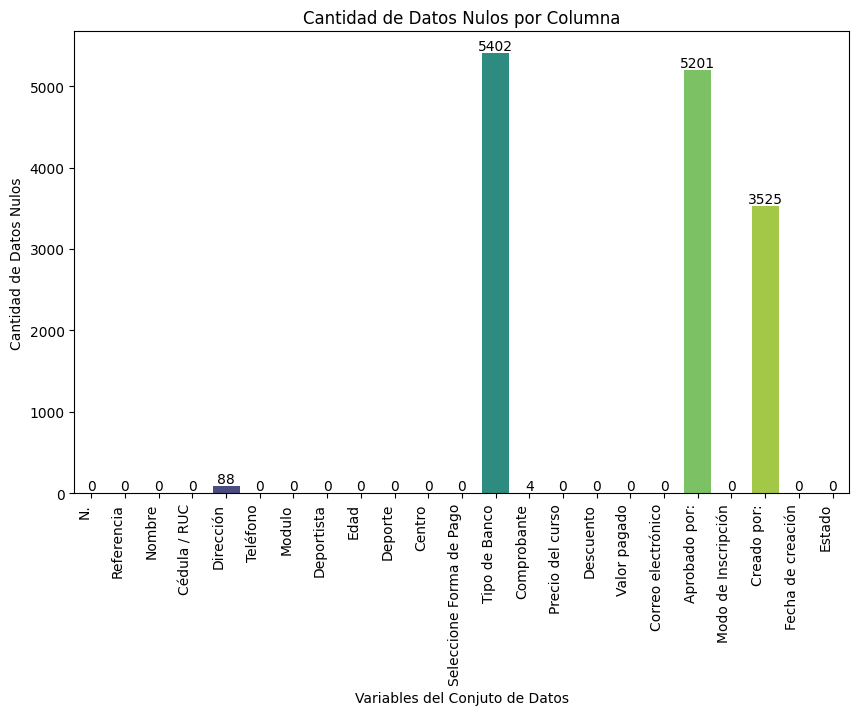

In [25]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
ax = sns.barplot(x=df.columns, y=df.isnull().sum(), hue=df.columns, palette='viridis', legend=False)
plt.xticks(rotation=90, ha='right')
plt.title('Cantidad de Datos Nulos por Columna')
plt.ylabel('Cantidad de Datos Nulos')
plt.xlabel('Variables del Conjuto de Datos')

# Añadir la cantidad de datos nulos en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

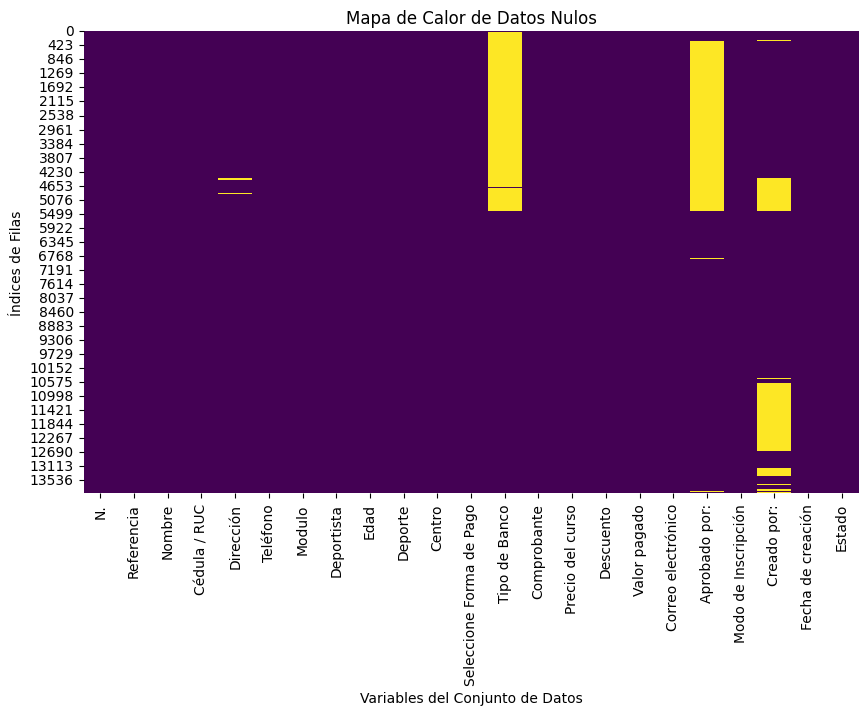

In [26]:
plt.figure(figsize=(10, 6))

# Crear el mapa de calor
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

plt.title('Mapa de Calor de Datos Nulos')
plt.xlabel('Variables del Conjunto de Datos')
plt.ylabel('Índices de Filas')

plt.show()

In [27]:
df.isnull().sum()

N.                             0
Referencia                     0
Nombre                         0
Cédula / RUC                   0
Dirección                     88
Teléfono                       0
Modulo                         0
Deportista                     0
Edad                           0
Deporte                        0
Centro                         0
Seleccione Forma de Pago       0
Tipo de Banco               5402
Comprobante                    4
Precio del curso               0
Descuento                      0
Valor pagado                   0
Correo electrónico             0
Aprobado por:               5201
Modo de Inscripción            0
Creado por:                 3525
Fecha de creación              0
Estado                         0
dtype: int64

In [28]:
df.head()

N.         Referencia                        Nombre    Cédula / RUC  \
0   1  CDP-REF-2023-2024            SANTIAGO CAYANCELA      1717278384   
1   2   CDP-REF-738-2024    PAULINA ROSANA LIMA GUAMAN   1714444245001   
2   3      CDP-REF-00001                    LUIS GOVEA      0802285130   
3   4      CDP-REF-00002  Leonel Isaac Lozada Valencia      1722576921   
4   5      CDP-REF-00003                  Karina Tobar      1720097136   

                             Dirección      Teléfono    Modulo  \
0                      LA NUEVA AURORA     992596711  MODULO 2   
1                                QUITO     995739186  MODULO 1   
2                              EL INCA    0989070443  MODULO 1   
3  galo molina y maximiliano rodriguez    0985734000  MODULO 1   
4                               Centro    0998516872  MODULO 1   

                             Deportista  Edad             Deporte  ...  \
0  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION  ...   
1            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU  ...   
2       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION  ...   
3          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA  ...   
4           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO  ...   

  Comprobante Precio del curso           Descuento Valor pagado  \
0    36918365               82           Descuento         82.0   
1    98620168               30           Descuento         30.0   
2    88080556               80  No tiene descuento         80.0   
3    43769023               65  No tiene descuento         65.0   
4    91431814               65  No tiene descuento         65.0   

         Correo electrónico          Aprobado por:  Modo de Inscripción  \
0  santiago83cp@hotmail.com       Veronica Tabango   Inscripción Online   
1  paulinalimag78@gmail.com       Veronica Tabango   Inscripción Online   
2      colonjr1@hotmail.com       VERONICA TABANGO   Inscripción Online   
3      isaac20leo@gmail.com  SUPERVISOR SUPERVISOR   Inscripción Online   
4   karitobar2023@gmail.com       VERONICA TABANGO   Inscripción Online   

                      Creado por: Fecha de creación    Estado  
0                             NaN        2021-06-06  Aprobado  
1                             NaN        2021-06-10  Aprobado  
2  GLADYS PATRICIA MONTUFAR PEREZ        2021-06-10  Aprobado  
3                             Web        2021-06-11  Aprobado  
4                             Web        2021-06-11  Aprobado  

[5 rows x 23 columns]

In [29]:
colDelete = ['Referencia', 'Nombre', 'Cédula / RUC', 'Dirección', 'Teléfono', 'Modulo','Comprobante', 'Descuento', 'Correo electrónico', 'Aprobado por:', 'Creado por:', 'Estado']

In [30]:
df = df.drop(colDelete, axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   N.                        13936 non-null  int64         
 1   Deportista                13936 non-null  object        
 2   Edad                      13936 non-null  int64         
 3   Deporte                   13936 non-null  object        
 4   Centro                    13936 non-null  object        
 5   Seleccione Forma de Pago  13936 non-null  object        
 6   Tipo de Banco             8534 non-null   object        
 7   Precio del curso          13936 non-null  int64         
 8   Valor pagado              13936 non-null  float64       
 9   Modo de Inscripción       13936 non-null  object        
 10  Fecha de creación         13936 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.2+ MB


In [32]:
df.head()

N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  
0          82.0  Inscripción Online        2021-06-06  
1          30.0  Inscripción Online        2021-06-10  
2          80.0  Inscripción Online        2021-06-10  
3          65.0  Inscripción Online        2021-06-11  
4          65.0  Inscripción Online        2021-06-11

C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2525605250.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




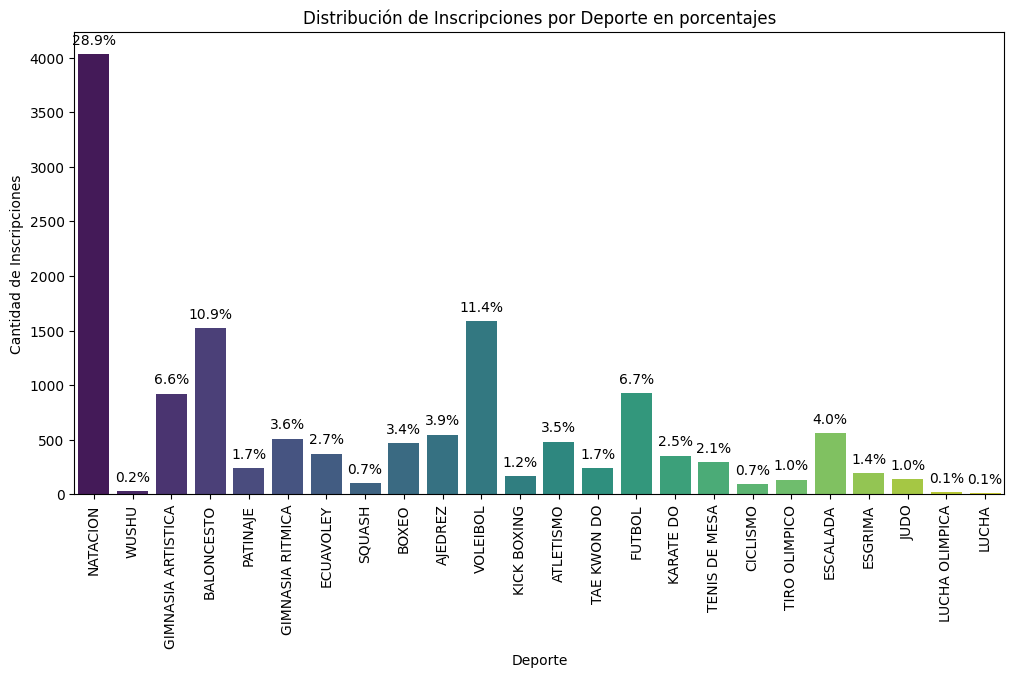

In [33]:
# Calcular el porcentaje de cada deporte
df['Porcentaje'] = df['Deporte'].value_counts(normalize=True) * 100

# Crear la gráfica
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Deporte', data=df, palette='viridis')

# Configurar título y etiquetas
plt.title('Distribución de Inscripciones por Deporte en porcentajes')
plt.xlabel('Deporte')
plt.ylabel('Cantidad de Inscripciones')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización

# Añadir los valores y porcentajes en cada barra
for p in ax.patches:
    cantidad = p.get_height()  # Altura de la barra (número de inscripciones)
    porcentaje = (cantidad / len(df)) * 100  # Porcentaje calculado
    ax.annotate(f'{porcentaje:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

In [34]:
deporte_counts = df['Deporte'].value_counts(normalize=True) * 100

# Crear la tabla con la distribución de inscripciones por deporte y su porcentaje
tabla_deportes = deporte_counts.reset_index()
tabla_deportes.columns = ['Deporte', 'Porcentaje']

# Mostrar la tabla
print(tabla_deportes)

               Deporte  Porcentaje
0             NATACION   28.910735
1             VOLEIBOL   11.373421
2           BALONCESTO   10.907003
3               FUTBOL    6.651837
4   GIMNASIA ARTISTICA    6.608783
5             ESCALADA    4.018370
6              AJEDREZ    3.932262
7     GIMNASIA RITMICA    3.645235
8            ATLETISMO    3.458668
9                BOXEO    3.372560
10           ECUAVOLEY    2.683697
11           KARATE DO    2.540184
12       TENIS DE MESA    2.131171
13         TAE KWON DO    1.729334
14            PATINAJE    1.707807
15             ESGRIMA    1.399254
16         KICK BOXING    1.176808
17                JUDO    0.983065
18       TIRO OLIMPICO    0.961538
19              SQUASH    0.724742
20            CICLISMO    0.660161
21               WUSHU    0.222445
22      LUCHA OLIMPICA    0.121986
23               LUCHA    0.078932


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2768320580.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




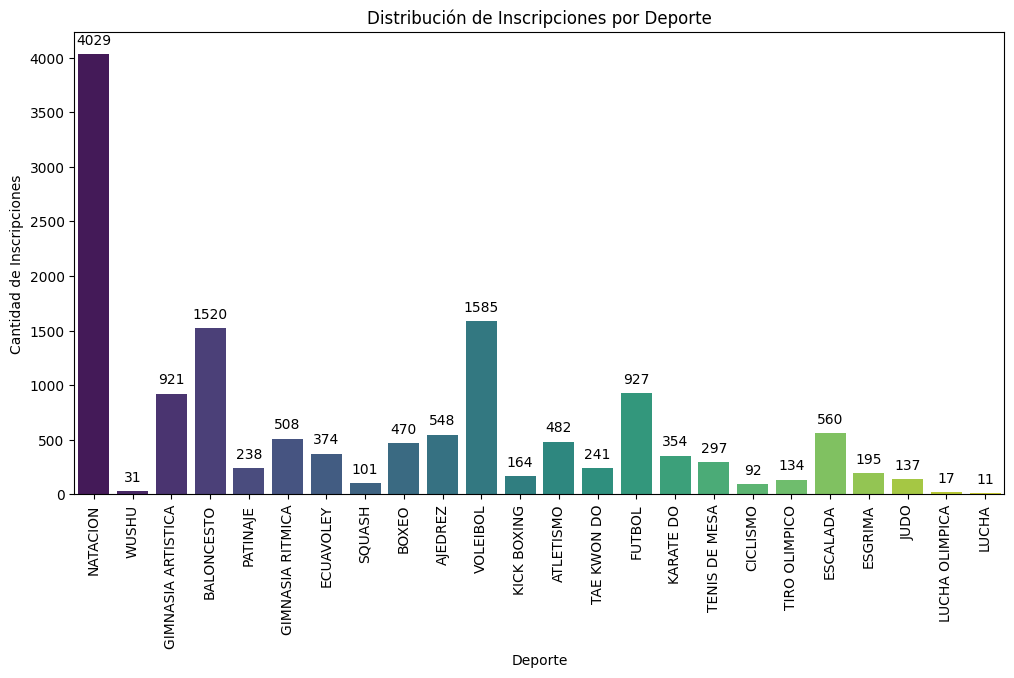

In [35]:

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Deporte', data=df, palette='viridis')
plt.title('Distribución de Inscripciones por Deporte')
plt.xlabel('Deporte')
plt.ylabel('Cantidad de Inscripciones')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización

# Añadir los valores en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\1091400264.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




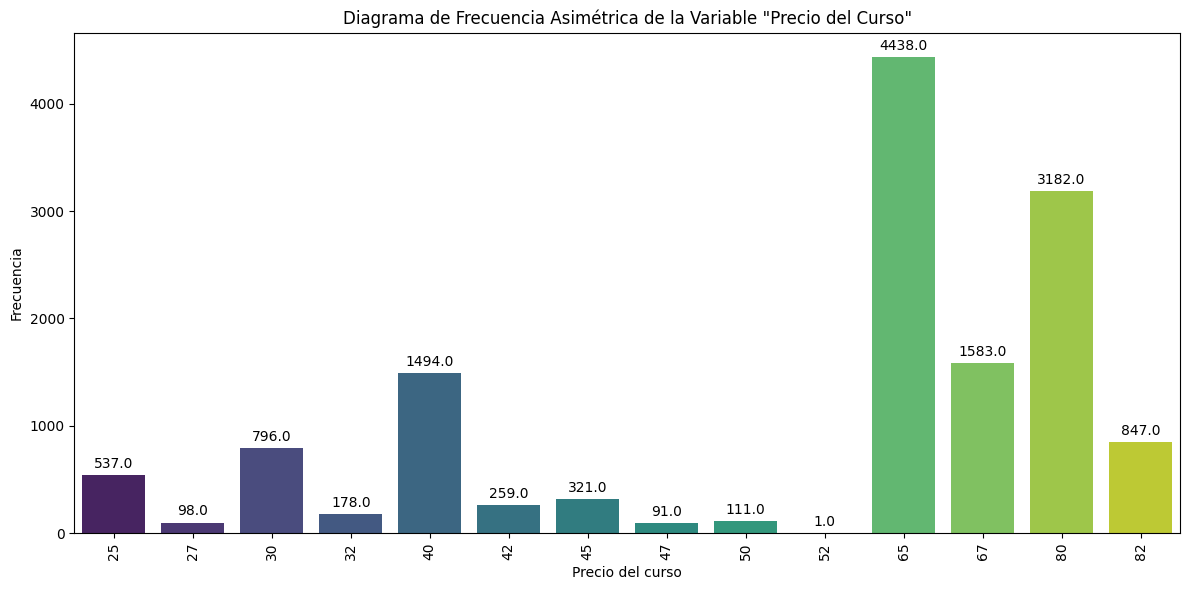

In [36]:
# Crear la figura y el histograma
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Precio del curso', data=df, palette='viridis')

# Añadir cantidades encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Texto: la altura de la barra (frecuencia)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición: centro superior de la barra
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')  # Desplazar el texto hacia arriba

# Configuración del gráfico
plt.title('Diagrama de Frecuencia Asimétrica de la Variable "Precio del Curso"')
plt.xlabel('Precio del curso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   N.                        13936 non-null  int64         
 1   Deportista                13936 non-null  object        
 2   Edad                      13936 non-null  int64         
 3   Deporte                   13936 non-null  object        
 4   Centro                    13936 non-null  object        
 5   Seleccione Forma de Pago  13936 non-null  object        
 6   Tipo de Banco             8534 non-null   object        
 7   Precio del curso          13936 non-null  int64         
 8   Valor pagado              13936 non-null  float64       
 9   Modo de Inscripción       13936 non-null  object        
 10  Fecha de creación         13936 non-null  datetime64[ns]
 11  Porcentaje                0 non-null      float64       
dtypes: datetime64[ns](

In [38]:
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'])

Deporte
NATACION              4029
VOLEIBOL              1585
BALONCESTO            1520
FUTBOL                 927
GIMNASIA ARTISTICA     921
ESCALADA               560
AJEDREZ                548
GIMNASIA RITMICA       508
ATLETISMO              482
BOXEO                  470
ECUAVOLEY              374
KARATE DO              354
TENIS DE MESA          297
TAE KWON DO            241
PATINAJE               238
ESGRIMA                195
KICK BOXING            164
JUDO                   137
TIRO OLIMPICO          134
SQUASH                 101
CICLISMO                92
WUSHU                   31
LUCHA OLIMPICA          17
LUCHA                   11
Name: count, dtype: int64


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\3956258264.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




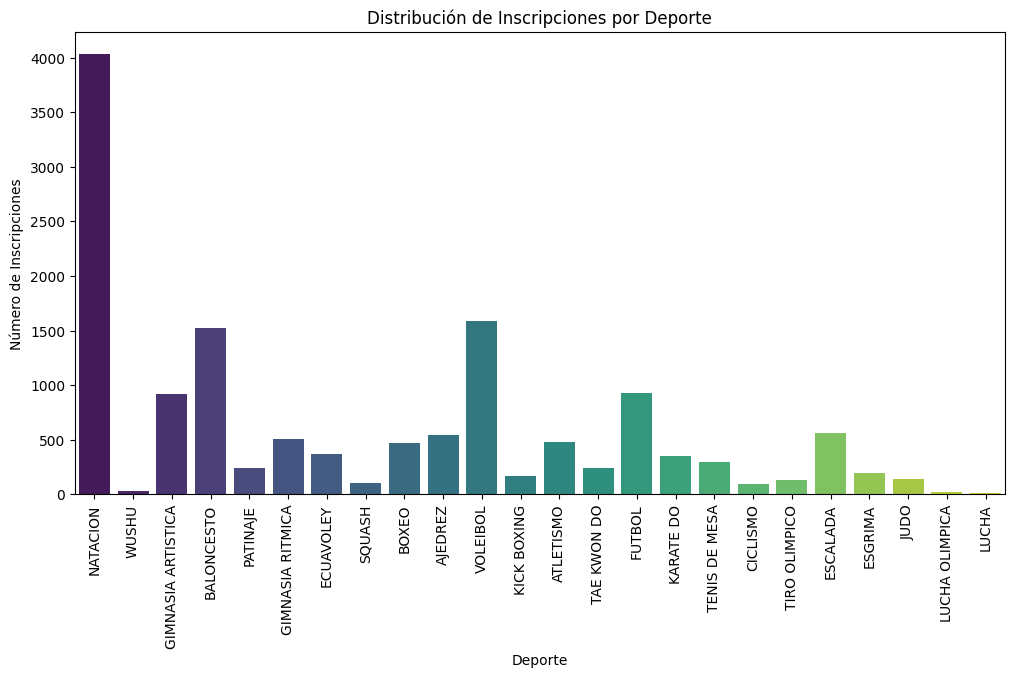

In [39]:
# Calcular la cantidad de inscripciones por deporte
inscripciones_por_deporte = df['Deporte'].value_counts()

# Mostrar el resultado
print(inscripciones_por_deporte)

# Visualización de las inscripciones por deporte
plt.figure(figsize=(12, 6))
sns.countplot(x='Deporte', data=df, palette='viridis')
plt.title('Distribución de Inscripciones por Deporte')
plt.xlabel('Deporte')
plt.ylabel('Número de Inscripciones')
plt.xticks(rotation=90)  # Rotar las etiquetas para mejor visualización
plt.show()


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   N.                        13936 non-null  int64         
 1   Deportista                13936 non-null  object        
 2   Edad                      13936 non-null  int64         
 3   Deporte                   13936 non-null  object        
 4   Centro                    13936 non-null  object        
 5   Seleccione Forma de Pago  13936 non-null  object        
 6   Tipo de Banco             8534 non-null   object        
 7   Precio del curso          13936 non-null  int64         
 8   Valor pagado              13936 non-null  float64       
 9   Modo de Inscripción       13936 non-null  object        
 10  Fecha de creación         13936 non-null  datetime64[ns]
 11  Porcentaje                0 non-null      float64       
dtypes: datetime64[ns](

In [41]:
# Realizar el análisis de varianza
grupo_deporte = df.groupby('Deporte')['N.']
resultados_anova = f_oneway(*[grupo for nombre, grupo in grupo_deporte])

# Imprimir los resultados
print("Estadística F:", resultados_anova.statistic)
print("Valor p:", resultados_anova.pvalue)


# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if resultados_anova.pvalue < alpha:
    print("Hay diferencias significativas en la cantidad de inscripciones entre los diferentes deportes.")
else:
    print("No hay diferencias significativas en la cantidad de inscripciones entre los diferentes deportes.")


Estadística F: 5.0808140865652325
Valor p: 1.795906624245505e-14
Hay diferencias significativas en la cantidad de inscripciones entre los diferentes deportes.


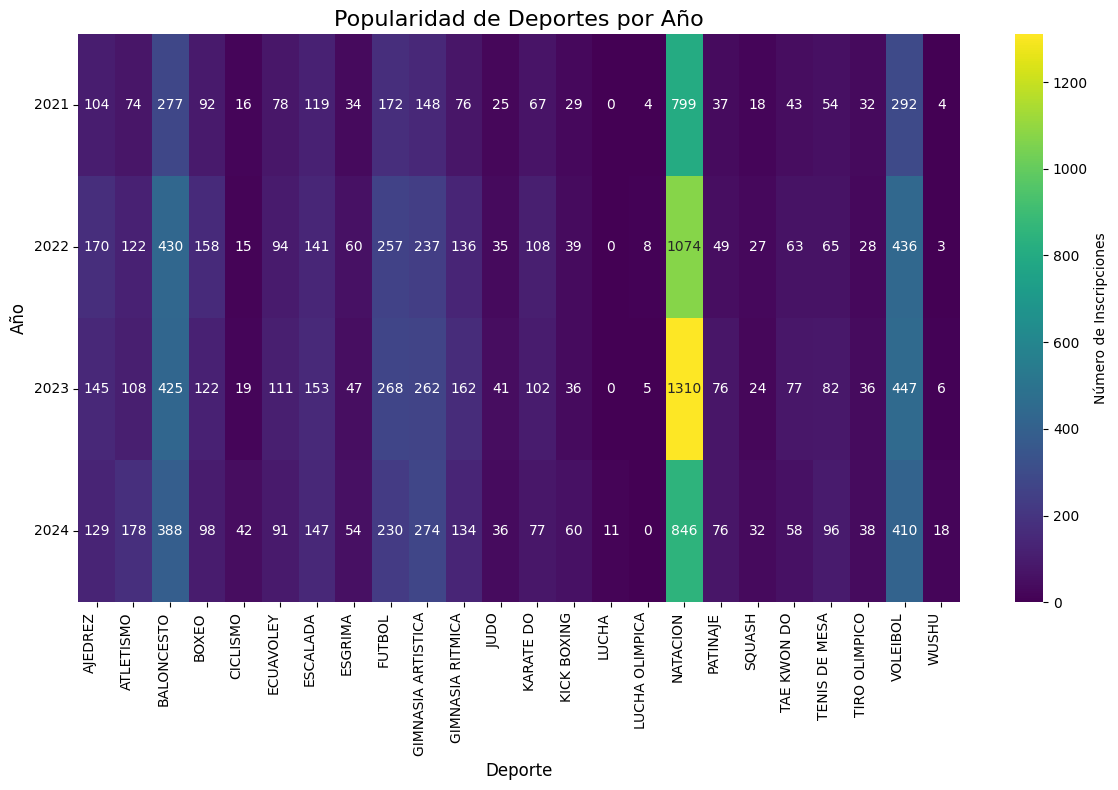

In [42]:

# 1. Convertir la columna de fecha de creación a formato de fecha
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'], errors='coerce')

# 2. Eliminar filas con fechas no válidas o deportes vacíos
df = df.dropna(subset=['Fecha de creación', 'Deporte'])

# 3. Agrupar los datos por año y deporte, y contar el número de inscripciones
inscripciones_por_ano_deporte = df.groupby([df['Fecha de creación'].dt.year, 'Deporte']).size().unstack(fill_value=0)

# 4. Crear un heatmap para visualizar la popularidad de los deportes en cada año
plt.figure(figsize=(12, 8))
sns.heatmap(inscripciones_por_ano_deporte, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Número de Inscripciones'})
plt.title('Popularidad de Deportes por Año', fontsize=16)
plt.xlabel('Deporte', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [43]:
# Convertir la columna de fecha de creación a formato de fecha
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'], errors='coerce')

# Eliminar filas con fechas no válidas o deportes vacíos
df = df.dropna(subset=['Fecha de creación', 'Deporte'])

# Crear la matriz: Agrupar por año (extraído de 'Fecha de creación') y deporte
matriz_inscripciones = df.groupby([df['Fecha de creación'].dt.year, 'Deporte']).size().unstack(fill_value=0)

# Mostrar la matriz
print(matriz_inscripciones)

Deporte            AJEDREZ  ATLETISMO  BALONCESTO  BOXEO  CICLISMO  ECUAVOLEY  \
Fecha de creación                                                               
2021                   104         74         277     92        16         78   
2022                   170        122         430    158        15         94   
2023                   145        108         425    122        19        111   
2024                   129        178         388     98        42         91   

Deporte            ESCALADA  ESGRIMA  FUTBOL  GIMNASIA ARTISTICA  ...  LUCHA  \
Fecha de creación                                                 ...          
2021                    119       34     172                 148  ...      0   
2022                    141       60     257                 237  ...      0   
2023                    153       47     268                 262  ...      0   
2024                    147       54     230                 274  ...     11   

Deporte            LUCHA OLIMPIC

In [44]:
# 1. Convertir la columna de fecha de creación a formato de fecha
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'], errors='coerce')

# 2. Eliminar filas con fechas no válidas o deportes vacíos
df = df.dropna(subset=['Fecha de creación', 'Deporte'])

# 3. Agrupar los datos por año y deporte, y contar el número de inscripciones
inscripciones_por_ano_deporte = df.groupby([df['Fecha de creación'].dt.year, 'Deporte']).size().unstack(fill_value=0)

# 4. Exportar la matriz a un archivo Excel
archivo_excel = 'inscripciones_por_ano_deporte.xlsx'
inscripciones_por_ano_deporte.to_excel(archivo_excel)

print(f"Matriz exportada exitosamente a '{archivo_excel}'")

Matriz exportada exitosamente a 'inscripciones_por_ano_deporte.xlsx'


In [45]:

# Convertir la columna de fecha a tipo datetime si no está en ese formato
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'])

# Crear una tabla pivote que muestre el número de inscripciones para cada deporte en cada año
tabla_pivote = pd.pivot_table(df, index=df['Fecha de creación'].dt.year, columns='Deporte', aggfunc='size', fill_value=0)

# Mostrar la tabla
print(tabla_pivote)
tabla_pivote = tabla_pivote.rename_axis('AÑO')

# Aplicar estilos a la tabla
tabla_estilizada = tabla_pivote.style.background_gradient(cmap='viridis')

# Mostrar la tabla estilizada
tabla_estilizada


Deporte            AJEDREZ  ATLETISMO  BALONCESTO  BOXEO  CICLISMO  ECUAVOLEY  \
Fecha de creación                                                               
2021                   104         74         277     92        16         78   
2022                   170        122         430    158        15         94   
2023                   145        108         425    122        19        111   
2024                   129        178         388     98        42         91   

Deporte            ESCALADA  ESGRIMA  FUTBOL  GIMNASIA ARTISTICA  ...  LUCHA  \
Fecha de creación                                                 ...          
2021                    119       34     172                 148  ...      0   
2022                    141       60     257                 237  ...      0   
2023                    153       47     268                 262  ...      0   
2024                    147       54     230                 274  ...     11   

Deporte            LUCHA OLIMPIC

In [46]:
# Encontrar el valor mínimo y máximo de los precios de los cursos deportivos
precio_minimo = df['Precio del curso'].min()
precio_maximo = df['Precio del curso'].max()

# Imprimir el rango de precios
print("Rango de Precios de los Cursos Deportivos Ofrecidos:")
print(f"Mínimo: {precio_minimo}")
print(f"Máximo: {precio_maximo}")


Rango de Precios de los Cursos Deportivos Ofrecidos:
Mínimo: 25
Máximo: 82


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\4282407349.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




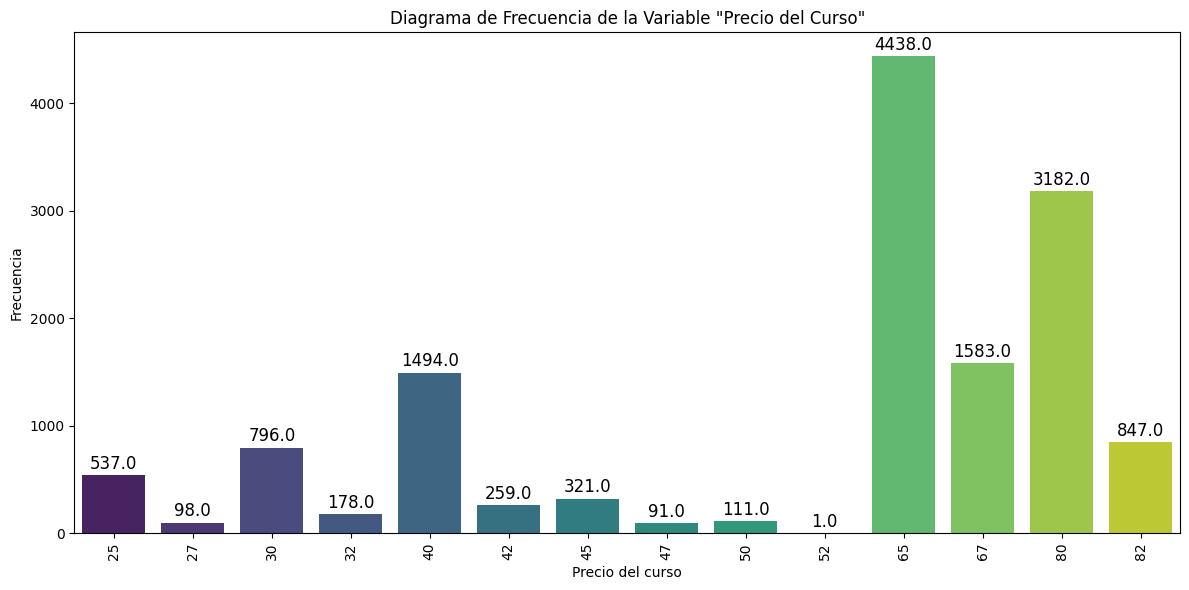

In [47]:
# Crear el histograma de los precios de los cursos deportivos
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Precio del curso', data=df, palette='viridis')

# Añadir la cantidad encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8),  # Desplazar hacia arriba
                textcoords='offset points')

plt.title('Diagrama de Frecuencia de la Variable "Precio del Curso"')
plt.xlabel('Precio del curso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()


In [48]:

# Crear la tabla pivote mostrando el precio promedio de los cursos por deporte y por año
tabla_pivote_precio = pd.pivot_table(df, 
                                    index=df['Fecha de creación'].dt.year,   # Año
                                    columns='Deporte',                        # Deporte
                                    values='Precio del curso',               # Precio del curso
                                    aggfunc='mean',                           # Función de agregación (promedio)
                                    fill_value=0)                             # Rellenar con 0 si no hay datos

# Redondear los valores de la tabla para quitar los decimales
tabla_pivote_precio = tabla_pivote_precio.applymap(lambda x: f'{x:.2f}' if x != 0 else '0.00')

# Renombrar el índice a 'AÑO'
tabla_pivote_precio = tabla_pivote_precio.rename_axis('AÑO')

# Estilizar la tabla para mejorar la visualización
tabla_estilizada_precio = tabla_pivote_precio.style.background_gradient(cmap='viridis')

# Mostrar la tabla estilizada con los valores redondeados a 2 decimales
tabla_estilizada_precio

C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\1379784179.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [49]:
inscripciones_por_deporte = df['Precio del curso'].value_counts()

# Calcular el porcentaje de inscripciones por deporte
porcentaje_inscripciones = (inscripciones_por_deporte / len(df)) * 100

# Crear un nuevo DataFrame con la cantidad de inscripciones y el porcentaje correspondiente
tabla_inscripciones = pd.DataFrame({
    'Deporte': inscripciones_por_deporte.index,
    'Precio del curso': inscripciones_por_deporte.values,
})

# Ordenar la tabla por cantidad de inscripciones en orden descendente
tabla_inscripciones = tabla_inscripciones.sort_values(by='Precio del curso', ascending=False)

# Mostrar la tabla
print(tabla_inscripciones)

    Deporte  Precio del curso
0        65              4438
1        80              3182
2        67              1583
3        40              1494
4        82               847
5        30               796
6        25               537
7        45               321
8        42               259
9        32               178
10       50               111
11       27                98
12       47                91
13       52                 1


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\1025832530.py:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



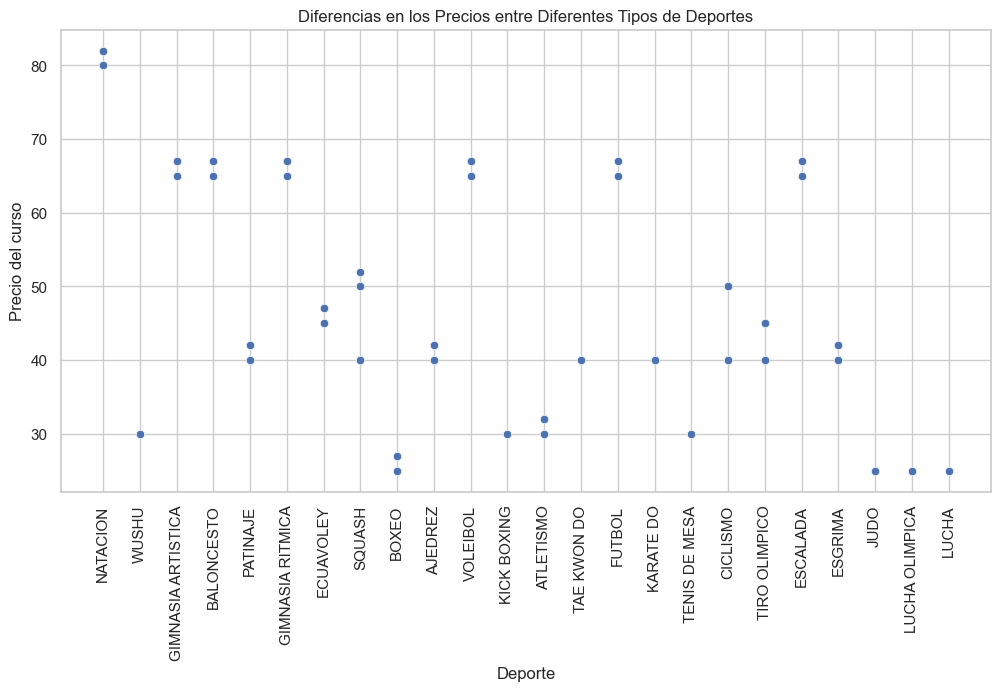

In [50]:

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el diagrama de dispersión
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Deporte', y='Precio del curso', palette='viridis')
plt.title('Diferencias en los Precios entre Diferentes Tipos de Deportes')
plt.xlabel('Deporte')
plt.ylabel('Precio del curso')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mejorar la legibilidad
plt.show()

In [51]:
# Calcular estadísticas resumidas para cada deporte
stats_por_deporte = df.groupby('Deporte')['Precio del curso'].agg(['mean']).reset_index()

# Renombrar las columnas para mayor claridad
stats_por_deporte.columns = ['Deporte', 'Precio del curso']

# Ordenar la tabla por precio medio en orden descendente
stats_por_deporte = stats_por_deporte.sort_values(by='Precio del curso', ascending=False)

# Mostrar la tabla
print(stats_por_deporte)


               Deporte  Precio del curso
16            NATACION         80.420452
9   GIMNASIA ARTISTICA         65.595005
10    GIMNASIA RITMICA         65.527559
6             ESCALADA         65.525000
22            VOLEIBOL         65.517350
2           BALONCESTO         65.510526
8               FUTBOL         65.496224
18              SQUASH         46.950495
5            ECUAVOLEY         45.486631
4             CICLISMO         44.565217
21       TIRO OLIMPICO         41.417910
17            PATINAJE         40.638655
7              ESGRIMA         40.553846
0              AJEDREZ         40.470803
12           KARATE DO         40.000000
19         TAE KWON DO         40.000000
1            ATLETISMO         30.738589
23               WUSHU         30.000000
20       TENIS DE MESA         30.000000
13         KICK BOXING         30.000000
3                BOXEO         25.417021
15      LUCHA OLIMPICA         25.000000
11                JUDO         25.000000
14              

In [52]:
# Calcular el monto promedio pagado por los deportistas en los cursos deportivos
monto_promedio_pagado = df['Valor pagado'].mean()

# Imprimir el monto promedio pagado
print("Monto promedio pagado por los deportistas en los cursos deportivos:", monto_promedio_pagado)


Monto promedio pagado por los deportistas en los cursos deportivos: 59.1797144087256


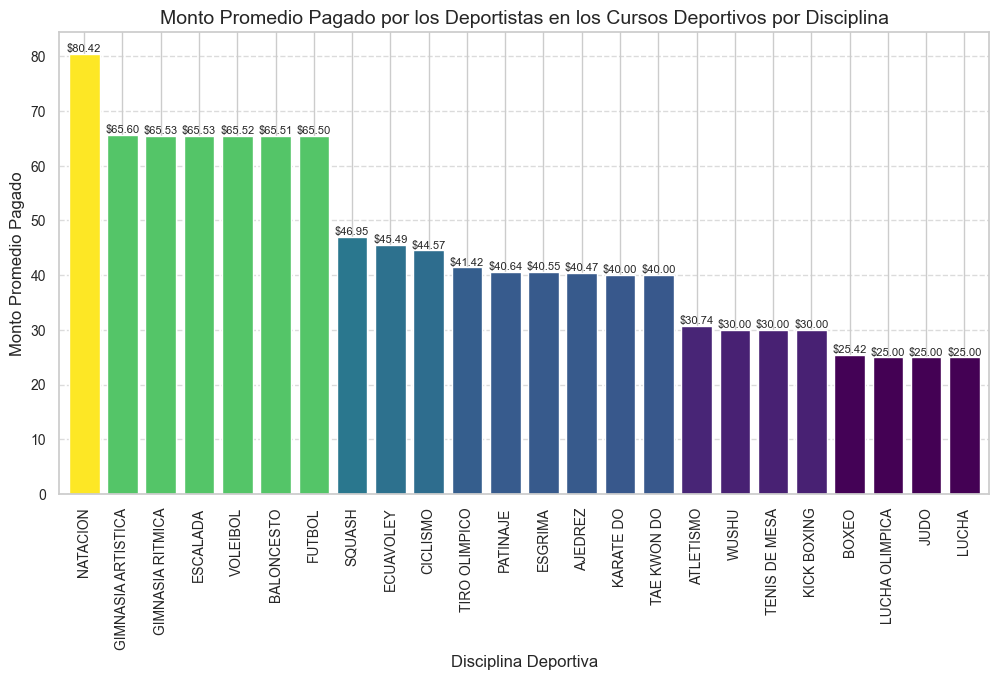

In [53]:
import matplotlib.cm as cm
# Calcular estadísticas resumidas para cada deporte
stats_por_deporte = df.groupby('Deporte')['Precio del curso'].agg(['mean']).reset_index()

# Renombrar las columnas para mayor claridad
stats_por_deporte.columns = ['Deporte', 'Precio del curso']

# Ordenar la tabla por precio medio en orden descendente
stats_por_deporte = stats_por_deporte.sort_values(by='Precio del curso', ascending=False)

# Crear un rango de colores del mapa de colores de matplotlib
norm = plt.Normalize(stats_por_deporte['Precio del curso'].min(), stats_por_deporte['Precio del curso'].max())
colormap = cm.ScalarMappable(norm=norm, cmap='viridis')  # Cambia 'viridis' por cualquier otro colormap

# Crear la lista de colores basados en los valores
colores = [colormap.to_rgba(valor) for valor in stats_por_deporte['Precio del curso']]

# Convertir a Serie para graficar
monto_promedio_por_deporte = stats_por_deporte.set_index('Deporte')['Precio del curso']

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
grafico = monto_promedio_por_deporte.plot(kind='bar', color=colores, width=0.8)

# Añadir etiquetas de precio encima de cada barra
for i, valor in enumerate(monto_promedio_por_deporte):
    plt.text(i, valor, f'${valor:.2f}', ha='center', va='bottom', fontsize=8)

# Título y etiquetas de los ejes
plt.title('Monto Promedio Pagado por los Deportistas en los Cursos Deportivos por Disciplina', fontsize=14)
plt.xlabel('Disciplina Deportiva', fontsize=12)
plt.ylabel('Monto Promedio Pagado', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Mostrar el gráfico
plt.show()

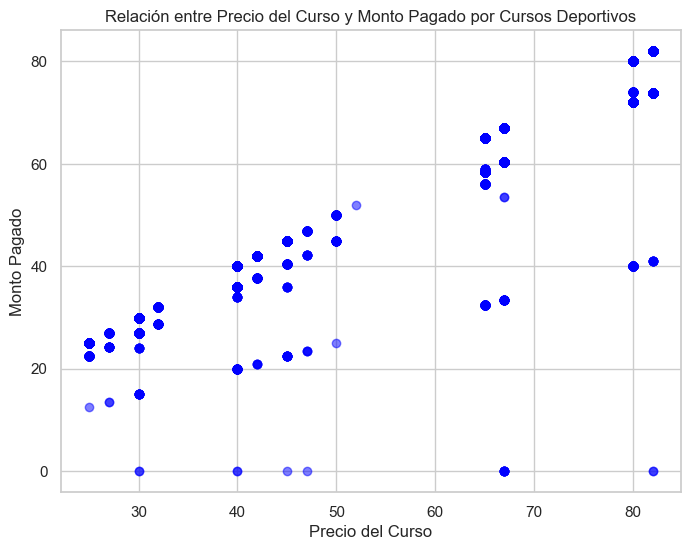

In [54]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['Precio del curso'], df['Valor pagado'], color='blue', alpha=0.5)

# Título y etiquetas de los ejes
plt.title('Relación entre Precio del Curso y Monto Pagado por Cursos Deportivos')
plt.xlabel('Precio del Curso')
plt.ylabel('Monto Pagado')

# Mostrar el gráfico
plt.grid(True)
plt.show()


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2482406428.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2482406428.py:6: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.

C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2482406428.py:19: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



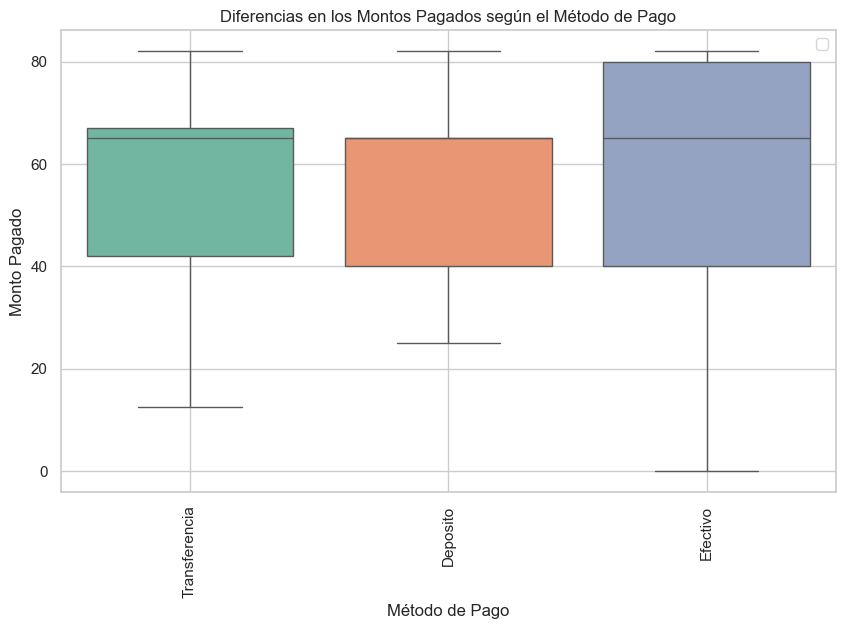

In [55]:

# Definir una paleta de colores personalizada
colores = sns.color_palette("Set2")

# Crear el gráfico de cajas con colores sólidos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seleccione Forma de Pago', y='Valor pagado', data=df, palette=colores)

# Añadir título y etiquetas
plt.title('Diferencias en los Montos Pagados según el Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Monto Pagado')


# Añadir una leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Método de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotar las etiquetas de la leyenda
for text in plt.legend().get_texts():
    text.set_rotation(90)

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.grid(True)
plt.show()

In [59]:
# Calcular estadísticas resumidas para cada método de pago
resumen_por_pago = df.groupby('Seleccione Forma de Pago')['Valor pagado'].describe()

# Imprimir la tabla
print(resumen_por_pago)


                           count       mean        std   min   25%   50%  \
Seleccione Forma de Pago                                                   
Deposito                   282.0  54.524113  17.451058  25.0  40.0  65.0   
Efectivo                  5136.0  59.890226  19.049160   0.0  40.0  65.0   
Transferencia             8518.0  58.905436  16.683391  12.5  42.0  65.0   

                           75%   max  
Seleccione Forma de Pago              
Deposito                  65.0  82.0  
Efectivo                  80.0  82.0  
Transferencia             67.0  82.0  


In [60]:
# Contar el número de inscripciones por modo de inscripción
inscripciones_por_modo = df['Modo de Inscripción'].value_counts()

# Crear un DataFrame con los datos
tabla_inscripciones = pd.DataFrame({'Modo de Inscripción': inscripciones_por_modo.index,
                                    'Cantidad de Inscripciones': inscripciones_por_modo.values})

# Mostrar la tabla
print(tabla_inscripciones)


      Modo de Inscripción  Cantidad de Inscripciones
0  Inscripción Presencial                       8806
1      Inscripción Online                       5130


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\1538858787.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




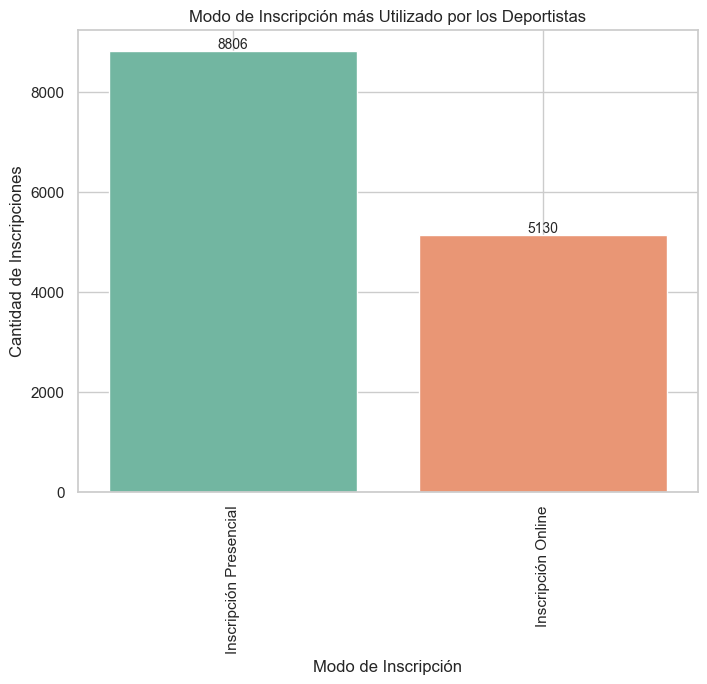

In [61]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=inscripciones_por_modo.index, y=inscripciones_por_modo.values, palette='Set2')

# Añadir etiquetas con la cantidad de inscripciones
for index, value in enumerate(inscripciones_por_modo.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Añadir título y etiquetas
plt.title('Modo de Inscripción más Utilizado por los Deportistas')
plt.xlabel('Modo de Inscripción')
plt.ylabel('Cantidad de Inscripciones')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.grid(True)
plt.show()


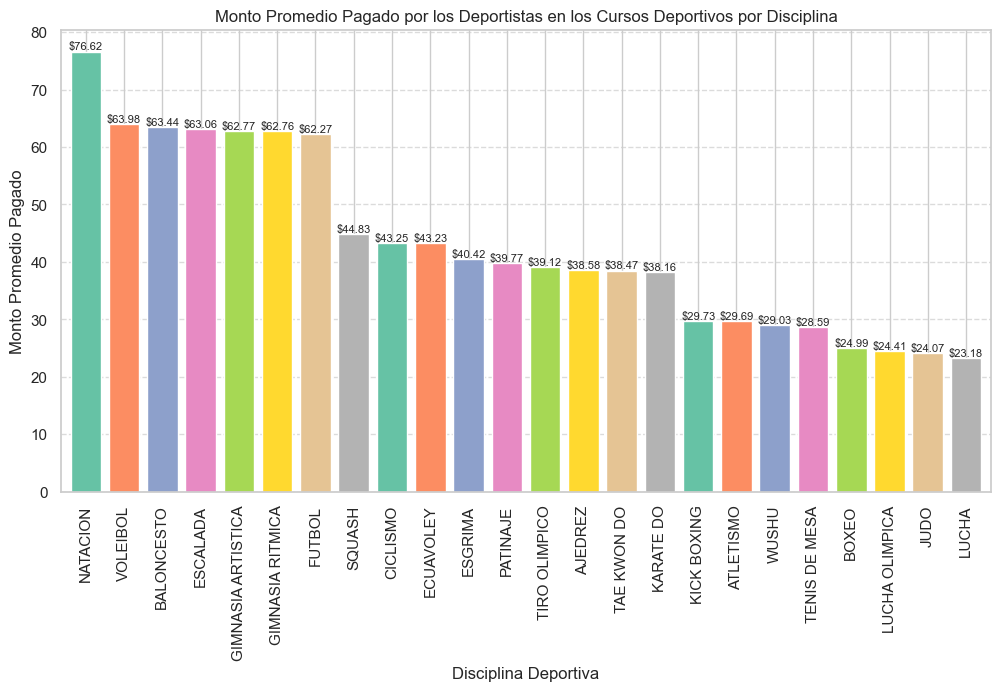

In [62]:

# Supongamos que tienes un DataFrame llamado df que contiene los datos de los cursos deportivos, incluyendo el monto pagado y el deporte
# Calcular el monto promedio pagado por los deportistas en los cursos deportivos para cada disciplina deportiva
monto_promedio_por_deporte = df.groupby('Deporte')['Valor pagado'].mean()

# Ordenar los datos por monto promedio pagado
monto_promedio_por_deporte = monto_promedio_por_deporte.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
grafico = monto_promedio_por_deporte.plot(kind='bar', color=colores, width=0.8)

# Añadir etiquetas de precio encima de cada barra
for i, valor in enumerate(monto_promedio_por_deporte):
    plt.text(i, valor, f'${valor:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Monto Promedio Pagado por los Deportistas en los Cursos Deportivos por Disciplina')  # Añadir título al gráfico
plt.xlabel('Disciplina Deportiva')  # Etiqueta del eje x
plt.ylabel('Monto Promedio Pagado')  # Etiqueta del eje y
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de la cuadrícula en el eje y con un estilo punteado
plt.show()  # Mostrar el gráfico

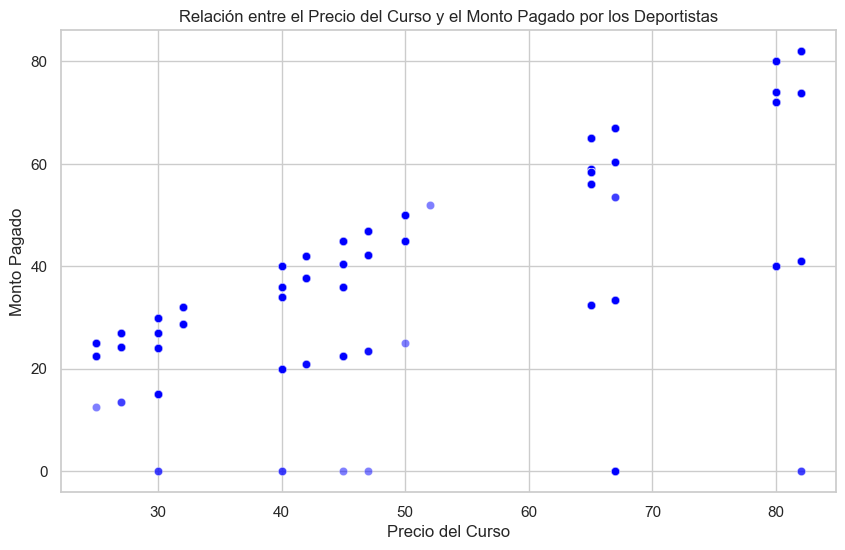

In [63]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.scatterplot(x='Precio del curso', y='Valor pagado', data=df, color='blue', alpha=0.5)  # Crear el gráfico de dispersión con color azul y transparencia
plt.title('Relación entre el Precio del Curso y el Monto Pagado por los Deportistas')  # Añadir título al gráfico
plt.xlabel('Precio del Curso')  # Etiqueta del eje x
plt.ylabel('Monto Pagado')  # Etiqueta del eje y
plt.grid(True)  # Mostrar cuadrícula en el gráfico
plt.show()  # Mostrar el gráfico

C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2179507087.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2179507087.py:6: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



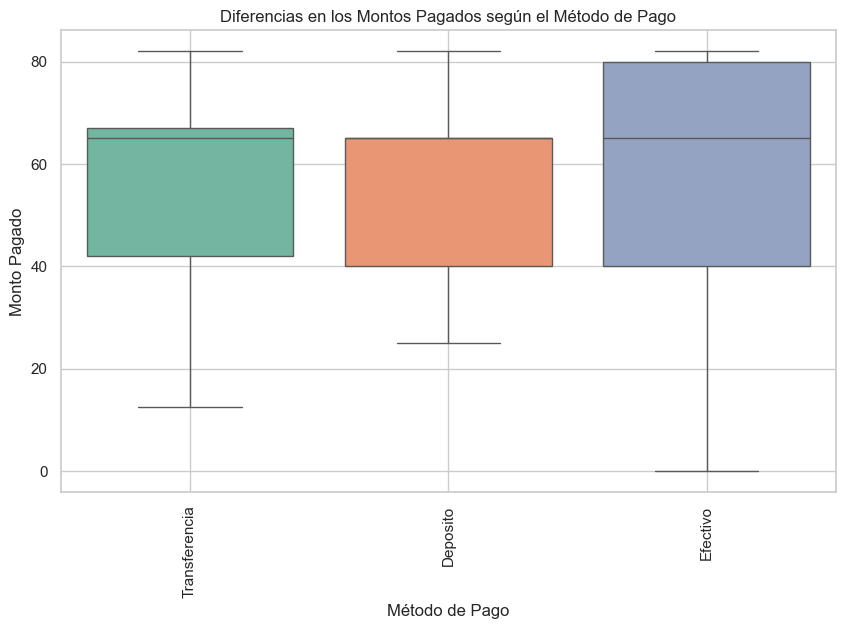

In [64]:

# Definir una paleta de colores personalizada
colores = sns.color_palette("Set2")

# Crear el gráfico de cajas con colores sólidos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seleccione Forma de Pago', y='Valor pagado', data=df, palette=colores)

# Añadir título y etiquetas
plt.title('Diferencias en los Montos Pagados según el Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Monto Pagado')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.grid(True)
plt.show()

In [65]:
df.head()

N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  
0          82.0  Inscripción Online        2021-06-06         NaN  
1          30.0  Inscripción Online        2021-06-10         NaN  
2          80.0  Inscripción Online        2021-06-10         NaN  
3          65.0  Inscripción Online        2021-06-11         NaN  
4          65.0  Inscripción Online        2021-06-11         NaN

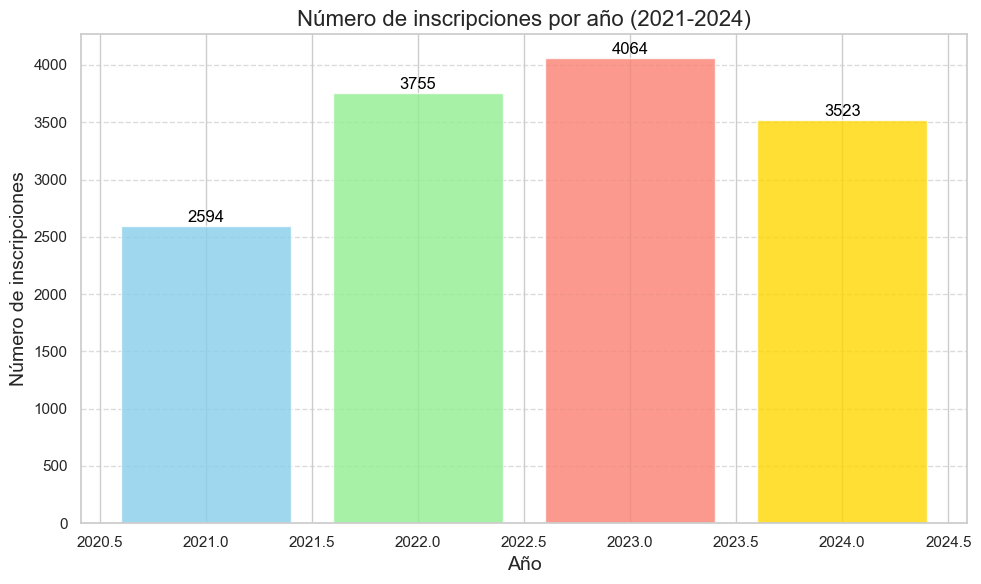

In [68]:
# Extraer el año de cada fecha de creación
df['Año'] = df['Fecha de creación'].dt.year

# Agrupar las inscripciones por año
inscripciones_por_año = df.groupby('Año').size()

# Definir los colores para cada año
colores = ['skyblue', 'lightgreen', 'salmon', 'gold']  # Colores diferentes por año

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Crear las barras con colores asignados a cada año y agregar los números encima
for i, (año, count) in enumerate(inscripciones_por_año.items()):
    plt.bar(año, count, color=colores[i], alpha=0.8)
    # Añadir el número encima de cada barra
    plt.text(año, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black')

# Añadir título y etiquetas de los ejes
plt.title('Número de inscripciones por año (2021-2024)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de inscripciones', fontsize=14)

# Mostrar cuadrícula en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [69]:
import calendar


C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2770403122.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



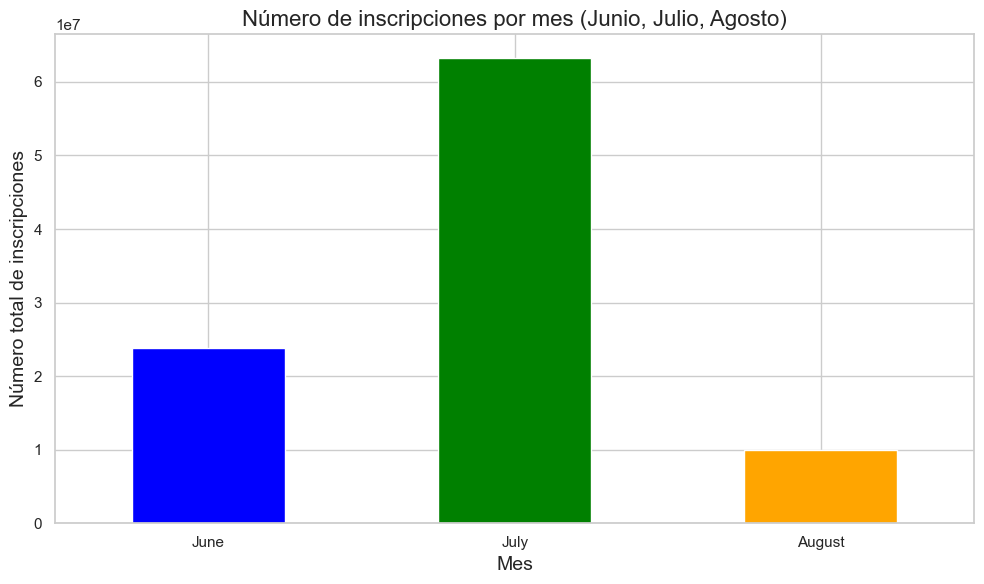

In [70]:
# Extraer el mes y el año de la fecha de creación
df['Mes'] = df['Fecha de creación'].dt.month
df['Año'] = df['Fecha de creación'].dt.year

# Filtrar solo los meses de junio (6), julio (7) y agosto (8)
meses_filtrados = [6, 7, 8]
df_filtrado = df[df['Mes'].isin(meses_filtrados)]

# Cambiar los números de mes por sus nombres en español
df_filtrado['Mes'] = df_filtrado['Mes'].apply(lambda x: calendar.month_name[x])

# Agrupar por mes y contar el número total de inscripciones
inscripciones_por_mes = df_filtrado.groupby('Mes')['N.'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
inscripciones_por_mes = inscripciones_por_mes[["June", "July", "August"]]
inscripciones_por_mes.plot(kind='bar', color=['blue', 'green', 'orange'])

# Añadir título y etiquetas de los ejes
plt.title('Número de inscripciones por mes (Junio, Julio, Agosto)', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número total de inscripciones', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2073210565.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



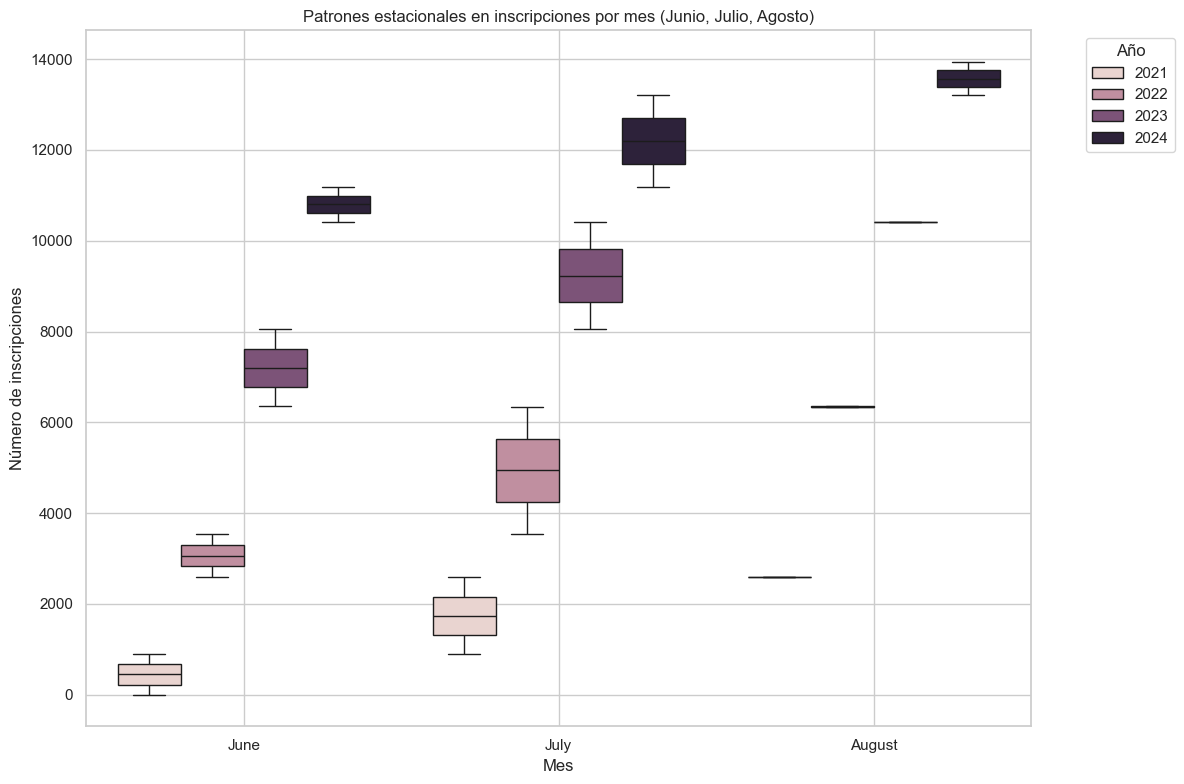

In [72]:
# Extraer el mes y el año de cada fecha de creación
df['Mes'] = df['Fecha de creación'].dt.month
df['Año'] = df['Fecha de creación'].dt.year

# Filtrar solo los meses de junio, julio y agosto
meses_filtrados = [6, 7, 8]
df_filtrado = df[df['Mes'].isin(meses_filtrados)]

# Cambiar el nombre del mes a español
df_filtrado['Mes'] = df_filtrado['Mes'].apply(lambda x: calendar.month_name[x])

# Crear el boxplot desglosado por años
plt.figure(figsize=(12, 8))
sns.boxplot(x='Mes', y='N.', hue='Año', data=df_filtrado)

# Añadir título y etiquetas
plt.title('Patrones estacionales en inscripciones por mes (Junio, Julio, Agosto)')
plt.xlabel('Mes')
plt.ylabel('Número de inscripciones')

# Mostrar la leyenda
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Extraer el mes y el año de cada fecha de creación
df['Mes'] = df['Fecha de creación'].dt.month
df['Año'] = df['Fecha de creación'].dt.year

# Filtrar solo los meses de junio, julio y agosto
meses_filtrados = [6, 7, 8]
df_filtrado = df[df['Mes'].isin(meses_filtrados)]

# Cambiar el nombre del mes a español
df_filtrado['Mes'] = df_filtrado['Mes'].apply(lambda x: calendar.month_name[x])

# Crear el boxplot desglosado por años
plt.figure(figsize=(12, 8))
sns.boxplot(x='Mes', y='N.', hue='Año', data=df_filtrado)

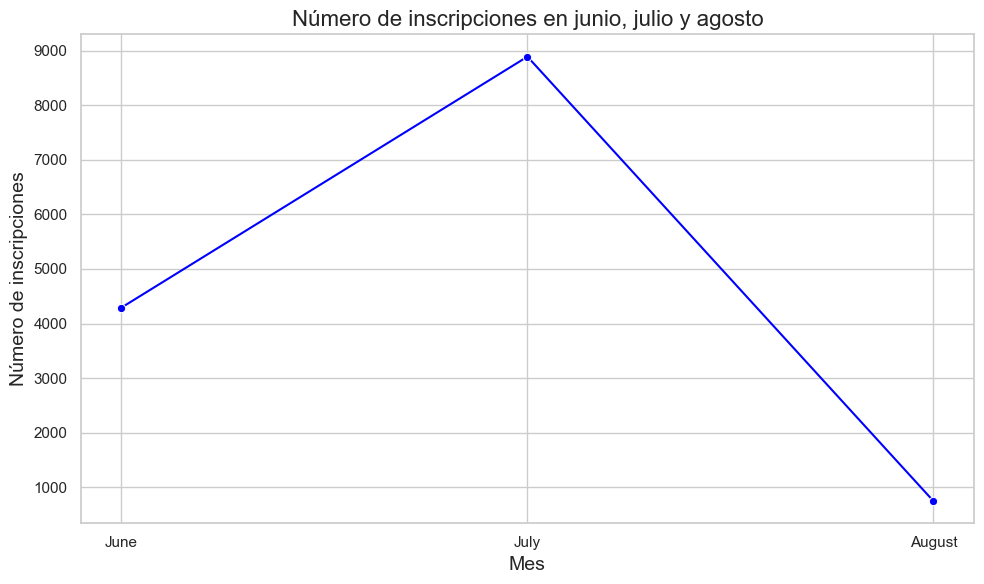

In [73]:
# Asegurarte de que la columna 'Fecha de creación' está en formato de fecha
df['Mes'] = df['Fecha de creación'].dt.month

# Filtrar solo los meses de junio (6), julio (7) y agosto (8)
meses_interes = [6, 7, 8]
inscripciones_por_mes = df[df['Mes'].isin(meses_interes)].groupby('Mes').size()

# Cambiar los números de mes por sus nombres en español
inscripciones_por_mes.index = inscripciones_por_mes.index.map(lambda x: calendar.month_name[x])

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x=inscripciones_por_mes.index, y=inscripciones_por_mes.values, marker='o', color='blue')

# Añadir título y etiquetas
plt.title('Número de inscripciones en junio, julio y agosto', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de inscripciones', fontsize=14)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2500901211.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chollo\AppData\Local\Temp\ipykernel_5180\2500901211.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




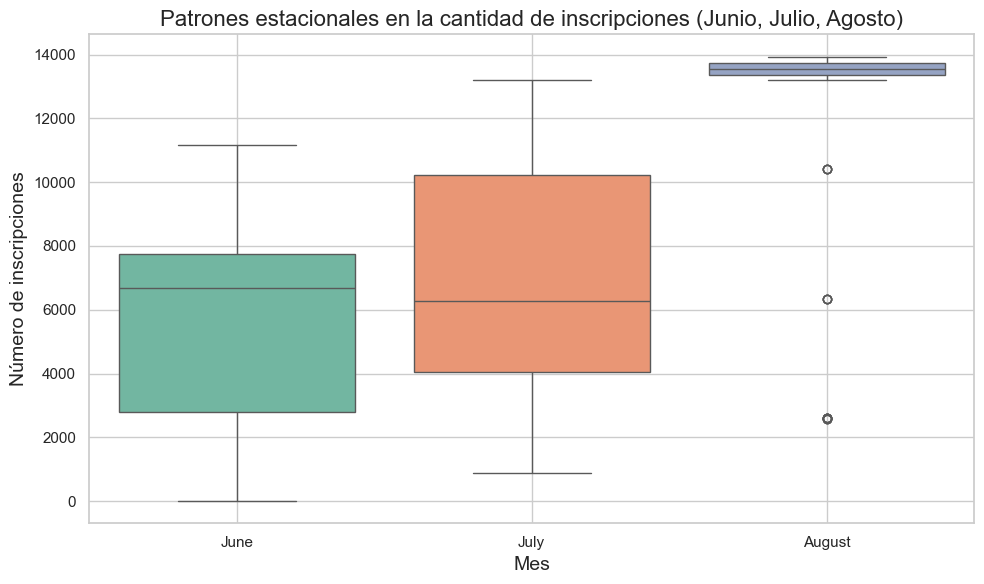

In [74]:


# Asegúrate de que la columna 'Fecha de creación' esté en formato de fecha
df['Mes'] = df['Fecha de creación'].dt.month

# Filtrar solo los meses de junio (6), julio (7) y agosto (8)
meses_interes = [6, 7, 8]
df_filtrado = df[df['Mes'].isin(meses_interes)]

# Cambiar los números de mes por nombres
df_filtrado['Mes'] = df_filtrado['Mes'].map(lambda x: calendar.month_name[x])

# Crear el boxplot para los meses seleccionados
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mes', y='N.', data=df_filtrado, palette='Set2')

# Añadir título y etiquetas de los ejes
plt.title('Patrones estacionales en la cantidad de inscripciones (Junio, Julio, Agosto)', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de inscripciones', fontsize=14)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

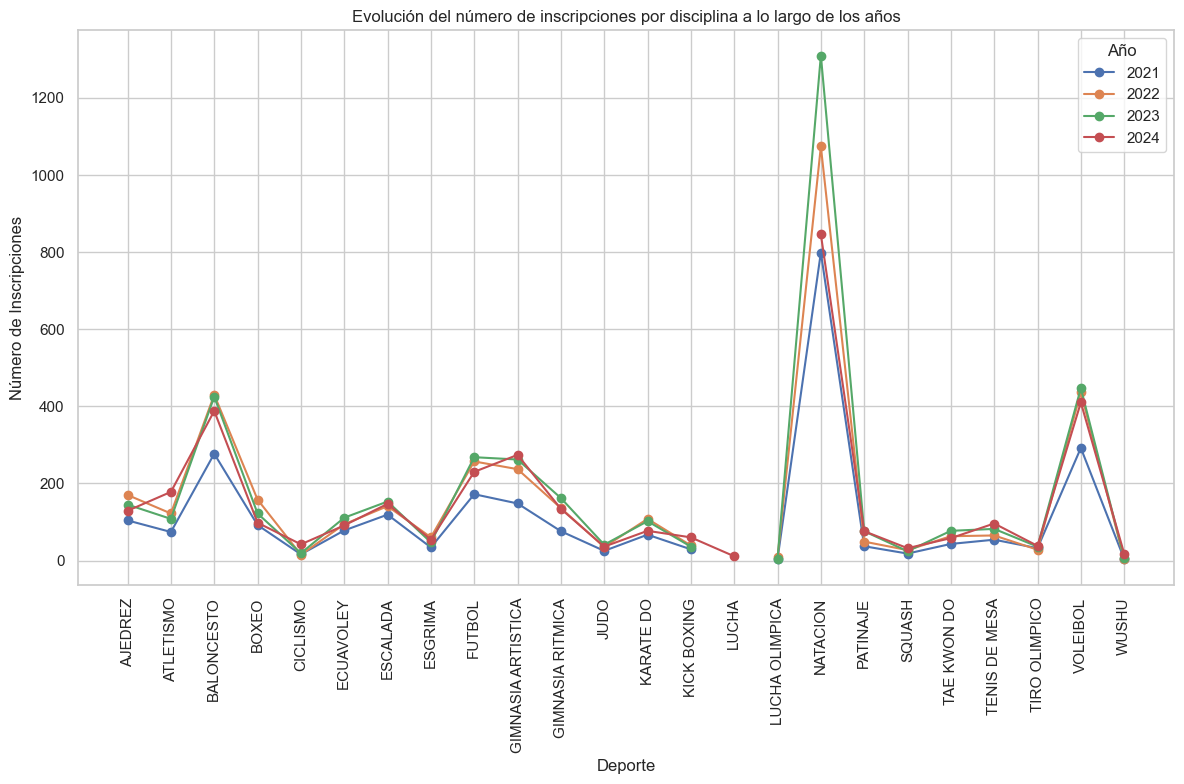

In [75]:
# Convertir la columna 'Fecha de creación' a formato de fecha
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'])

# Extraer el año de la fecha y agregarlo como una nueva columna
df['Año'] = df['Fecha de creación'].dt.year
# Agrupar los datos por disciplina y año y contar el número de inscripciones
inscripciones_por_disciplina_y_año = df.groupby(['Deporte', 'Año']).size().unstack()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
for año in inscripciones_por_disciplina_y_año.columns:
    plt.plot(inscripciones_por_disciplina_y_año.index, inscripciones_por_disciplina_y_año[año], marker='o', label=año)

# Añadir título y etiquetas
plt.title('Evolución del número de inscripciones por disciplina a lo largo de los años')
plt.xlabel('Deporte')
plt.ylabel('Número de Inscripciones')
plt.xticks(rotation=90)
plt.legend(title='Año')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

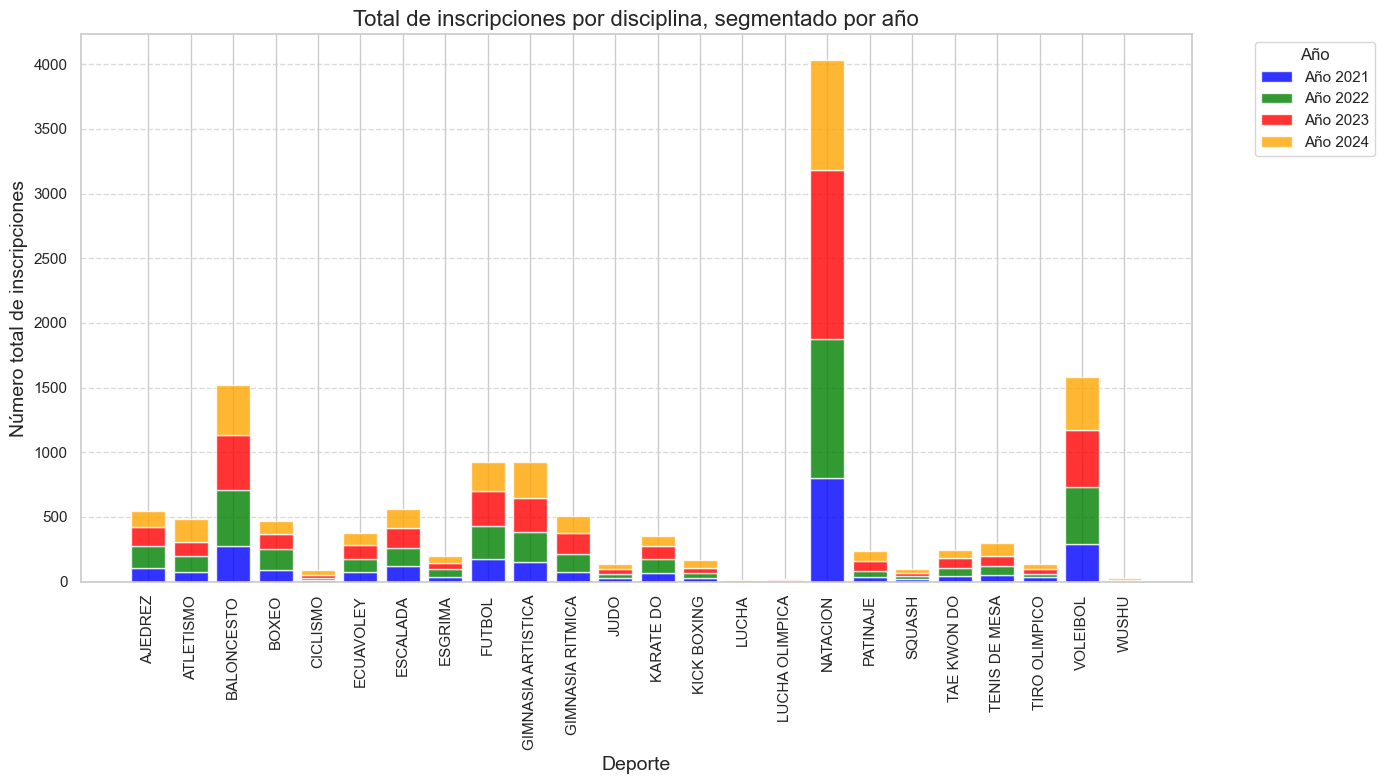

In [76]:
# Convertir la columna 'Fecha de creación' a formato de fecha
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'])

# Extraer el año de la fecha y agregarlo como una nueva columna
df['Año'] = df['Fecha de creación'].dt.year

# Agrupar los datos por disciplina y año y contar el número de inscripciones
inscripciones_por_disciplina_y_año = df.groupby(['Deporte', 'Año']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))

# Colores para los años
colores = ['blue', 'green', 'red', 'orange']

# Crear barras apiladas para cada año
bottom = np.zeros(len(inscripciones_por_disciplina_y_año))
for i, año in enumerate(inscripciones_por_disciplina_y_año.columns):
    plt.bar(
        inscripciones_por_disciplina_y_año.index,  # Eje X: Disciplinas
        inscripciones_por_disciplina_y_año[año],  # Altura de las barras
        bottom=bottom,  # Empieza donde termina la barra anterior
        label=f'Año {año}',  # Etiqueta del año
        color=colores[i % len(colores)],  # Asignar colores
        alpha=0.8  # Transparencia
    )
    bottom += inscripciones_por_disciplina_y_año[año]  # Actualizar la base para la siguiente barra

# Añadir título y etiquetas
plt.title('Total de inscripciones por disciplina, segmentado por año', fontsize=16)
plt.xlabel('Deporte', fontsize=14)
plt.ylabel('Número total de inscripciones', fontsize=14)
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X para legibilidad

# Añadir leyenda
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar cuadrícula en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [77]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'Deporte' en valores numéricos
df['centro_encoded'] = label_encoder.fit_transform(df['Centro'])
df['deporte_encoded'] = label_encoder.fit_transform(df['Deporte'])
df['pago_encoded'] = label_encoder.fit_transform(df['Seleccione Forma de Pago'])
df['inscripcion_encoded'] = label_encoder.fit_transform(df['Modo de Inscripción'])

# Mostrar el DataFrame con la columna codificada
df.head()


N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  Mes   Año  \
0          82.0  Inscripción Online        2021-06-06         NaN    6  2021   
1          30.0  Inscripción Online        2021-06-10         NaN    6  2021   
2          80.0  Inscripción Online        2021-06-10         NaN    6  2021   
3          65.0  Inscripción Online        2021-06-11         NaN    6  2021   
4          65.0  Inscripción Online        2021-06-11         NaN    6  2021   

   centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  
0              14               16             2                    0  
1              20               23             2                    0  
2              14               16             2                    0  
3              21                9             2                    0  
4               3                2             2                    0

In [78]:

# Seleccionar las columnas relevantes para el alcance deportivo por cada deporte
columnas_alcance_deportivo = ['N.', 'Valor pagado', 'Edad', 'deporte_encoded']

# Crear un nuevo DataFrame con las columnas relevantes
df_alcance_deportivo = df[columnas_alcance_deportivo]

# Calcular la matriz de correlación
matriz_correlacion = df_alcance_deportivo.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

                       N.  Valor pagado      Edad  deporte_encoded
N.               1.000000     -0.004936  0.181497         0.002517
Valor pagado    -0.004936      1.000000 -0.071339         0.342361
Edad             0.181497     -0.071339  1.000000         0.011935
deporte_encoded  0.002517      0.342361  0.011935         1.000000


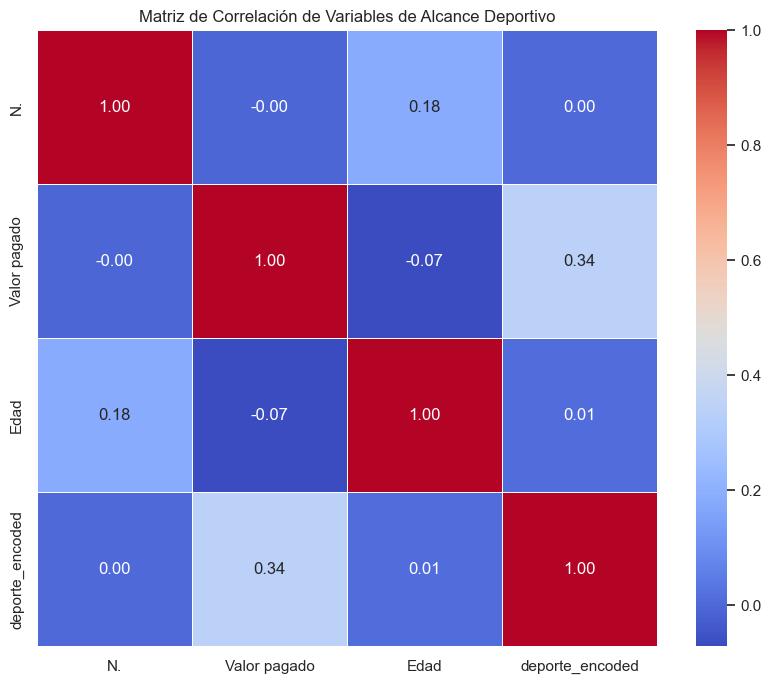

In [79]:

# Calcular la matriz de correlación
matriz_correlacion = df_alcance_deportivo.corr()

# Crear una figura y un eje para la gráfica
plt.figure(figsize=(10, 8))

# Crear la gráfica de matriz de correlación con Seaborn
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Añadir título
plt.title('Matriz de Correlación de Variables de Alcance Deportivo')

# Mostrar la gráfica
plt.show()

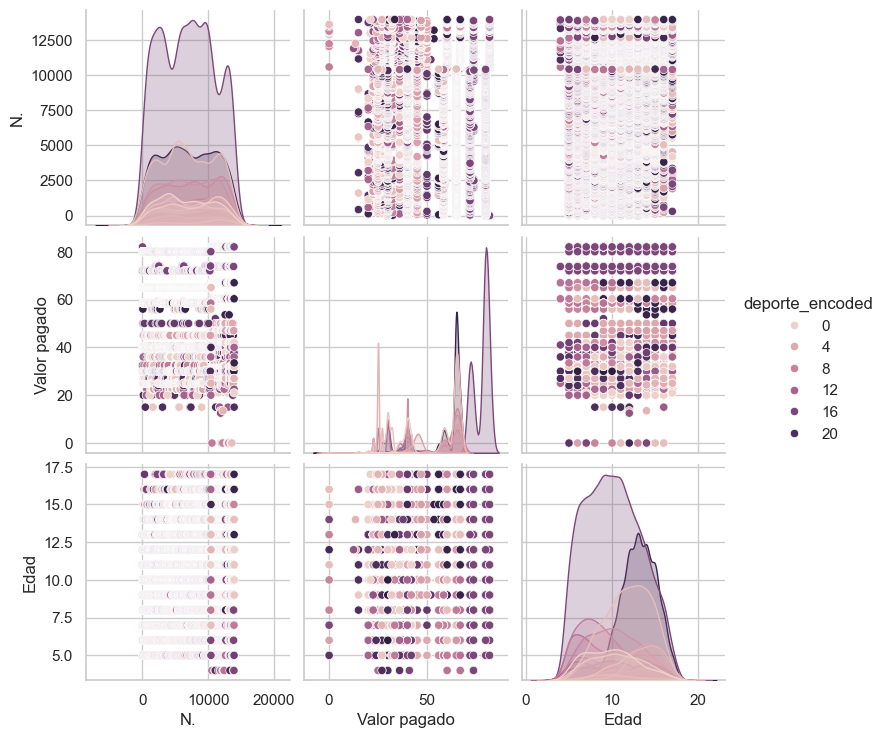

In [80]:

# Seleccionar las columnas relevantes
columnas_relacionadas = ['N.', 'Valor pagado', 'Edad', 'deporte_encoded' ]

# Crear gráficos de dispersión con la matriz conjunta
sns.pairplot(df[columnas_relacionadas], hue='deporte_encoded')

# Mostrar los gráficos
plt.show()

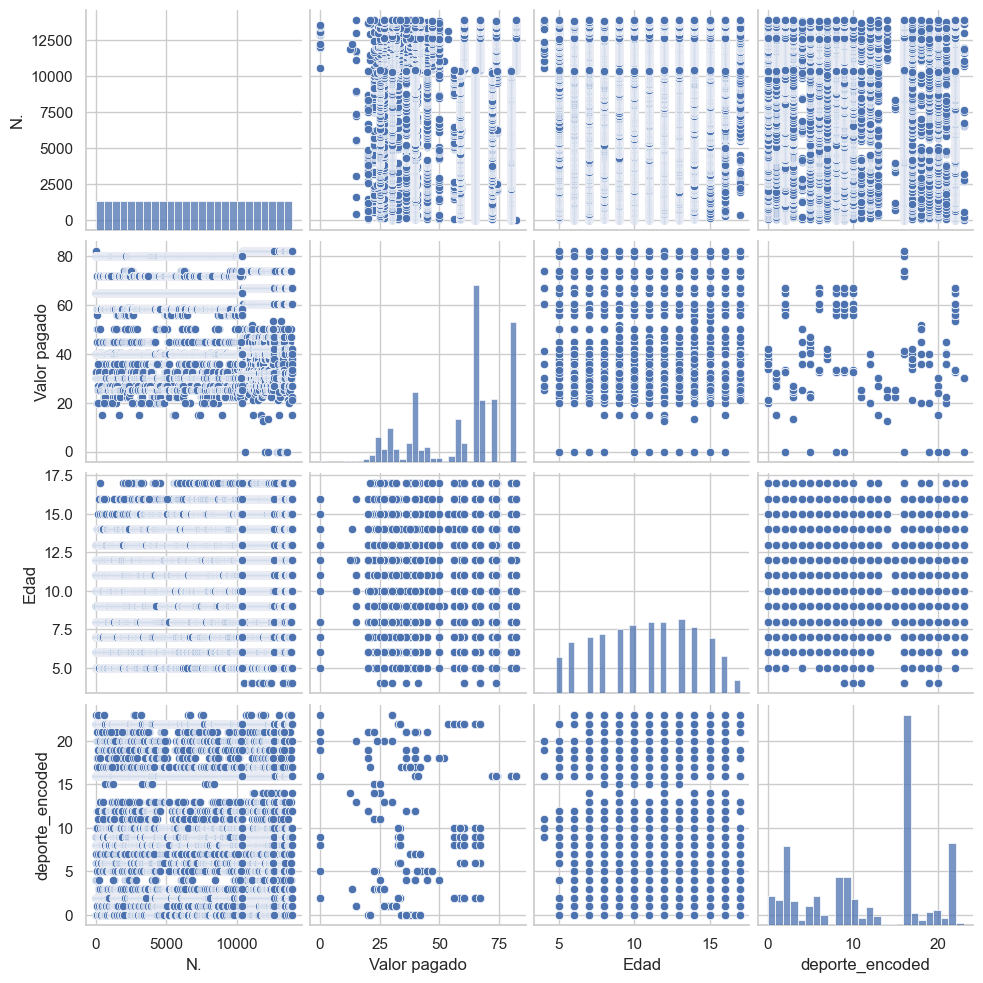

In [81]:

# Seleccionar las columnas relevantes
columnas_relacionadas = ['N.', 'Valor pagado', 'Edad', 'deporte_encoded']

# Crear gráficos de dispersión
sns.pairplot(df[columnas_relacionadas])

# Mostrar los gráficos
plt.show()

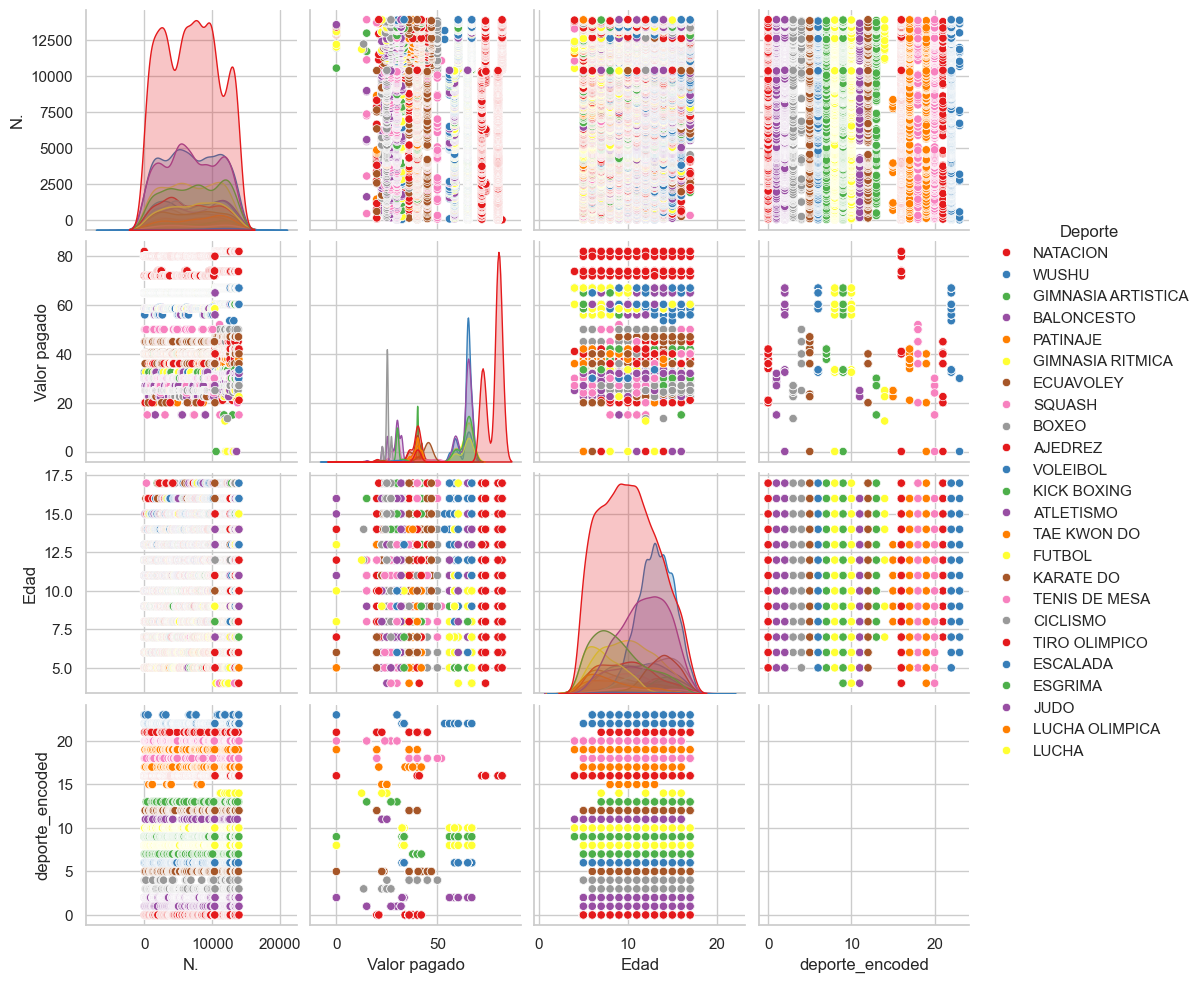

In [82]:

# Seleccionar las columnas relevantes
columnas_relacionadas = ['N.', 'Valor pagado', 'Edad', 'deporte_encoded', 'Deporte']

# Crear gráficos de dispersión
sns.pairplot(df[columnas_relacionadas], hue='Deporte', palette='Set1')

# Mostrar los gráficos
plt.show()

In [83]:

# Seleccionar las columnas relevantes para el alcance deportivo por cada deporte
columnas_alcance_deportivo = ['N.', 'Valor pagado', 'Edad', 'deporte_encoded']

# Crear un nuevo DataFrame con las columnas relevantes
df_alcance_deportivo = df[columnas_alcance_deportivo]

# Calcular la matriz de correlación
matriz_correlacion = df_alcance_deportivo.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

                       N.  Valor pagado      Edad  deporte_encoded
N.               1.000000     -0.004936  0.181497         0.002517
Valor pagado    -0.004936      1.000000 -0.071339         0.342361
Edad             0.181497     -0.071339  1.000000         0.011935
deporte_encoded  0.002517      0.342361  0.011935         1.000000


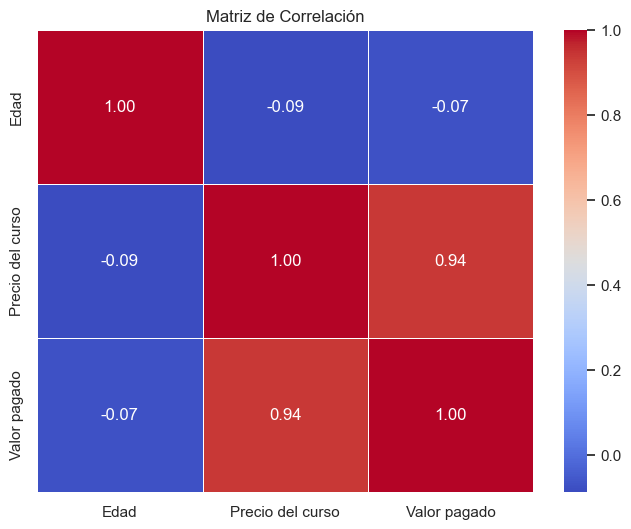

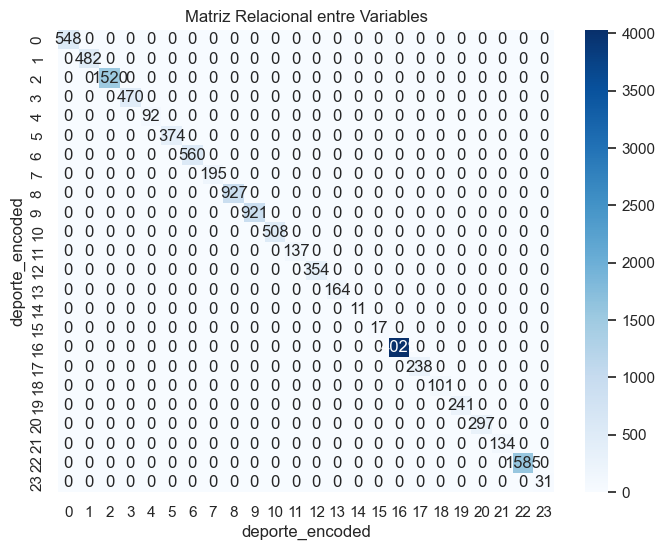

In [84]:

# Matriz de correlación
correlation_matrix = df[['Edad', 'Precio del curso', 'Valor pagado']].corr()

# Crear una figura y un eje para la gráfica
plt.figure(figsize=(8, 6))

# Crear la gráfica de matriz de correlación con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar la gráfica
plt.show()

# Matriz relacional entre variables
plt.figure(figsize=(8, 6))

# Crear la gráfica de matriz relacional entre variables con Seaborn
sns.heatmap(pd.crosstab(df['deporte_encoded'], df['deporte_encoded']), cmap='Blues', annot=True, fmt='d')

# Añadir título
plt.title('Matriz Relacional entre Variables')

# Mostrar la gráfica
plt.show()

In [85]:
# Calcular la matriz relacional entre variables
matriz_relacional = pd.crosstab(df['deporte_encoded'], df['deporte_encoded'])

# Mostrar la matriz relacional en forma de tabla
print("Matriz Relacional entre Variables:")
print(matriz_relacional)

Matriz Relacional entre Variables:
deporte_encoded   0    1     2    3   4    5    6    7    8    9   ...  14  \
deporte_encoded                                                    ...       
0                548    0     0    0   0    0    0    0    0    0  ...   0   
1                  0  482     0    0   0    0    0    0    0    0  ...   0   
2                  0    0  1520    0   0    0    0    0    0    0  ...   0   
3                  0    0     0  470   0    0    0    0    0    0  ...   0   
4                  0    0     0    0  92    0    0    0    0    0  ...   0   
5                  0    0     0    0   0  374    0    0    0    0  ...   0   
6                  0    0     0    0   0    0  560    0    0    0  ...   0   
7                  0    0     0    0   0    0    0  195    0    0  ...   0   
8                  0    0     0    0   0    0    0    0  927    0  ...   0   
9                  0    0     0    0   0    0    0    0    0  921  ...   0   
10                 0    0    

In [86]:
df.describe()

N.          Edad  Precio del curso  Valor pagado  \
count  13936.000000  13936.000000      13936.000000  13936.000000   
mean    6968.500000     10.747632         61.649971     59.179714   
min        1.000000      4.000000         25.000000      0.000000   
25%     3484.750000      8.000000         45.000000     40.500000   
50%     6968.500000     11.000000         65.000000     65.000000   
75%    10452.250000     13.000000         80.000000     72.000000   
max    13936.000000     17.000000         82.000000     82.000000   
std     4023.121011      3.238708         17.431209     17.625139   

                   Fecha de creación  Porcentaje           Mes           Año  \
count                          13936         0.0  13936.000000  13936.000000   
mean   2023-02-17 22:36:11.986222592         NaN      6.744690   2022.611079   
min              2021-06-06 00:00:00         NaN      2.000000   2021.000000   
25%              2022-06-30 00:00:00         NaN      6.000000   2022.000000   
50%              2023-06-23 00:00:00         NaN      7.000000   2023.000000   
75%              2024-06-12 00:00:00         NaN      7.000000   2024.000000   
max              2024-08-19 00:00:00         NaN      8.000000   2024.000000   
std                              NaN         NaN      0.548188      1.056225   

       centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  
count    13936.000000     13936.000000  13936.000000         13936.000000  
mean        11.215916        11.496843      1.590987             0.631889  
min          0.000000         0.000000      0.000000             0.000000  
25%          4.000000         5.000000      1.000000             0.000000  
50%         14.000000        12.000000      2.000000             1.000000  
75%         16.000000        16.000000      2.000000             1.000000  
max         21.000000        23.000000      2.000000             1.000000  
std          6.513012         6.968317      0.531237             0.482309

In [87]:
df.head()

N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  Mes   Año  \
0          82.0  Inscripción Online        2021-06-06         NaN    6  2021   
1          30.0  Inscripción Online        2021-06-10         NaN    6  2021   
2          80.0  Inscripción Online        2021-06-10         NaN    6  2021   
3          65.0  Inscripción Online        2021-06-11         NaN    6  2021   
4          65.0  Inscripción Online        2021-06-11         NaN    6  2021   

   centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  
0              14               16             2                    0  
1              20               23             2                    0  
2              14               16             2                    0  
3              21                9             2                    0  
4               3                2             2                    0

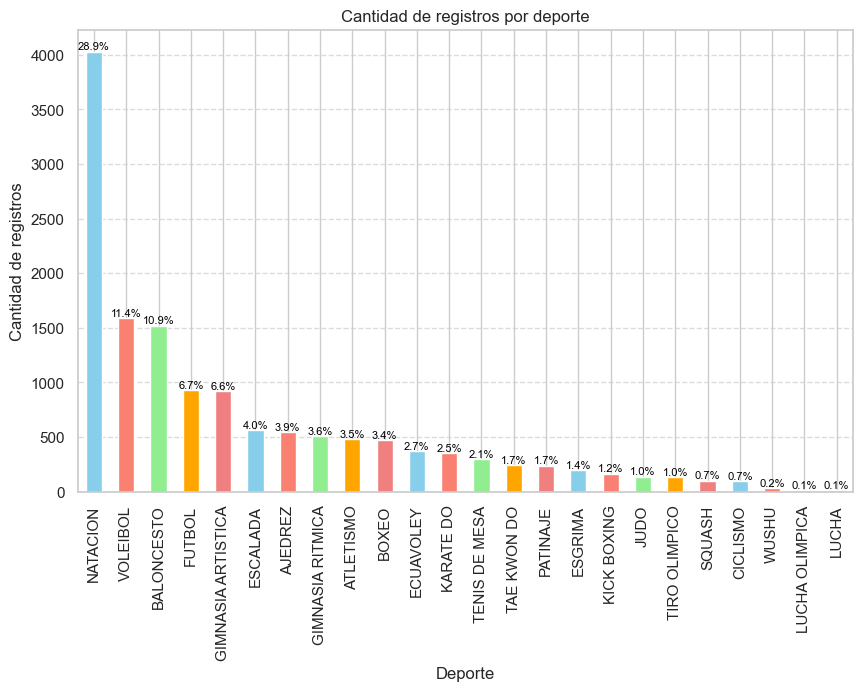

In [88]:
# Contar la cantidad de registros para cada categoría de deporte
conteo_deportes = df['Deporte'].value_counts()

# Definir colores personalizados
colores = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
ax = conteo_deportes.plot(kind='bar', color=colores)
plt.title('Cantidad de registros por deporte')
plt.xlabel('Deporte')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=90)

# Agregar etiquetas con valores numéricos y porcentajes en las barras
for i, v in enumerate(conteo_deportes):
    # ax.text(i, v + 0.2, str(v), ha='center', va='bottom')
    ax.text(i, v +0.2, '{:.1f}%'.format((v / sum(conteo_deportes)) * 100), ha='center', va='bottom', color='black', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [89]:
# Contar el número de inscripciones por deporte
inscripciones_por_deporte = df['Deporte'].value_counts()

# Calcular el porcentaje de inscripciones por deporte
porcentaje_inscripciones = (inscripciones_por_deporte / len(df)) * 100

# Crear un nuevo DataFrame con la cantidad de inscripciones y el porcentaje correspondiente
tabla_inscripciones = pd.DataFrame({
    'Deporte': inscripciones_por_deporte.index,
    'Cantidad de Inscripciones': inscripciones_por_deporte.values,
    'Porcentaje': porcentaje_inscripciones.values
})

# Ordenar la tabla por cantidad de inscripciones en orden descendente
tabla_inscripciones = tabla_inscripciones.sort_values(by='Cantidad de Inscripciones', ascending=False)

# Mostrar la tabla
print(tabla_inscripciones)

               Deporte  Cantidad de Inscripciones  Porcentaje
0             NATACION                       4029   28.910735
1             VOLEIBOL                       1585   11.373421
2           BALONCESTO                       1520   10.907003
3               FUTBOL                        927    6.651837
4   GIMNASIA ARTISTICA                        921    6.608783
5             ESCALADA                        560    4.018370
6              AJEDREZ                        548    3.932262
7     GIMNASIA RITMICA                        508    3.645235
8            ATLETISMO                        482    3.458668
9                BOXEO                        470    3.372560
10           ECUAVOLEY                        374    2.683697
11           KARATE DO                        354    2.540184
12       TENIS DE MESA                        297    2.131171
13         TAE KWON DO                        241    1.729334
14            PATINAJE                        238    1.707807
15      

In [90]:
# Contar el número de deportistas únicos
cantidad_deportistas = df['Deportista'].nunique()

In [91]:
print("Cantidad de Deportistas Registrados:", cantidad_deportistas)

Cantidad de Deportistas Registrados: 4848


In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   N.                        13936 non-null  int64         
 1   Deportista                13936 non-null  object        
 2   Edad                      13936 non-null  int64         
 3   Deporte                   13936 non-null  object        
 4   Centro                    13936 non-null  object        
 5   Seleccione Forma de Pago  13936 non-null  object        
 6   Tipo de Banco             8534 non-null   object        
 7   Precio del curso          13936 non-null  int64         
 8   Valor pagado              13936 non-null  float64       
 9   Modo de Inscripción       13936 non-null  object        
 10  Fecha de creación         13936 non-null  datetime64[ns]
 11  Porcentaje                0 non-null      float64       
 12  Mes               

In [93]:
df['Fecha de creación'].min(), df['Fecha de creación'].max()

(Timestamp('2021-06-06 00:00:00'), Timestamp('2024-08-19 00:00:00'))

In [94]:
inconsistencias = df[df['Valor pagado'] > df['Precio del curso']]
print(inconsistencias)

Empty DataFrame
Columns: [N., Deportista, Edad, Deporte, Centro, Seleccione Forma de Pago, Tipo de Banco, Precio del curso, Valor pagado, Modo de Inscripción, Fecha de creación, Porcentaje, Mes, Año, centro_encoded, deporte_encoded, pago_encoded, inscripcion_encoded]
Index: []


In [95]:
# Verifica duplicados en todo el DataFrame
duplicados_totales = df.duplicated()

# Muestra las filas duplicadas
filas_duplicadas = df[df.duplicated()]

# Imprime los resultados
print("Registros duplicados en todo el DataFrame:")
print(duplicados_totales)

print("\nFilas duplicadas:")
print(filas_duplicadas)


Registros duplicados en todo el DataFrame:
0        False
1        False
2        False
3        False
4        False
         ...  
13931    False
13932    False
13933    False
13934    False
13935    False
Length: 13936, dtype: bool

Filas duplicadas:
Empty DataFrame
Columns: [N., Deportista, Edad, Deporte, Centro, Seleccione Forma de Pago, Tipo de Banco, Precio del curso, Valor pagado, Modo de Inscripción, Fecha de creación, Porcentaje, Mes, Año, centro_encoded, deporte_encoded, pago_encoded, inscripcion_encoded]
Index: []


In [96]:
categorias_deporte = df['Deporte'].unique()

print("Categorías de deporte:")
for categoria in categorias_deporte:
    print(categoria)

Categorías de deporte:
NATACION
WUSHU
GIMNASIA ARTISTICA
BALONCESTO
PATINAJE
GIMNASIA RITMICA
ECUAVOLEY
SQUASH
BOXEO
AJEDREZ
VOLEIBOL
KICK BOXING
ATLETISMO
TAE KWON DO
FUTBOL
KARATE DO
TENIS DE MESA
CICLISMO
TIRO OLIMPICO
ESCALADA
ESGRIMA
JUDO
LUCHA OLIMPICA
LUCHA


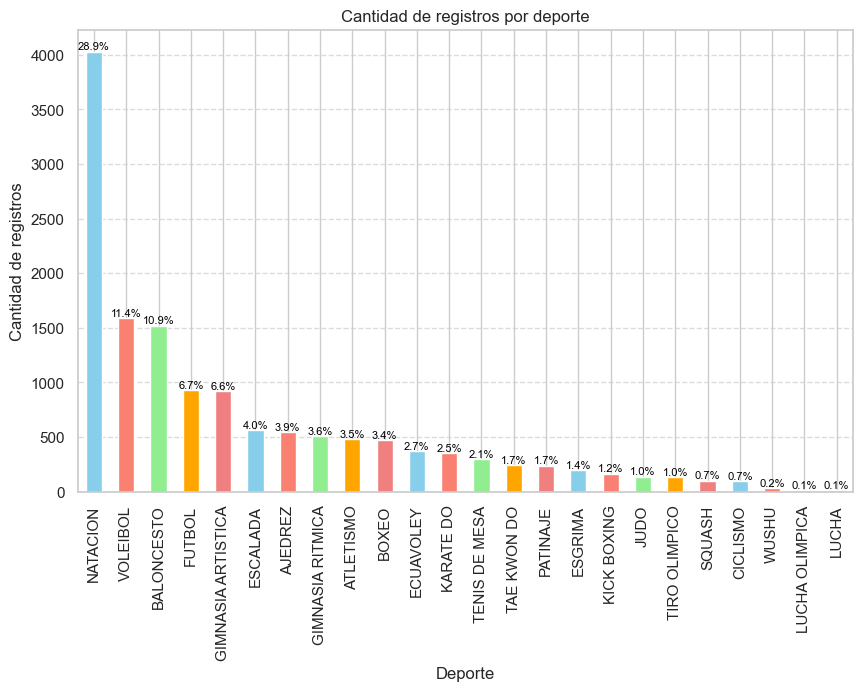

In [97]:
# Contar la cantidad de registros para cada categoría de deporte
conteo_deportes = df['Deporte'].value_counts()

# Definir colores personalizados
colores = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
ax = conteo_deportes.plot(kind='bar', color=colores)
plt.title('Cantidad de registros por deporte')
plt.xlabel('Deporte')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=90)

# Agregar etiquetas con valores numéricos y porcentajes en las barras
for i, v in enumerate(conteo_deportes):
    # ax.text(i, v + 0.2, str(v), ha='center', va='bottom')
    ax.text(i, v +0.2, '{:.1f}%'.format((v / sum(conteo_deportes)) * 100), ha='center', va='bottom', color='black', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

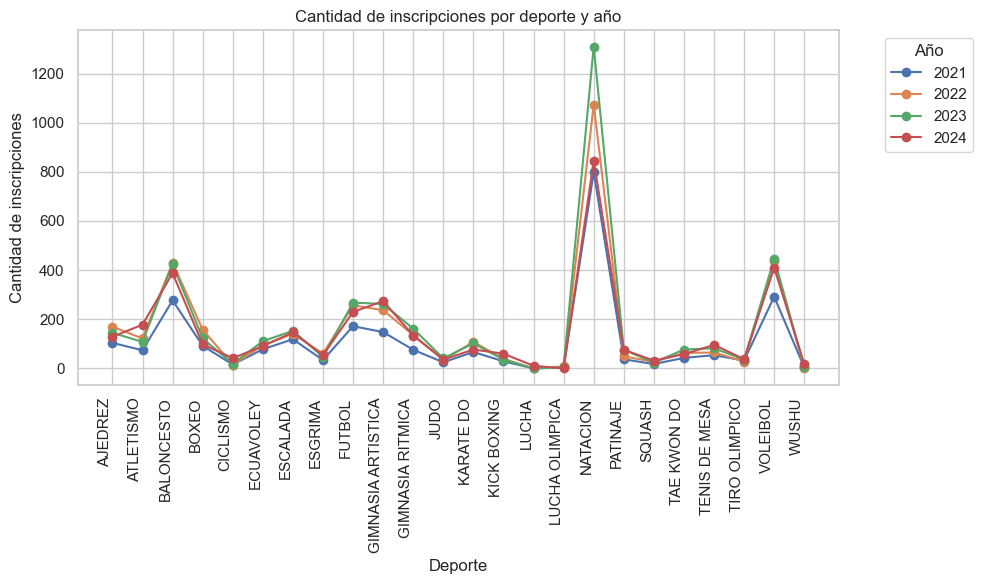

In [98]:
# Convertir la columna 'Fecha de creación' a tipo datetime
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'])

# Agrupar por año y contar la cantidad de inscripciones por deporte
conteo_inscripciones = df.groupby(['Deporte', df['Fecha de creación'].dt.year]).size().unstack(fill_value=0)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
for deporte in conteo_inscripciones.columns:
    plt.plot(conteo_inscripciones.index, conteo_inscripciones[deporte], marker='o', label=deporte)

plt.title('Cantidad de inscripciones por deporte y año')
plt.xlabel('Deporte')
plt.ylabel('Cantidad de inscripciones')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [99]:
print(df.head())

   N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  Mes   Año  \
0          82.0  Inscripción O

In [100]:

# Suponiendo que df ya contiene las columnas necesarias
# Crear variables dummy para las columnas categóricas (por ejemplo, 'Deporte')
df_dummies = pd.get_dummies(df['Deporte'], prefix='Deporte')

# Concatenar las variables dummy con las demás columnas del DataFrame original
df_concat = pd.concat([df[['Edad', 'Precio del curso', 'Valor pagado', 'Deporte']], df_dummies], axis=1)

# Verificar el DataFrame resultante
print(df_concat.head())

   Edad  Precio del curso  Valor pagado             Deporte  Deporte_AJEDREZ  \
0    10                82          82.0            NATACION            False   
1    13                30          30.0               WUSHU            False   
2     7                80          80.0            NATACION            False   
3    12                65          65.0  GIMNASIA ARTISTICA            False   
4    11                65          65.0          BALONCESTO            False   

   Deporte_ATLETISMO  Deporte_BALONCESTO  Deporte_BOXEO  Deporte_CICLISMO  \
0              False               False          False             False   
1              False               False          False             False   
2              False               False          False             False   
3              False               False          False             False   
4              False                True          False             False   

   Deporte_ECUAVOLEY  ...  Deporte_LUCHA  Deporte_LUCHA 

In [101]:
df.head()

N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  Mes   Año  \
0          82.0  Inscripción Online        2021-06-06         NaN    6  2021   
1          30.0  Inscripción Online        2021-06-10         NaN    6  2021   
2          80.0  Inscripción Online        2021-06-10         NaN    6  2021   
3          65.0  Inscripción Online        2021-06-11         NaN    6  2021   
4          65.0  Inscripción Online        2021-06-11         NaN    6  2021   

   centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  
0              14               16             2                    0  
1              20               23             2                    0  
2              14               16             2                    0  
3              21                9             2                    0  
4               3                2             2                    0

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics


In [225]:
# Preprocesar las variables categóricas con get_dummies
categorical_columns = ['Deporte', 'Centro', 'Seleccione Forma de Pago', 'Modo de Inscripción']
df_categorical = pd.get_dummies(df[categorical_columns], drop_first=True)

# Procesar la columna de fecha
df['Año'] = df['Fecha de creación'].dt.year
df['Mes'] = df['Fecha de creación'].dt.month
df['Día'] = df['Fecha de creación'].dt.day

# Crear el conjunto de datos preprocesado
X = pd.concat([df[['N.', 'Edad', 'Precio del curso', 'Valor pagado', 'Año', 'Mes', 'Día']], df_categorical], axis=1)

# Codificar las etiquetas de la variable objetivo
le = LabelEncoder()
y = le.fit_transform(df['Deporte'])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Inicializar y entrenar el modelo de XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print("Modelos entrenados con éxito.")

Modelos entrenados con éxito.


# Grafico de Resultados Iniciales con subconjunto de datos 1


In [227]:
df.head()

N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  Mes   Año  \
0          82.0  Inscripción Online        2021-06-06         NaN    6  2021   
1          30.0  Inscripción Online        2021-06-10         NaN    6  2021   
2          80.0  Inscripción Online        2021-06-10         NaN    6  2021   
3          65.0  Inscripción Online        2021-06-11         NaN    6  2021   
4          65.0  Inscripción Online        2021-06-11         NaN    6  2021   

   centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  Día  
0              14               16             2                    0    6  
1              20               23             2                    0   10  
2              14               16             2                    0   10  
3              21                9             2                    0   11  
4               3                2             2                    0   11

In [228]:

# Supongamos que tienes un DataFrame llamado df con tus datos

# Convertir Fecha de creación a formato de fecha
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'])

# Obtener una lista de años únicos en el DataFrame
años_únicos = df['Año'].unique()

# Iterar sobre cada año
for año in años_únicos:
    # Filtrar los datos por año
    df_año = df[df['Año'] == año]
    
    # Obtener una lista de deportes únicos en el DataFrame filtrado por año
    deportes_únicos = df_año['Deporte'].unique()
    
    # Iterar sobre cada deporte
    for deporte in deportes_únicos:
        # Filtrar los datos por deporte dentro del año actual
        df_año_deporte = df_año[df_año['Deporte'] == deporte]
        
        # Aquí puedes realizar las operaciones que necesites con los datos del año y deporte actual
        # Por ejemplo, calcular estadísticas, graficar, etc.
        
        # Ejemplo: Imprimir la cantidad de registros para el año y deporte actual
        print(f"Año: {año}, Deporte: {deporte}, Cantidad de registros: {len(df_año_deporte)}")

Año: 2021, Deporte: NATACION, Cantidad de registros: 799
Año: 2021, Deporte: WUSHU, Cantidad de registros: 4
Año: 2021, Deporte: GIMNASIA ARTISTICA, Cantidad de registros: 148
Año: 2021, Deporte: BALONCESTO, Cantidad de registros: 277
Año: 2021, Deporte: PATINAJE, Cantidad de registros: 37
Año: 2021, Deporte: GIMNASIA RITMICA, Cantidad de registros: 76
Año: 2021, Deporte: ECUAVOLEY, Cantidad de registros: 78
Año: 2021, Deporte: SQUASH, Cantidad de registros: 18
Año: 2021, Deporte: BOXEO, Cantidad de registros: 92
Año: 2021, Deporte: AJEDREZ, Cantidad de registros: 104
Año: 2021, Deporte: VOLEIBOL, Cantidad de registros: 292
Año: 2021, Deporte: KICK BOXING, Cantidad de registros: 29
Año: 2021, Deporte: ATLETISMO, Cantidad de registros: 74
Año: 2021, Deporte: TAE KWON DO, Cantidad de registros: 43
Año: 2021, Deporte: FUTBOL, Cantidad de registros: 172
Año: 2021, Deporte: KARATE DO, Cantidad de registros: 67
Año: 2021, Deporte: CICLISMO, Cantidad de registros: 16
Año: 2021, Deporte: TIRO 

In [229]:
df.isnull().any()

N.                          False
Deportista                  False
Edad                        False
Deporte                     False
Centro                      False
Seleccione Forma de Pago    False
Tipo de Banco                True
Precio del curso            False
Valor pagado                False
Modo de Inscripción         False
Fecha de creación           False
Porcentaje                   True
Mes                         False
Año                         False
centro_encoded              False
deporte_encoded             False
pago_encoded                False
inscripcion_encoded         False
Día                         False
dtype: bool

In [230]:
df.describe()

N.          Edad  Precio del curso  Valor pagado  \
count  13936.000000  13936.000000      13936.000000  13936.000000   
mean    6968.500000     10.747632         61.649971     59.179714   
min        1.000000      4.000000         25.000000      0.000000   
25%     3484.750000      8.000000         45.000000     40.500000   
50%     6968.500000     11.000000         65.000000     65.000000   
75%    10452.250000     13.000000         80.000000     72.000000   
max    13936.000000     17.000000         82.000000     82.000000   
std     4023.121011      3.238708         17.431209     17.625139   

                   Fecha de creación  Porcentaje           Mes           Año  \
count                          13936         0.0  13936.000000  13936.000000   
mean   2023-02-17 22:36:11.986222592         NaN      6.744690   2022.611079   
min              2021-06-06 00:00:00         NaN      2.000000   2021.000000   
25%              2022-06-30 00:00:00         NaN      6.000000   2022.000000   
50%              2023-06-23 00:00:00         NaN      7.000000   2023.000000   
75%              2024-06-12 00:00:00         NaN      7.000000   2024.000000   
max              2024-08-19 00:00:00         NaN      8.000000   2024.000000   
std                              NaN         NaN      0.548188      1.056225   

       centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  \
count    13936.000000     13936.000000  13936.000000         13936.000000   
mean        11.215916        11.496843      1.590987             0.631889   
min          0.000000         0.000000      0.000000             0.000000   
25%          4.000000         5.000000      1.000000             0.000000   
50%         14.000000        12.000000      2.000000             1.000000   
75%         16.000000        16.000000      2.000000             1.000000   
max         21.000000        23.000000      2.000000             1.000000   
std          6.513012         6.968317      0.531237             0.482309   

                Día  
count  13936.000000  
mean      17.251005  
min        1.000000  
25%       10.000000  
50%       19.000000  
75%       25.000000  
max       31.000000  
std        9.087274

In [231]:
df['Deporte'].value_counts()

Deporte
NATACION              4029
VOLEIBOL              1585
BALONCESTO            1520
FUTBOL                 927
GIMNASIA ARTISTICA     921
ESCALADA               560
AJEDREZ                548
GIMNASIA RITMICA       508
ATLETISMO              482
BOXEO                  470
ECUAVOLEY              374
KARATE DO              354
TENIS DE MESA          297
TAE KWON DO            241
PATINAJE               238
ESGRIMA                195
KICK BOXING            164
JUDO                   137
TIRO OLIMPICO          134
SQUASH                 101
CICLISMO                92
WUSHU                   31
LUCHA OLIMPICA          17
LUCHA                   11
Name: count, dtype: int64

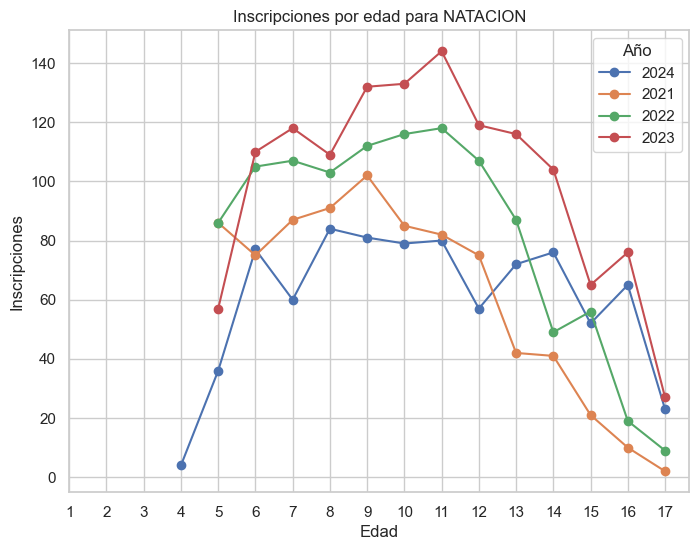

Tabla para NATACION:
Año    2021   2022   2023  2024
Edad                           
4       0.0    0.0    0.0   4.0
5      86.0   86.0   57.0  36.0
6      75.0  105.0  110.0  77.0
7      87.0  107.0  118.0  60.0
8      91.0  103.0  109.0  84.0
9     102.0  112.0  132.0  81.0
10     85.0  116.0  133.0  79.0
11     82.0  118.0  144.0  80.0
12     75.0  107.0  119.0  57.0
13     42.0   87.0  116.0  72.0
14     41.0   49.0  104.0  76.0
15     21.0   56.0   65.0  52.0
16     10.0   19.0   76.0  65.0
17      2.0    9.0   27.0  23.0




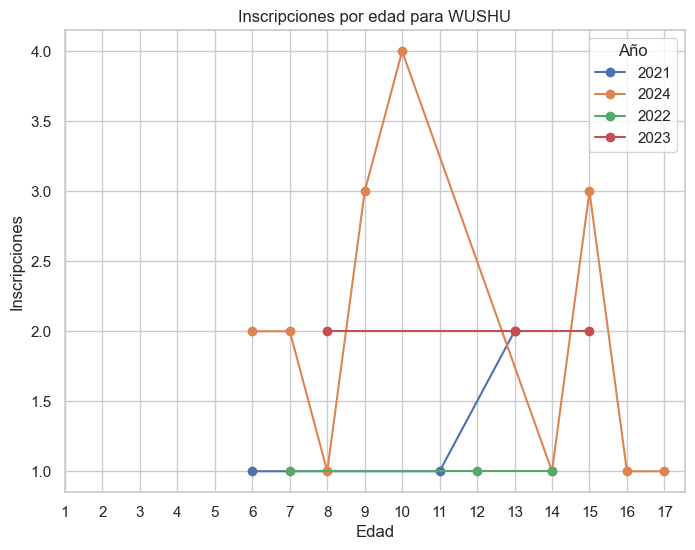

Tabla para WUSHU:
Año   2021  2022  2023  2024
Edad                        
6      1.0   0.0   0.0   2.0
7      0.0   1.0   0.0   2.0
8      0.0   0.0   2.0   1.0
9      0.0   0.0   0.0   3.0
10     0.0   0.0   0.0   4.0
11     1.0   0.0   0.0   0.0
12     0.0   1.0   0.0   0.0
13     2.0   0.0   2.0   0.0
14     0.0   1.0   0.0   1.0
15     0.0   0.0   2.0   3.0
16     0.0   0.0   0.0   1.0
17     0.0   0.0   0.0   1.0




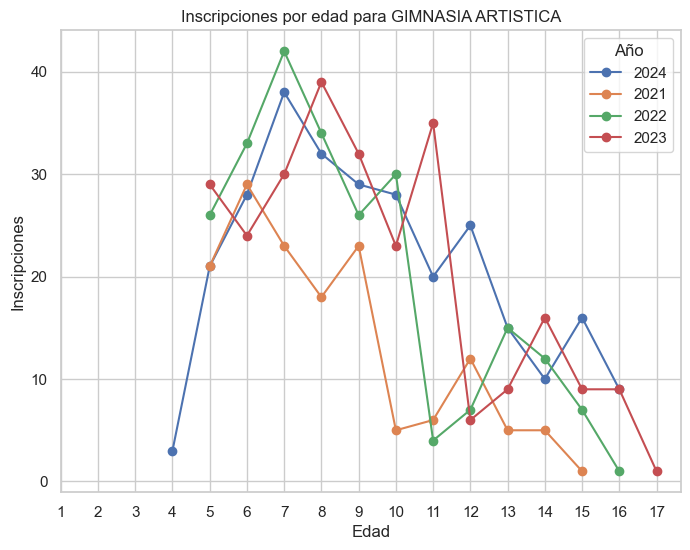

Tabla para GIMNASIA ARTISTICA:
Año   2021  2022  2023  2024
Edad                        
4      0.0   0.0   0.0   3.0
5     21.0  26.0  29.0  21.0
6     29.0  33.0  24.0  28.0
7     23.0  42.0  30.0  38.0
8     18.0  34.0  39.0  32.0
9     23.0  26.0  32.0  29.0
10     5.0  30.0  23.0  28.0
11     6.0   4.0  35.0  20.0
12    12.0   7.0   6.0  25.0
13     5.0  15.0   9.0  15.0
14     5.0  12.0  16.0  10.0
15     1.0   7.0   9.0  16.0
16     0.0   1.0   9.0   9.0
17     0.0   0.0   1.0   0.0




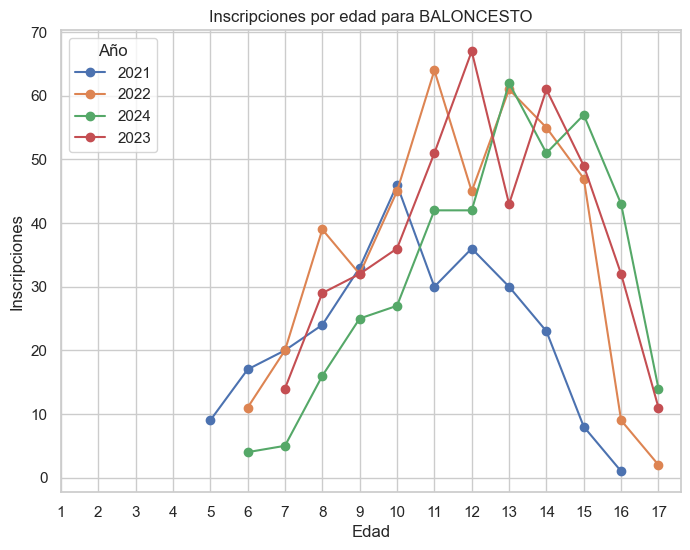

Tabla para BALONCESTO:
Año   2021  2022  2023  2024
Edad                        
5      9.0   0.0   0.0   0.0
6     17.0  11.0   0.0   4.0
7     20.0  20.0  14.0   5.0
8     24.0  39.0  29.0  16.0
9     33.0  32.0  32.0  25.0
10    46.0  45.0  36.0  27.0
11    30.0  64.0  51.0  42.0
12    36.0  45.0  67.0  42.0
13    30.0  61.0  43.0  62.0
14    23.0  55.0  61.0  51.0
15     8.0  47.0  49.0  57.0
16     1.0   9.0  32.0  43.0
17     0.0   2.0  11.0  14.0




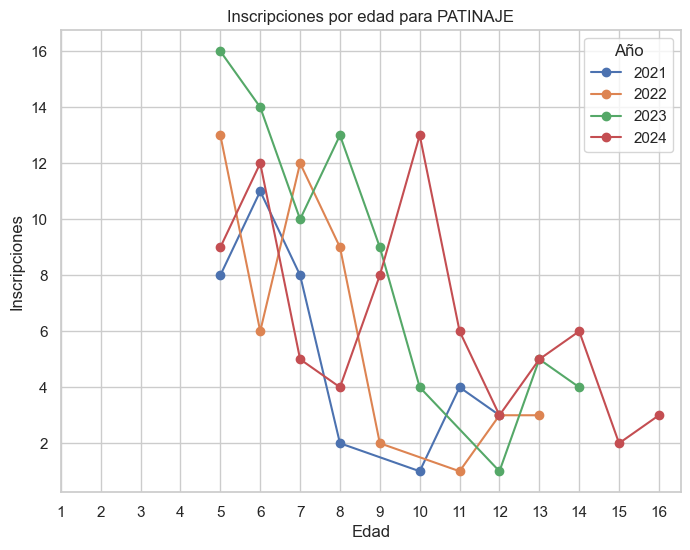

Tabla para PATINAJE:
Año   2021  2022  2023  2024
Edad                        
5      8.0  13.0  16.0   9.0
6     11.0   6.0  14.0  12.0
7      8.0  12.0  10.0   5.0
8      2.0   9.0  13.0   4.0
9      0.0   2.0   9.0   8.0
10     1.0   0.0   4.0  13.0
11     4.0   1.0   0.0   6.0
12     3.0   3.0   1.0   3.0
13     0.0   3.0   5.0   5.0
14     0.0   0.0   4.0   6.0
15     0.0   0.0   0.0   2.0
16     0.0   0.0   0.0   3.0




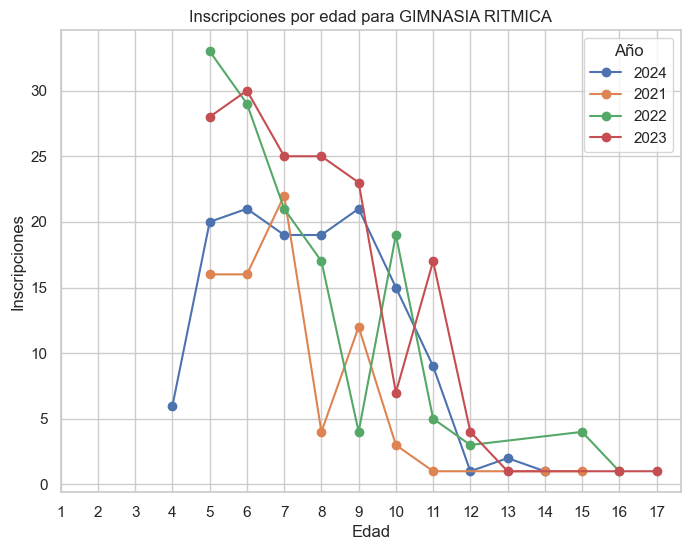

Tabla para GIMNASIA RITMICA:
Año   2021  2022  2023  2024
Edad                        
4      0.0   0.0   0.0   6.0
5     16.0  33.0  28.0  20.0
6     16.0  29.0  30.0  21.0
7     22.0  21.0  25.0  19.0
8      4.0  17.0  25.0  19.0
9     12.0   4.0  23.0  21.0
10     3.0  19.0   7.0  15.0
11     1.0   5.0  17.0   9.0
12     0.0   3.0   4.0   1.0
13     0.0   0.0   1.0   2.0
14     1.0   0.0   0.0   1.0
15     1.0   4.0   0.0   0.0
16     0.0   1.0   1.0   0.0
17     0.0   0.0   1.0   0.0




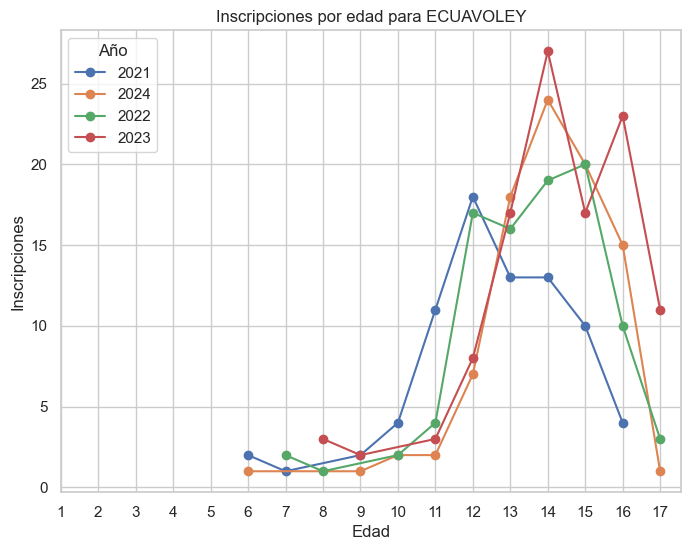

Tabla para ECUAVOLEY:
Año   2021  2022  2023  2024
Edad                        
6      2.0   0.0   0.0   1.0
7      1.0   2.0   0.0   0.0
8      0.0   1.0   3.0   0.0
9      2.0   0.0   2.0   1.0
10     4.0   2.0   0.0   2.0
11    11.0   4.0   3.0   2.0
12    18.0  17.0   8.0   7.0
13    13.0  16.0  17.0  18.0
14    13.0  19.0  27.0  24.0
15    10.0  20.0  17.0  20.0
16     4.0  10.0  23.0  15.0
17     0.0   3.0  11.0   1.0




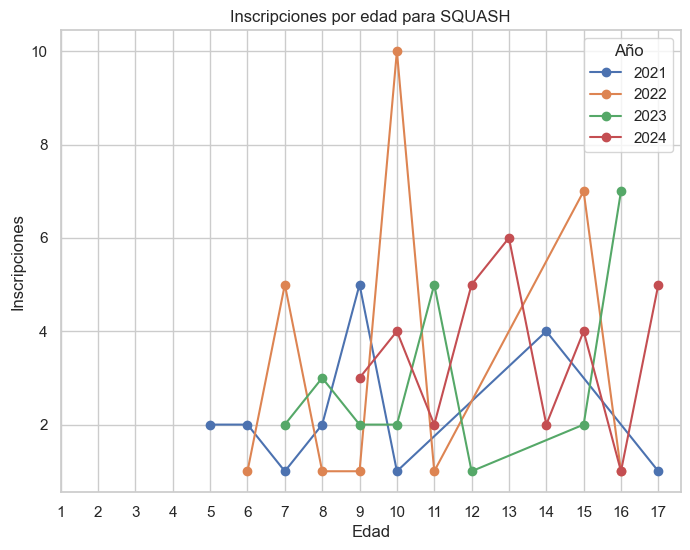

Tabla para SQUASH:
Año   2021  2022  2023  2024
Edad                        
5      2.0   0.0   0.0   0.0
6      2.0   1.0   0.0   0.0
7      1.0   5.0   2.0   0.0
8      2.0   1.0   3.0   0.0
9      5.0   1.0   2.0   3.0
10     1.0  10.0   2.0   4.0
11     0.0   1.0   5.0   2.0
12     0.0   0.0   1.0   5.0
13     0.0   0.0   0.0   6.0
14     4.0   0.0   0.0   2.0
15     0.0   7.0   2.0   4.0
16     0.0   1.0   7.0   1.0
17     1.0   0.0   0.0   5.0




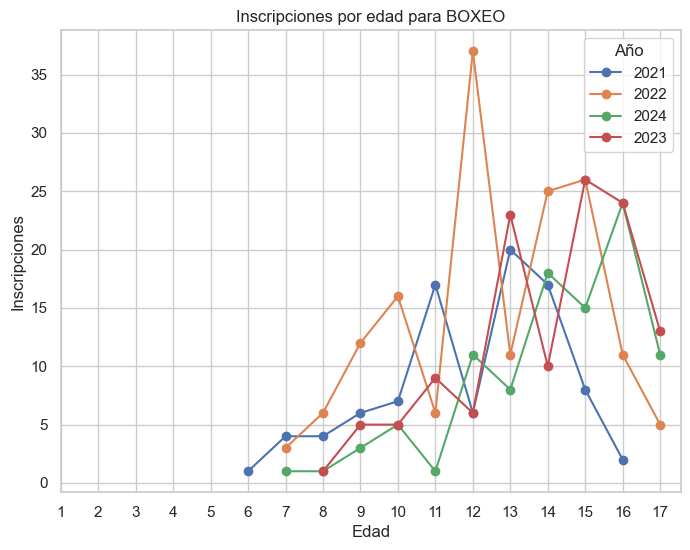

Tabla para BOXEO:
Año   2021  2022  2023  2024
Edad                        
6      1.0   0.0   0.0   0.0
7      4.0   3.0   0.0   1.0
8      4.0   6.0   1.0   1.0
9      6.0  12.0   5.0   3.0
10     7.0  16.0   5.0   5.0
11    17.0   6.0   9.0   1.0
12     6.0  37.0   6.0  11.0
13    20.0  11.0  23.0   8.0
14    17.0  25.0  10.0  18.0
15     8.0  26.0  26.0  15.0
16     2.0  11.0  24.0  24.0
17     0.0   5.0  13.0  11.0




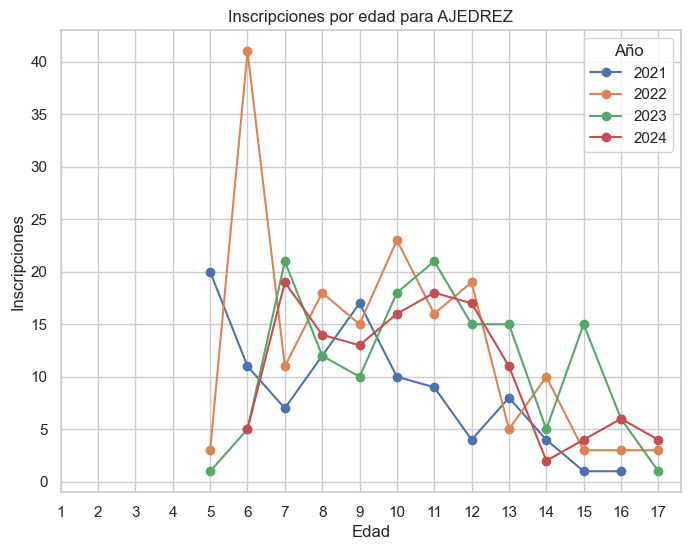

Tabla para AJEDREZ:
Año   2021  2022  2023  2024
Edad                        
5     20.0   3.0   1.0   0.0
6     11.0  41.0   5.0   5.0
7      7.0  11.0  21.0  19.0
8     12.0  18.0  12.0  14.0
9     17.0  15.0  10.0  13.0
10    10.0  23.0  18.0  16.0
11     9.0  16.0  21.0  18.0
12     4.0  19.0  15.0  17.0
13     8.0   5.0  15.0  11.0
14     4.0  10.0   5.0   2.0
15     1.0   3.0  15.0   4.0
16     1.0   3.0   6.0   6.0
17     0.0   3.0   1.0   4.0




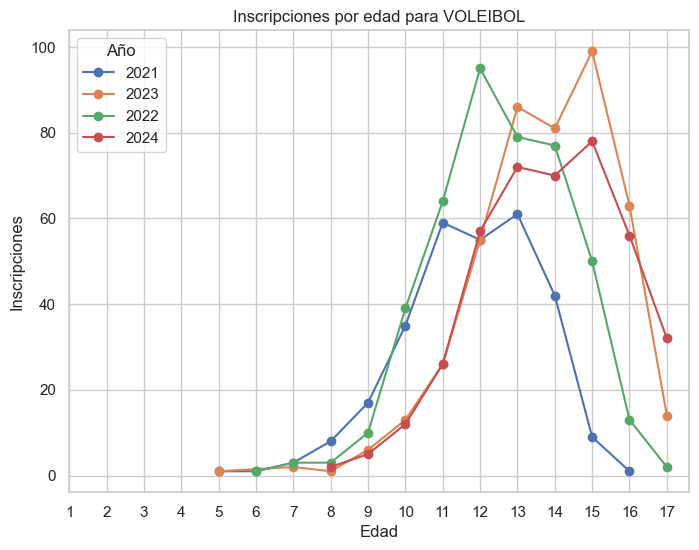

Tabla para VOLEIBOL:
Año   2021  2022  2023  2024
Edad                        
5      1.0   0.0   1.0   0.0
6      1.0   1.0   0.0   0.0
7      3.0   3.0   2.0   0.0
8      8.0   3.0   1.0   2.0
9     17.0  10.0   6.0   5.0
10    35.0  39.0  13.0  12.0
11    59.0  64.0  26.0  26.0
12    55.0  95.0  55.0  57.0
13    61.0  79.0  86.0  72.0
14    42.0  77.0  81.0  70.0
15     9.0  50.0  99.0  78.0
16     1.0  13.0  63.0  56.0
17     0.0   2.0  14.0  32.0




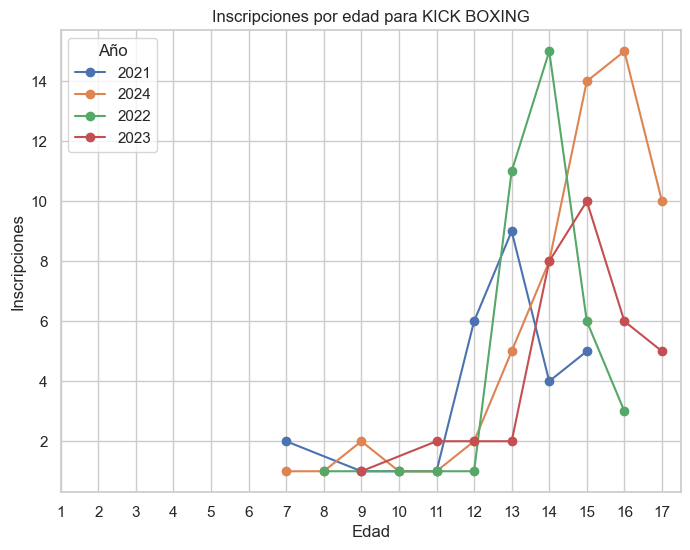

Tabla para KICK BOXING:
Año   2021  2022  2023  2024
Edad                        
7      2.0   0.0   0.0   1.0
8      0.0   1.0   0.0   1.0
9      1.0   0.0   1.0   2.0
10     1.0   1.0   0.0   1.0
11     1.0   1.0   2.0   1.0
12     6.0   1.0   2.0   2.0
13     9.0  11.0   2.0   5.0
14     4.0  15.0   8.0   8.0
15     5.0   6.0  10.0  14.0
16     0.0   3.0   6.0  15.0
17     0.0   0.0   5.0  10.0




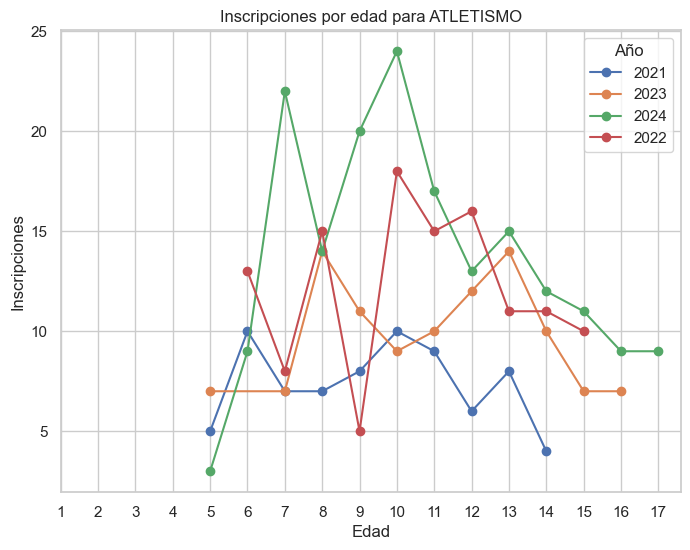

Tabla para ATLETISMO:
Año   2021  2022  2023  2024
Edad                        
5      5.0   0.0   7.0   3.0
6     10.0  13.0   0.0   9.0
7      7.0   8.0   7.0  22.0
8      7.0  15.0  14.0  14.0
9      8.0   5.0  11.0  20.0
10    10.0  18.0   9.0  24.0
11     9.0  15.0  10.0  17.0
12     6.0  16.0  12.0  13.0
13     8.0  11.0  14.0  15.0
14     4.0  11.0  10.0  12.0
15     0.0  10.0   7.0  11.0
16     0.0   0.0   7.0   9.0
17     0.0   0.0   0.0   9.0




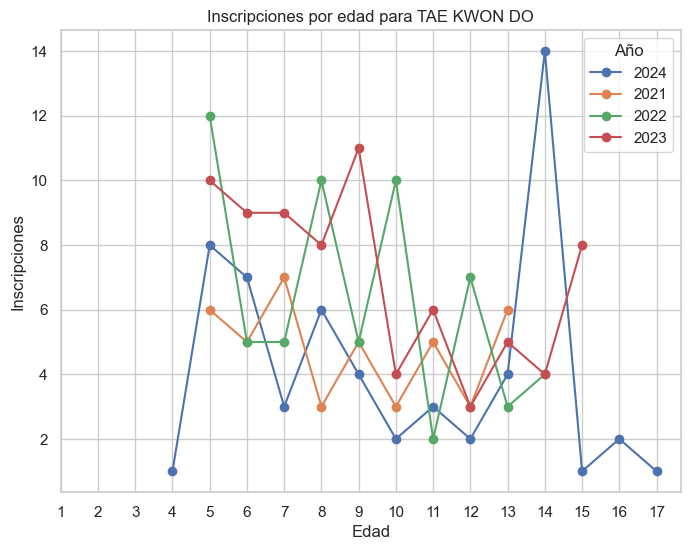

Tabla para TAE KWON DO:
Año   2021  2022  2023  2024
Edad                        
4      0.0   0.0   0.0   1.0
5      6.0  12.0  10.0   8.0
6      5.0   5.0   9.0   7.0
7      7.0   5.0   9.0   3.0
8      3.0  10.0   8.0   6.0
9      5.0   5.0  11.0   4.0
10     3.0  10.0   4.0   2.0
11     5.0   2.0   6.0   3.0
12     3.0   7.0   3.0   2.0
13     6.0   3.0   5.0   4.0
14     0.0   4.0   4.0  14.0
15     0.0   0.0   8.0   1.0
16     0.0   0.0   0.0   2.0
17     0.0   0.0   0.0   1.0




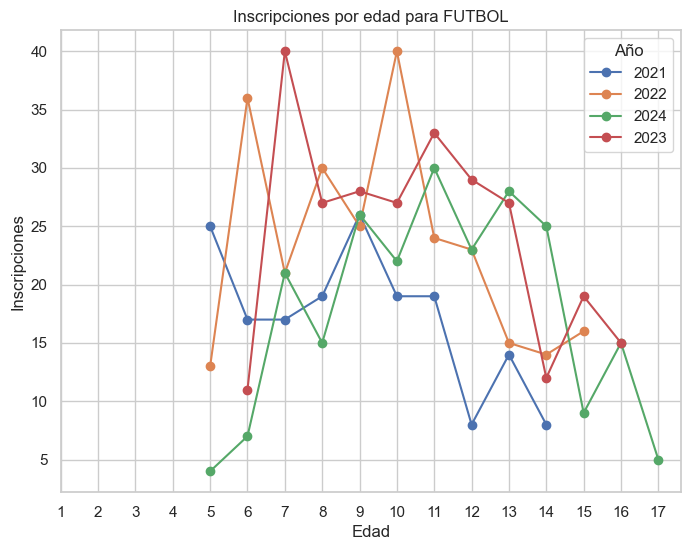

Tabla para FUTBOL:
Año   2021  2022  2023  2024
Edad                        
5     25.0  13.0   0.0   4.0
6     17.0  36.0  11.0   7.0
7     17.0  21.0  40.0  21.0
8     19.0  30.0  27.0  15.0
9     26.0  25.0  28.0  26.0
10    19.0  40.0  27.0  22.0
11    19.0  24.0  33.0  30.0
12     8.0  23.0  29.0  23.0
13    14.0  15.0  27.0  28.0
14     8.0  14.0  12.0  25.0
15     0.0  16.0  19.0   9.0
16     0.0   0.0  15.0  15.0
17     0.0   0.0   0.0   5.0




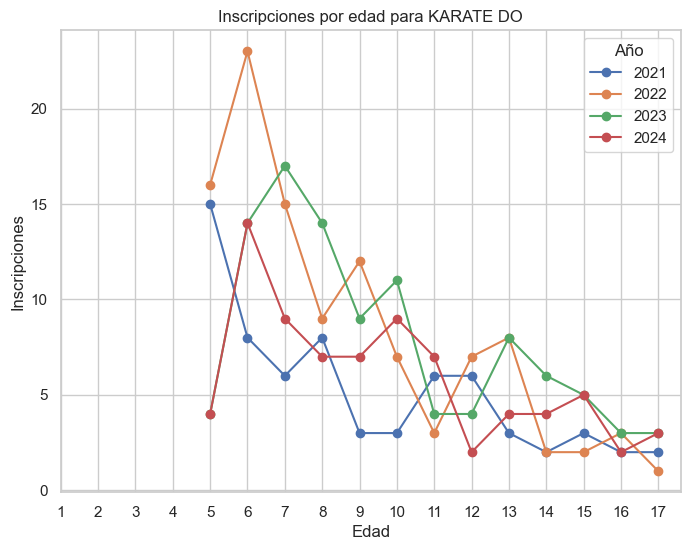

Tabla para KARATE DO:
Año   2021  2022  2023  2024
Edad                        
5     15.0  16.0   4.0   4.0
6      8.0  23.0  14.0  14.0
7      6.0  15.0  17.0   9.0
8      8.0   9.0  14.0   7.0
9      3.0  12.0   9.0   7.0
10     3.0   7.0  11.0   9.0
11     6.0   3.0   4.0   7.0
12     6.0   7.0   4.0   2.0
13     3.0   8.0   8.0   4.0
14     2.0   2.0   6.0   4.0
15     3.0   2.0   5.0   5.0
16     2.0   3.0   3.0   2.0
17     2.0   1.0   3.0   3.0




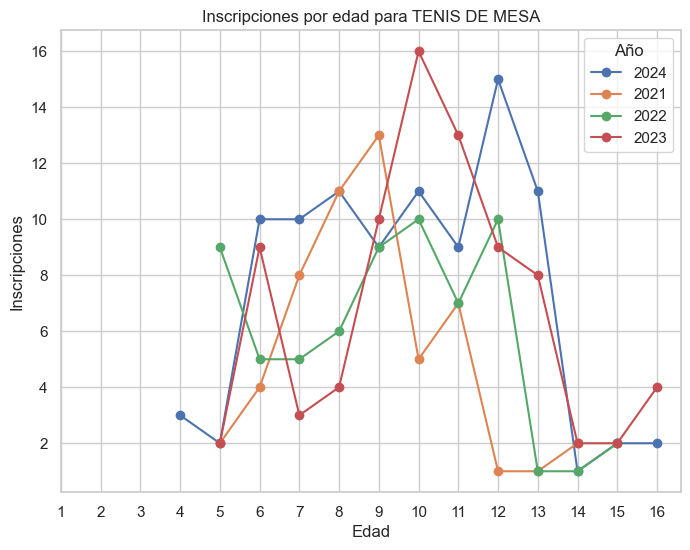

Tabla para TENIS DE MESA:
Año   2021  2022  2023  2024
Edad                        
4      0.0   0.0   0.0   3.0
5      2.0   9.0   2.0   2.0
6      4.0   5.0   9.0  10.0
7      8.0   5.0   3.0  10.0
8     11.0   6.0   4.0  11.0
9     13.0   9.0  10.0   9.0
10     5.0  10.0  16.0  11.0
11     7.0   7.0  13.0   9.0
12     1.0  10.0   9.0  15.0
13     1.0   1.0   8.0  11.0
14     2.0   1.0   2.0   1.0
15     0.0   2.0   2.0   2.0
16     0.0   0.0   4.0   2.0




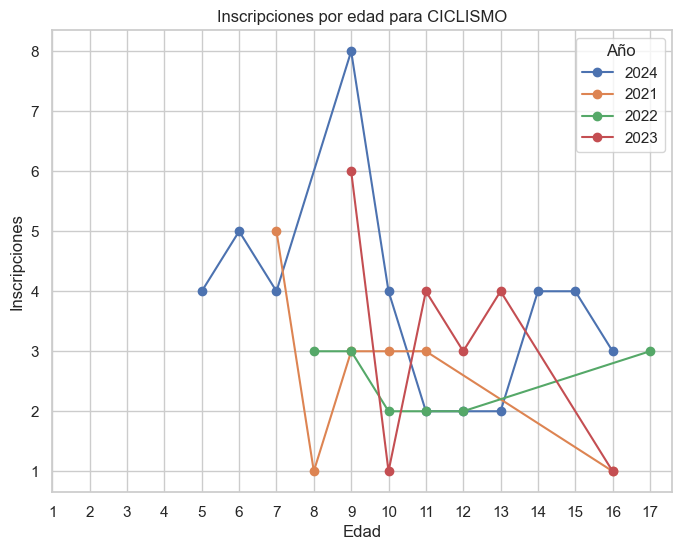

Tabla para CICLISMO:
Año   2021  2022  2023  2024
Edad                        
5      0.0   0.0   0.0   4.0
6      0.0   0.0   0.0   5.0
7      5.0   0.0   0.0   4.0
8      1.0   3.0   0.0   0.0
9      3.0   3.0   6.0   8.0
10     3.0   2.0   1.0   4.0
11     3.0   2.0   4.0   2.0
12     0.0   2.0   3.0   2.0
13     0.0   0.0   4.0   2.0
14     0.0   0.0   0.0   4.0
15     0.0   0.0   0.0   4.0
16     1.0   0.0   1.0   3.0
17     0.0   3.0   0.0   0.0




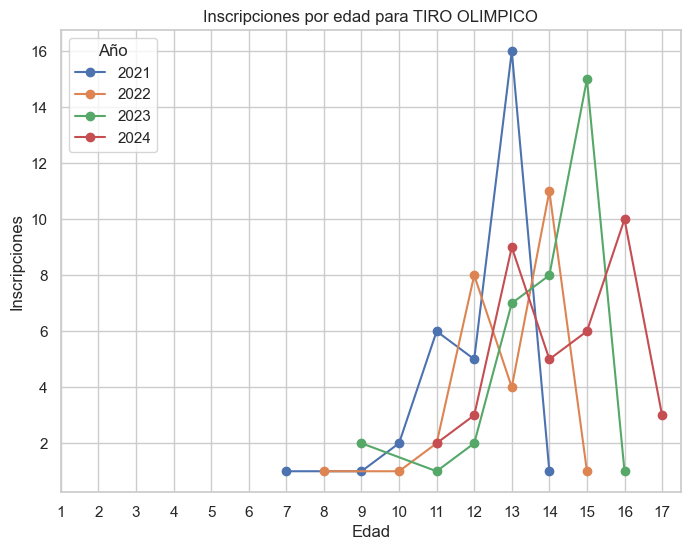

Tabla para TIRO OLIMPICO:
Año   2021  2022  2023  2024
Edad                        
7      1.0   0.0   0.0   0.0
8      0.0   1.0   0.0   0.0
9      1.0   0.0   2.0   0.0
10     2.0   1.0   0.0   0.0
11     6.0   2.0   1.0   2.0
12     5.0   8.0   2.0   3.0
13    16.0   4.0   7.0   9.0
14     1.0  11.0   8.0   5.0
15     0.0   1.0  15.0   6.0
16     0.0   0.0   1.0  10.0
17     0.0   0.0   0.0   3.0




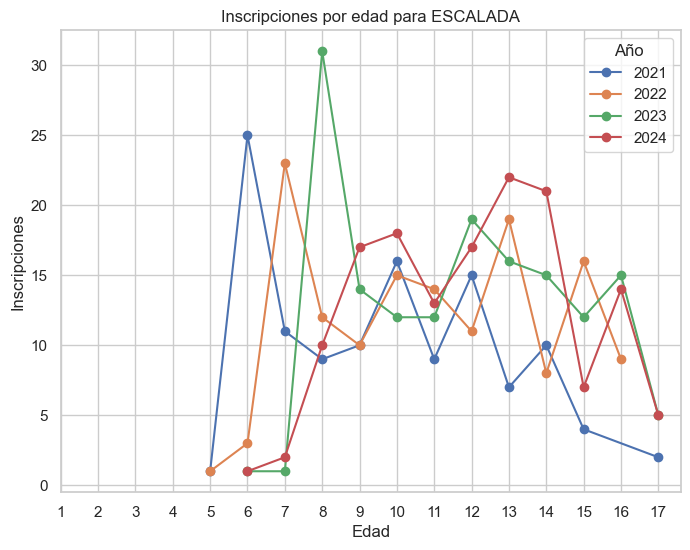

Tabla para ESCALADA:
Año   2021  2022  2023  2024
Edad                        
5      1.0   1.0   0.0   0.0
6     25.0   3.0   1.0   1.0
7     11.0  23.0   1.0   2.0
8      9.0  12.0  31.0  10.0
9     10.0  10.0  14.0  17.0
10    16.0  15.0  12.0  18.0
11     9.0  14.0  12.0  13.0
12    15.0  11.0  19.0  17.0
13     7.0  19.0  16.0  22.0
14    10.0   8.0  15.0  21.0
15     4.0  16.0  12.0   7.0
16     0.0   9.0  15.0  14.0
17     2.0   0.0   5.0   5.0




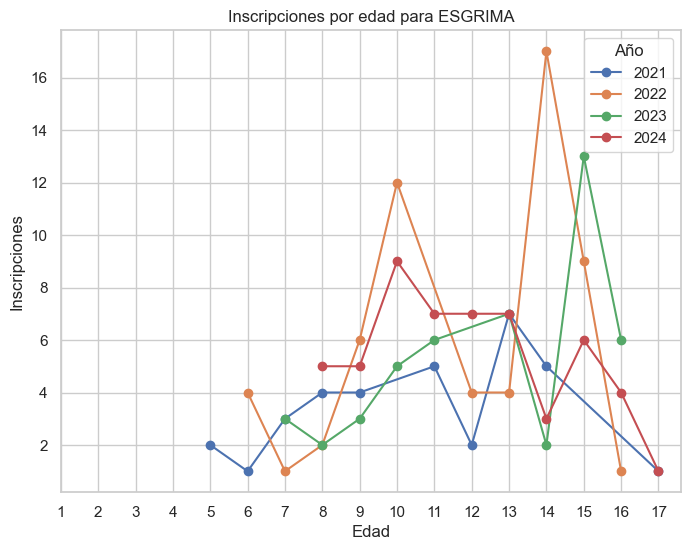

Tabla para ESGRIMA:
Año   2021  2022  2023  2024
Edad                        
5      2.0   0.0   0.0   0.0
6      1.0   4.0   0.0   0.0
7      3.0   1.0   3.0   0.0
8      4.0   2.0   2.0   5.0
9      4.0   6.0   3.0   5.0
10     0.0  12.0   5.0   9.0
11     5.0   0.0   6.0   7.0
12     2.0   4.0   0.0   7.0
13     7.0   4.0   7.0   7.0
14     5.0  17.0   2.0   3.0
15     0.0   9.0  13.0   6.0
16     0.0   1.0   6.0   4.0
17     1.0   0.0   0.0   1.0




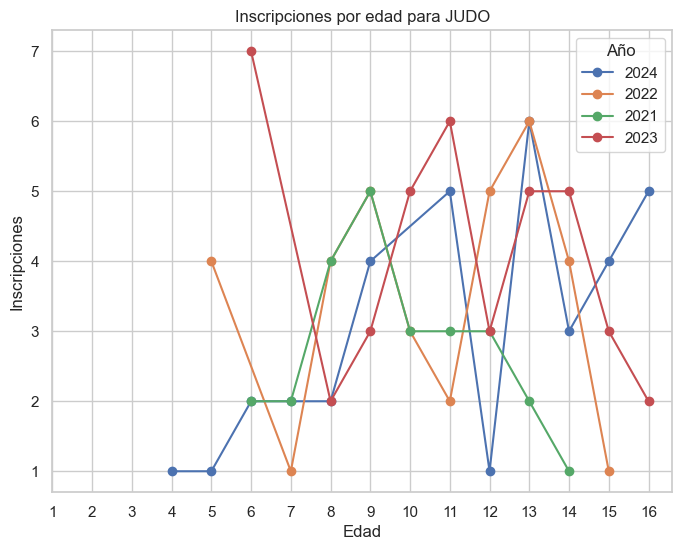

Tabla para JUDO:
Año   2021  2022  2023  2024
Edad                        
4      0.0   0.0   0.0   1.0
5      0.0   4.0   0.0   1.0
6      2.0   0.0   7.0   2.0
7      2.0   1.0   0.0   2.0
8      4.0   4.0   2.0   2.0
9      5.0   5.0   3.0   4.0
10     3.0   3.0   5.0   0.0
11     3.0   2.0   6.0   5.0
12     3.0   5.0   3.0   1.0
13     2.0   6.0   5.0   6.0
14     1.0   4.0   5.0   3.0
15     0.0   1.0   3.0   4.0
16     0.0   0.0   2.0   5.0




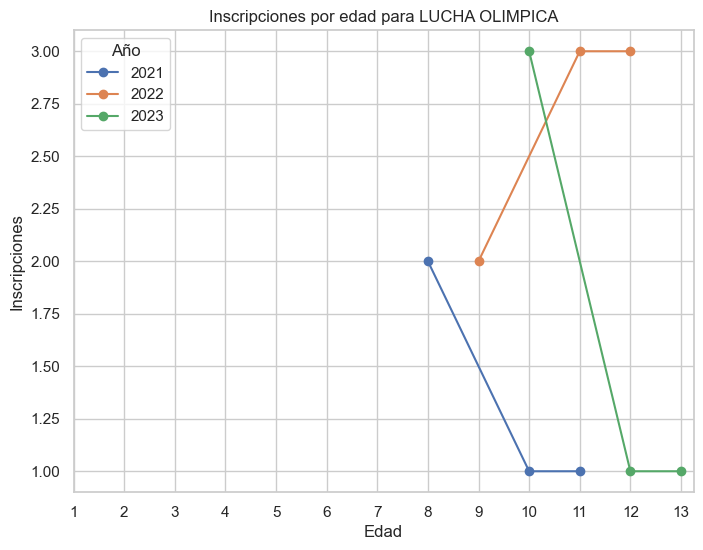

Tabla para LUCHA OLIMPICA:
Año   2021  2022  2023
Edad                  
8      2.0   0.0   0.0
9      0.0   2.0   0.0
10     1.0   0.0   3.0
11     1.0   3.0   0.0
12     0.0   3.0   1.0
13     0.0   0.0   1.0




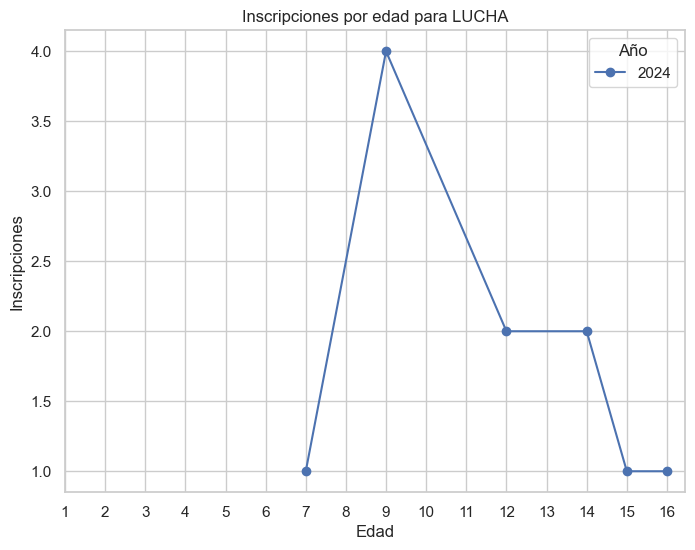

Tabla para LUCHA:
Año   2024
Edad      
7      1.0
9      4.0
12     2.0
14     2.0
15     1.0
16     1.0




In [232]:
# Obtener la lista de disciplinas deportivas únicas
disciplinas_deportivas = df['Deporte'].unique()

# Crear un gráfico individual por cada disciplina deportiva y una tabla correspondiente
for deporte in disciplinas_deportivas:
    # Filtrar el DataFrame por la disciplina deportiva actual
    datos_deporte = df[df['Deporte'] == deporte]
    
    # Agrupar por edad y año y contar el número de inscripciones en cada grupo
    inscripciones_por_edad_y_anio = datos_deporte.groupby(['Edad', 'Año']).size().reset_index(name='Inscripciones')
    
    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    for anio in inscripciones_por_edad_y_anio['Año'].unique():
        datos_anio = inscripciones_por_edad_y_anio[inscripciones_por_edad_y_anio['Año'] == anio]
        plt.plot(datos_anio['Edad'], datos_anio['Inscripciones'], marker='o', label=anio)
    
    # Configurar el gráfico
    plt.xticks(range(1, max(inscripciones_por_edad_y_anio['Edad']) + 1))
    plt.xlabel('Edad')
    plt.ylabel('Inscripciones')
    plt.title(f'Inscripciones por edad para {deporte}')
    plt.legend(title='Año')
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()
    
    # Crear la tabla correspondiente
    tabla = pd.pivot_table(inscripciones_por_edad_y_anio, values='Inscripciones', index='Edad', columns='Año', fill_value=0)
    print(f'Tabla para {deporte}:')
    print(tabla)
    print('\n')


In [233]:
# Obtener la lista de disciplinas deportivas únicas
disciplinas_deportivas = df['Deporte'].unique()

# Crear arrays por deporte
arrays_por_deporte = {}

for deporte in disciplinas_deportivas:
    # Filtrar el DataFrame por la disciplina deportiva actual
    datos_deporte = df[df['Deporte'] == deporte]
    
    # Agrupar por edad y año y contar el número de inscripciones en cada grupo
    inscripciones_por_edad_y_anio = datos_deporte.groupby(['Edad', 'Año']).size().reset_index(name='Inscripciones')
    
    # Crear la tabla correspondiente
    tabla = pd.pivot_table(inscripciones_por_edad_y_anio, values='Inscripciones', index='Edad', columns='Año', fill_value=0)
    
    # Convertir la tabla a un array de numpy
    array_deporte = tabla.to_numpy()
    
    # Agregar el array al diccionario
    arrays_por_deporte[deporte] = array_deporte

# Mostrar los arrays por deporte
for deporte, array in arrays_por_deporte.items():
    print(f'Array para {deporte}:')
    print(array)
    print('\n')


Array para NATACION:
[[  0.   0.   0.   4.]
 [ 86.  86.  57.  36.]
 [ 75. 105. 110.  77.]
 [ 87. 107. 118.  60.]
 [ 91. 103. 109.  84.]
 [102. 112. 132.  81.]
 [ 85. 116. 133.  79.]
 [ 82. 118. 144.  80.]
 [ 75. 107. 119.  57.]
 [ 42.  87. 116.  72.]
 [ 41.  49. 104.  76.]
 [ 21.  56.  65.  52.]
 [ 10.  19.  76.  65.]
 [  2.   9.  27.  23.]]


Array para WUSHU:
[[1. 0. 0. 2.]
 [0. 1. 0. 2.]
 [0. 0. 2. 1.]
 [0. 0. 0. 3.]
 [0. 0. 0. 4.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 2. 0.]
 [0. 1. 0. 1.]
 [0. 0. 2. 3.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


Array para GIMNASIA ARTISTICA:
[[ 0.  0.  0.  3.]
 [21. 26. 29. 21.]
 [29. 33. 24. 28.]
 [23. 42. 30. 38.]
 [18. 34. 39. 32.]
 [23. 26. 32. 29.]
 [ 5. 30. 23. 28.]
 [ 6.  4. 35. 20.]
 [12.  7.  6. 25.]
 [ 5. 15.  9. 15.]
 [ 5. 12. 16. 10.]
 [ 1.  7.  9. 16.]
 [ 0.  1.  9.  9.]
 [ 0.  0.  1.  0.]]


Array para BALONCESTO:
[[ 9.  0.  0.  0.]
 [17. 11.  0.  4.]
 [20. 20. 14.  5.]
 [24. 39. 29. 16.]
 [33. 32. 32. 25.]
 [46. 45. 36. 27.]
 [30. 64. 51. 42

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   N.                        13936 non-null  int64         
 1   Deportista                13936 non-null  object        
 2   Edad                      13936 non-null  int64         
 3   Deporte                   13936 non-null  object        
 4   Centro                    13936 non-null  object        
 5   Seleccione Forma de Pago  13936 non-null  object        
 6   Tipo de Banco             8534 non-null   object        
 7   Precio del curso          13936 non-null  int64         
 8   Valor pagado              13936 non-null  float64       
 9   Modo de Inscripción       13936 non-null  object        
 10  Fecha de creación         13936 non-null  datetime64[ns]
 11  Porcentaje                0 non-null      float64       
 12  Mes               

In [235]:

# Supongamos que tienes un DataFrame llamado df con tus datos

# Convertir Fecha de creación a formato de fecha
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'])

# Crear una tabla pivote para contar la cantidad de registros por año y por deporte
matriz = df.pivot_table(index='Año', columns='Deporte', values='N.', aggfunc='count')

# Rellenar los valores NaN con 0
matriz = matriz.fillna(0)

# Guardar la matriz como un archivo CSV
matriz.to_csv('matriz_inscripciones_por_año_y_deporte.csv')

# Mostrar la matriz
print(matriz)

Deporte  AJEDREZ  ATLETISMO  BALONCESTO  BOXEO  CICLISMO  ECUAVOLEY  ESCALADA  \
Año                                                                             
2021       104.0       74.0       277.0   92.0      16.0       78.0     119.0   
2022       170.0      122.0       430.0  158.0      15.0       94.0     141.0   
2023       145.0      108.0       425.0  122.0      19.0      111.0     153.0   
2024       129.0      178.0       388.0   98.0      42.0       91.0     147.0   

Deporte  ESGRIMA  FUTBOL  GIMNASIA ARTISTICA  ...  LUCHA  LUCHA OLIMPICA  \
Año                                           ...                          
2021        34.0   172.0               148.0  ...    0.0             4.0   
2022        60.0   257.0               237.0  ...    0.0             8.0   
2023        47.0   268.0               262.0  ...    0.0             5.0   
2024        54.0   230.0               274.0  ...   11.0             0.0   

Deporte  NATACION  PATINAJE  SQUASH  TAE KWON DO  TENIS 

In [236]:
df.groupby(['Deporte'])['Valor pagado'].mean().sort_values(ascending=False ).head(15)


Deporte
NATACION              76.617225
VOLEIBOL              63.975962
BALONCESTO            63.443487
ESCALADA              63.058214
GIMNASIA ARTISTICA    62.766992
GIMNASIA RITMICA      62.755118
FUTBOL                62.269903
SQUASH                44.831683
CICLISMO              43.250000
ECUAVOLEY             43.226738
ESGRIMA               40.424615
PATINAJE              39.773109
TIRO OLIMPICO         39.123134
AJEDREZ               38.575547
TAE KWON DO           38.473029
Name: Valor pagado, dtype: float64

In [237]:
df.describe()

N.          Edad  Precio del curso  Valor pagado  \
count  13936.000000  13936.000000      13936.000000  13936.000000   
mean    6968.500000     10.747632         61.649971     59.179714   
min        1.000000      4.000000         25.000000      0.000000   
25%     3484.750000      8.000000         45.000000     40.500000   
50%     6968.500000     11.000000         65.000000     65.000000   
75%    10452.250000     13.000000         80.000000     72.000000   
max    13936.000000     17.000000         82.000000     82.000000   
std     4023.121011      3.238708         17.431209     17.625139   

                   Fecha de creación  Porcentaje           Mes           Año  \
count                          13936         0.0  13936.000000  13936.000000   
mean   2023-02-17 22:36:11.986222592         NaN      6.744690   2022.611079   
min              2021-06-06 00:00:00         NaN      2.000000   2021.000000   
25%              2022-06-30 00:00:00         NaN      6.000000   2022.000000   
50%              2023-06-23 00:00:00         NaN      7.000000   2023.000000   
75%              2024-06-12 00:00:00         NaN      7.000000   2024.000000   
max              2024-08-19 00:00:00         NaN      8.000000   2024.000000   
std                              NaN         NaN      0.548188      1.056225   

       centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  \
count    13936.000000     13936.000000  13936.000000         13936.000000   
mean        11.215916        11.496843      1.590987             0.631889   
min          0.000000         0.000000      0.000000             0.000000   
25%          4.000000         5.000000      1.000000             0.000000   
50%         14.000000        12.000000      2.000000             1.000000   
75%         16.000000        16.000000      2.000000             1.000000   
max         21.000000        23.000000      2.000000             1.000000   
std          6.513012         6.968317      0.531237             0.482309   

                Día  
count  13936.000000  
mean      17.251005  
min        1.000000  
25%       10.000000  
50%       19.000000  
75%       25.000000  
max       31.000000  
std        9.087274

In [238]:
df.sort_values(by='Valor pagado', ascending=True).head(10)


N.                       Deportista  Edad             Deporte  \
4556  10562                ZOE ISABELA SINGO     5  GIMNASIA ARTISTICA   
4600  12037    FERGIE ALEJANDRA BRUNIS ESPIN    16              FUTBOL   
4601  12212               JULIAN CHUQUITARCO     8              FUTBOL   
4599  12036                   JULIAN SANCHEZ     8              FUTBOL   
4598  11986           ZOE TIARE JOUVE ACOSTA    14               WUSHU   
4839  12902   MATEO JULIAN CARDENAS BASANTES    12       TIRO OLIMPICO   
5010  13082  MATIAS GABRIEL CORONEL BALAREZO     5         TAE KWON DO   
5036  13108             PAULA RODRIGUEZ MUSO     7            NATACION   
4993  13065    CARLOS MARTIN SAMANIEGO VIERA    13              FUTBOL   
4994  13066    LEONARDO BENJAMIN SILVA VIERA     7       TENIS DE MESA   

        Centro Seleccione Forma de Pago Tipo de Banco  Precio del curso  \
4556  01.01.40                 Efectivo           NaN                67   
4600  01.01.19                 Efectivo           NaN                67   
4601  01.01.19                 Efectivo           NaN                67   
4599  01.01.19                 Efectivo           NaN                67   
4598  01.01.39                 Efectivo           NaN                30   
4839  01.01.35                 Efectivo          NULL                45   
5010  01.01.31                 Efectivo          NULL                40   
5036  01.01.27                 Efectivo           NaN                82   
4993  01.01.19                 Efectivo          NULL                67   
4994  01.01.33                 Efectivo          NULL                30   

      Valor pagado     Modo de Inscripción Fecha de creación  Porcentaje  Mes  \
4556           0.0  Inscripción Presencial        2024-06-12         NaN    6   
4600           0.0  Inscripción Presencial        2024-07-12         NaN    7   
4601           0.0  Inscripción Presencial        2024-07-15         NaN    7   
4599           0.0  Inscripción Presencial        2024-07-12         NaN    7   
4598           0.0  Inscripción Presencial        2024-07-12         NaN    7   
4839           0.0  Inscripción Presencial        2024-07-31         NaN    7   
5010           0.0  Inscripción Presencial        2024-07-31         NaN    7   
5036           0.0  Inscripción Presencial        2024-07-31         NaN    7   
4993           0.0  Inscripción Presencial        2024-07-31         NaN    7   
4994           0.0      Inscripción Online        2024-07-31         NaN    7   

       Año  centro_encoded  deporte_encoded  pago_encoded  \
4556  2024              21                9             1   
4600  2024               7                8             1   
4601  2024               7                8             1   
4599  2024               7                8             1   
4598  2024              20               23             1   
4839  2024              18               21             1   
5010  2024              16               19             1   
5036  2024              14               16             1   
4993  2024               7                8             1   
4994  2024              17               20             1   

      inscripcion_encoded  Día  
4556                    1   12  
4600                    1   12  
4601                    1   15  
4599                    1   12  
4598                    1   12  
4839                    1   31  
5010                    1   31  
5036                    1   31  
4993                    1   31  
4994                    0   31

In [239]:
df_conj1=df

In [240]:
df.columns

Index(['N.', 'Deportista', 'Edad', 'Deporte', 'Centro',
       'Seleccione Forma de Pago', 'Tipo de Banco', 'Precio del curso',
       'Valor pagado', 'Modo de Inscripción', 'Fecha de creación',
       'Porcentaje', 'Mes', 'Año', 'centro_encoded', 'deporte_encoded',
       'pago_encoded', 'inscripcion_encoded', 'Día'],
      dtype='object')

In [246]:
df.head()

N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  Mes   Año  \
0          82.0  Inscripción Online        2021-06-06         NaN    6  2021   
1          30.0  Inscripción Online        2021-06-10         NaN    6  2021   
2          80.0  Inscripción Online        2021-06-10         NaN    6  2021   
3          65.0  Inscripción Online        2021-06-11         NaN    6  2021   
4          65.0  Inscripción Online        2021-06-11         NaN    6  2021   

   centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  Día  
0              14               16             2                    0    6  
1              20               23             2                    0   10  
2              14               16             2                    0   10  
3              21                9             2                    0   11  
4               3                2             2                    0   11

# Modelos con subconjunto de datos 1

In [247]:
# Subconjunto de datos 1
subset_1 = df[['N.', 'Edad', 'deporte_encoded', 'centro_encoded', 'pago_encoded', 'Valor pagado' ]]

In [248]:

X = subset_1.drop('Valor pagado', axis=1)  # Excluimos la variable 'FormaDePago_encoded' como predictor
y = subset_1['Valor pagado']  # Definimos 'Seleccione Forma de Pago' como la variable a predecir
X.head()
X.describe()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   N.               13936 non-null  int64
 1   Edad             13936 non-null  int64
 2   deporte_encoded  13936 non-null  int64
 3   centro_encoded   13936 non-null  int64
 4   pago_encoded     13936 non-null  int64
dtypes: int64(5)
memory usage: 544.5 KB


In [249]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)


Generar un modelo y evaluarlo.

LinearRegression

In [250]:
linear_regressor = LinearRegression()

In [251]:
linear_regressor.fit(X_train,y_train)


LinearRegression()

In [252]:
y_linear_train_pred= linear_regressor.predict(X_train)
y_linear_test_pred=linear_regressor.predict(X_test)

In [253]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, metrics.r2_score
import numpy as np

In [254]:

linear_MAE_train = mean_absolute_error(y_train, y_linear_train_pred)
linear_MAE_test = mean_absolute_error(y_test, y_linear_test_pred)

linear_RMSE_train = np.sqrt(mean_squared_error(y_train, y_linear_train_pred))
linear_RMSE_test = np.sqrt(mean_squared_error(y_test, y_linear_test_pred))

linear_MAPE_train = mean_absolute_percentage_error(y_train, y_linear_train_pred)
linear_MAPE_test = mean_absolute_percentage_error(y_test, y_linear_test_pred)

linear_r2_train = metrics.r2_score(y_train, y_linear_train_pred)
linear_r2_test = metrics.r2_score(y_test, y_linear_test_pred)

linear_adj_r2_train = 1 - ((1 - linear_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
linear_adj_r2_test = 1 - ((1 - linear_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

print("El MAE en train es:", linear_MAE_train)
print("El MAE en test es:", linear_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:", linear_RMSE_train)
print("El RMSE en test es:", linear_RMSE_test)
print("-------------------------------------------")
print("El MAPE en train es:", linear_MAPE_train)
print("El MAPE en test es:", linear_MAPE_test)
print("-------------------------------------------")
print("El r2 de train es:", linear_r2_train)
print("El r2 de test es:", linear_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:", linear_adj_r2_train)
print("El r2 ajustado de test es:", linear_adj_r2_test)

El MAE en train es: 13.929813546658556
El MAE en test es: 13.843063267395973
-------------------------------------------
El RMSE en train es: 16.509254788074156
El RMSE en test es: 16.461697690583875
-------------------------------------------
El MAPE en train es: 378466949840949.56
El MAPE en test es: 302807191881286.6
-------------------------------------------
El r2 de train es: 0.12352245572327081
El r2 de test es: 0.12372116599206318
-------------------------------------------
El r2 ajustado de train es: 0.12312913426200855
El r2 ajustado de test es: 0.12214625795107115


# Arbol de decision

In [255]:
arbol_regressor = DecisionTreeRegressor(random_state=42)


In [256]:
arbol_regressor.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

In [257]:
y_arbol_pred_train = arbol_regressor.predict(X_train)
y_arbol_pred_test = arbol_regressor.predict(X_test)

In [ ]:
arbol_MAE_train=mean_absolute_error(y_train,y_arbol_pred_train)
arbol_MAE_test=mean_absolute_error(y_test,y_arbol_pred_test)

arbol_RMSE_train=np.sqrt(mean_squared_error(y_train,y_arbol_pred_train))
arbol_RMSE_test=np.sqrt(mean_squared_error(y_test,y_arbol_pred_test))

arbol_MAPE_train=mean_absolute_percentage_error(y_train,y_arbol_pred_train)
arbol_MAPE_test=mean_absolute_percentage_error(y_test,y_arbol_pred_test)

arbol_r2_train= metrics.r2_score(y_train, y_arbol_pred_train)
arbol_r2_test= metrics.r2_score(y_test, y_arbol_pred_test)

arbol_adj_r2_train = 1 - ((1 - arbol_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
arbol_adj_r2_test = 1 - ((1 - arbol_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",arbol_MAE_train)
print("El MAE en test es:",arbol_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",arbol_RMSE_train)
print("El RMSE en test es:",arbol_RMSE_test)
print("-------------------------------------------")
print("El MAPE en train es:",arbol_MAPE_train)
print("El MAPE en test es:",arbol_MAPE_test)
print("-------------------------------------------")
print("El r2 de train es:",arbol_r2_train)
print("El r2 de test es:",arbol_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",arbol_adj_r2_train)
print("El r2 ajustado de test es:",arbol_adj_r2_test)

El MAE en train es: 9.560585787945375e-18
El MAE en test es: 3.0579626972740312
-------------------------------------------
El RMSE en train es: 2.6063777126955023e-16
El RMSE en test es: 8.083374279454734
-------------------------------------------
El MAPE en train es: 1.58550344742046e-19
El MAPE en test es: 258940825060075.53
-------------------------------------------
El r2 de train es: 1.0
El r2 de test es: 0.7887102378453599
-------------------------------------------
El r2 ajustado de train es: 1.0
El r2 ajustado de test es: 0.7883304934849094


# KNN Vecinos mas cercanos


In [259]:
knn_regressor = KNeighborsRegressor()


In [260]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [265]:
y_knn_pred_train = knn_regressor.predict(X_train)
y_knn_pred_test = knn_regressor.predict(X_test)

In [266]:
knn_MAE_train=mean_absolute_error(y_train,y_knn_pred_train)
knn_MAE_test=mean_absolute_error(y_test,y_knn_pred_test)

knn_RMSE_train=np.sqrt(mean_squared_error(y_train,y_knn_pred_train))
knn_RMSE_test=np.sqrt(mean_squared_error(y_test,y_knn_pred_test))

knn_MAPE_train=mean_absolute_percentage_error(y_train,y_knn_pred_train)
knn_MAPE_test=mean_absolute_percentage_error(y_test,y_knn_pred_test)

knn_r2_train= metrics.r2_score(y_train, y_knn_pred_train)
knn_r2_test= metrics.r2_score(y_test, y_knn_pred_test)

knn_adj_r2_train = 1 - ((1 - knn_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
knn_adj_r2_test = 1 - ((1 - knn_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",knn_MAE_train)
print("El MAE en test es:",knn_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",knn_RMSE_train)
print("El RMSE en test es:",knn_RMSE_test)
print("-------------------------------------------")
print("El MAPE en train es:",knn_MAPE_train)
print("El MAPE en test es:",knn_MAPE_test)
print("-------------------------------------------")
print("El r2 de train es:",knn_r2_train)
print("El r2 de test es:",knn_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",knn_adj_r2_train)
print("El r2 ajustado de test es:",knn_adj_r2_test)

El MAE en train es: 10.772938643702906
El MAE en test es: 13.664045911047346
-------------------------------------------
El RMSE en train es: 14.074251818929772
El RMSE en test es: 17.45986301901463
-------------------------------------------
El MAPE en train es: 282892956141233.06
El MAPE en test es: 302135320768787.1
-------------------------------------------
El r2 de train es: 0.36300431844462755
El r2 de test es: 0.014231940394167975
-------------------------------------------
El r2 ajustado de train es: 0.362718465060336
El r2 ajustado de test es: 0.012460250854976929


# XG Boost Regressor


In [267]:
%pip install -U xgboost scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [268]:
xgboost_regressor =xgboost.XGBRegressor()


In [269]:
xgboost_regressor.fit(X_train,y_train)


C:\Users\Chollo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [270]:
y_xgb_train_pred= xgboost_regressor.predict(X_train)
y_xgb_test_pred=xgboost_regressor.predict(X_test)

In [272]:
xgb_MAE_train=mean_absolute_error(y_train,y_xgb_train_pred)
xgb_MAE_test=mean_absolute_error(y_test,y_xgb_test_pred)

xgb_RMSE_train=np.sqrt(mean_squared_error(y_train,y_xgb_train_pred))
xgb_RMSE_test=np.sqrt(mean_squared_error(y_test,y_xgb_test_pred))

xgb_MAPE_train=mean_absolute_percentage_error(y_train,y_xgb_train_pred)
xgb_MAPE_test=mean_absolute_percentage_error(y_test,y_xgb_test_pred)

xgb_r2_train= metrics.r2_score(y_train, y_xgb_train_pred)
xgb_r2_test= metrics.r2_score(y_test, y_xgb_test_pred)

xgb_adj_r2_train = 1 - ((1 - xgb_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
xgb_adj_r2_test = 1 - ((1 - xgb_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",xgb_MAE_train)
print("El MAE en test es:",xgb_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",xgb_RMSE_train)
print("El RMSE en test es:",xgb_RMSE_test)
print("-------------------------------------------")
print("El RMSE en train es:",xgb_MAPE_train)
print("El RMSE en test es:",xgb_MAPE_test)
print("-------------------------------------------")
print("El r2 de train es:",xgb_r2_train)
print("El r2 de test es:",xgb_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",xgb_adj_r2_train)
print("El r2 ajustado de test es:",xgb_adj_r2_test)

El MAE en train es: 2.628935546236822
El MAE en test es: 3.247773289851513
-------------------------------------------
El RMSE en train es: 4.668382125749277
El RMSE en test es: 5.793502155961973
-------------------------------------------
El RMSE en train es: 142375877563310.12
El RMSE en test es: 254270844882162.47
-------------------------------------------
El r2 de train es: 0.9299160374688065
El r2 de test es: 0.8914635971858399
-------------------------------------------
El r2 ajustado de train es: 0.9298845871176437
El r2 ajustado de test es: 0.891268528165685


# Random Forest


In [273]:
from sklearn.ensemble import RandomForestRegressor


In [274]:
randomforest_regressor = RandomForestRegressor()

In [275]:
randomforest_regressor.fit(X_train,y_train)


RandomForestRegressor()

In [276]:
y_rf_train_pred= randomforest_regressor.predict(X_train)
y_rf_test_pred=randomforest_regressor.predict(X_test)

In [ ]:
rf_MAE_train=mean_absolute_error(y_train,y_rf_train_pred)
rf_MAE_test=mean_absolute_error(y_test,y_rf_test_pred)

rf_RMSE_train=np.sqrt(mean_squared_error(y_train,y_rf_train_pred))
rf_RMSE_test=np.sqrt(mean_squared_error(y_test,y_rf_test_pred))

rf_MAPE_train=mean_absolute_percentage_error(y_train,y_rf_train_pred)
rf_MAPE_test=mean_absolute_percentage_error(y_test,y_rf_test_pred)

rf_r2_train= metrics.r2_score(y_train, y_rf_train_pred)
rf_r2_test= metrics.r2_score(y_test, y_rf_test_pred)

rf_adj_r2_train = 1 - ((1 - rf_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
rf_adj_r2_test = 1 - ((1 - rf_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",rf_MAE_train)
print("El MAE en test es:",rf_MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",rf_RMSE_train)
print("El RMSE en test es:",rf_RMSE_test)
print("-------------------------------------------")
print("El MAPE en train es:",rf_MAPE_train)
print("El MAPE en test es:",rf_MAPE_test)
print("-------------------------------------------")
print("El r2 de train es:",rf_r2_train)
print("El r2 de test es:",rf_r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",rf_adj_r2_train)
print("El r2 ajustado de test es:",rf_adj_r2_test)

El MAE en train es: 1.1553628453534286
El MAE en test es: 3.061143472022953
-------------------------------------------
El RMSE en train es: 2.3481836630338524
El RMSE en test es: 6.062541806508813
-------------------------------------------
El MAPE en train es: 105481106342421.84
El MAPE en test es: 246247393972601.66
-------------------------------------------
El r2 de train es: 0.9822683162033023
El r2 de test es: 0.8811490736973252
-------------------------------------------
El r2 ajustado de train es: 0.9822603590664343
El r2 ajustado de test es: 0.8809354667125971


# Grafico de Resultados Iniciales con subconjunto de datos 1


Modelo: Regresión lineal
--------------------------
MAE en train: 13.929813546658556
MAE en test: 13.843063267395973
--------------------------
RMSE en train: 16.509254788074156
RMSE en test: 16.461697690583875
--------------------------
MAPE en train: 378466949840949.56
MAPE en test: 302807191881286.6
--------------------------
R2 en Train: 0.12352245572327081
R2 en test: 0.12372116599206318
--------------------------
R2 ajustado en train: 0.12312913426200855
R2 ajustado en Test: 0.12214625795107115
--------------------------


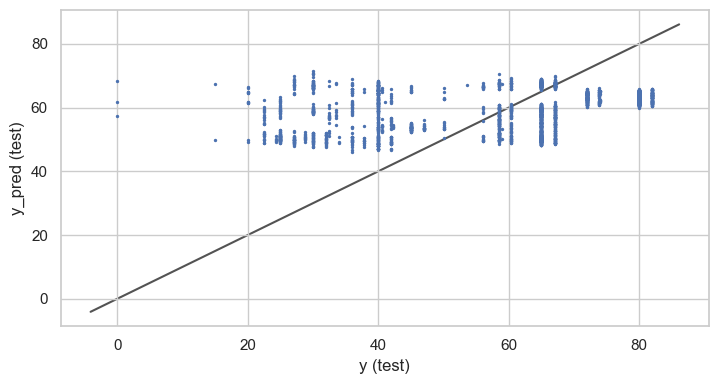

Modelo: Árbol de Decisión
--------------------------
MAE en train: 9.560585787945375e-18
MAE en test: 3.0579626972740312
--------------------------
RMSE en train: 2.6063777126955023e-16
RMSE en test: 8.083374279454734
--------------------------
MAPE en train: 1.58550344742046e-19
MAPE en test: 258940825060075.53
--------------------------
R2 en Train: 1.0
R2 en test: 0.7887102378453599
--------------------------
R2 ajustado en train: 1.0
R2 ajustado en Test: 0.7883304934849094
--------------------------


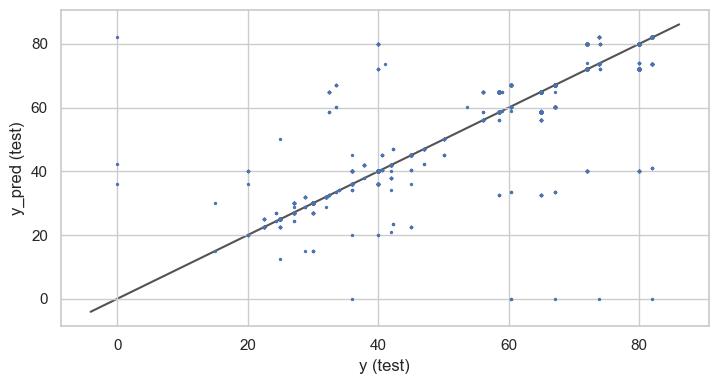

Modelo: Vecinos más cercanos
--------------------------
MAE en train: 10.772938643702906
MAE en test: 13.664045911047346
--------------------------
RMSE en train: 14.074251818929772
RMSE en test: 17.45986301901463
--------------------------
MAPE en train: 282892956141233.06
MAPE en test: 302135320768787.1
--------------------------
R2 en Train: 0.36300431844462755
R2 en test: 0.014231940394167975
--------------------------
R2 ajustado en train: 0.362718465060336
R2 ajustado en Test: 0.012460250854976929
--------------------------


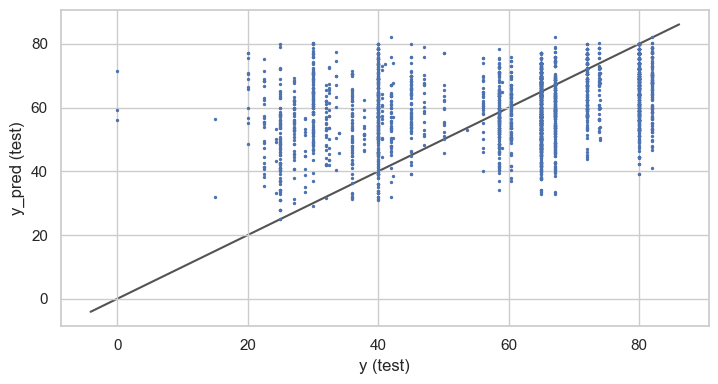

Modelo: Regresión XG Boosting
--------------------------
MAE en train: 2.628935546236822
MAE en test: 3.247773289851513
--------------------------
RMSE en train: 4.668382125749277
RMSE en test: 5.793502155961973
--------------------------
MAPE en train: 142375877563310.12
MAPE en test: 254270844882162.47
--------------------------
R2 en Train: 0.9299160374688065
R2 en test: 0.8914635971858399
--------------------------
R2 ajustado en train: 0.9298845871176437
R2 ajustado en Test: 0.891268528165685
--------------------------


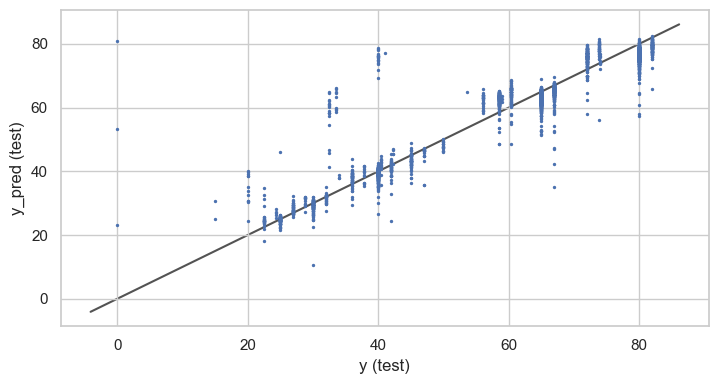

Modelo: Random Forest
--------------------------
MAE en train: 1.1553628453534286
MAE en test: 3.061143472022953
--------------------------
RMSE en train: 2.3481836630338524
RMSE en test: 6.062541806508813
--------------------------
MAPE en train: 105481106342421.84
MAPE en test: 246247393972601.66
--------------------------
R2 en Train: 0.9822683162033023
R2 en test: 0.8811490736973252
--------------------------
R2 ajustado en train: 0.9822603590664343
R2 ajustado en Test: 0.8809354667125971
--------------------------


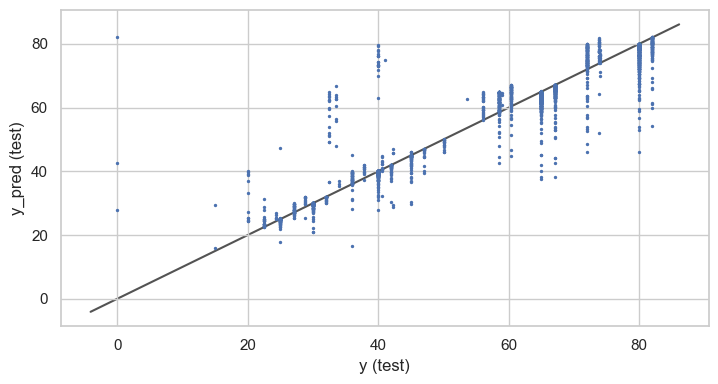

In [ ]:
models = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos', 'Regresión XG Boosting', 'Random Forest']

for i, model in enumerate([linear_regressor, arbol_regressor, knn_regressor, xgboost_regressor, randomforest_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')
    
    r2_train= metrics.metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    
    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    MAE_train=mean_absolute_error(y_train,y_train_pred)
    MAE_test=mean_absolute_error(y_test,y_test_pred)
    
    MAPE_train=mean_absolute_percentage_error(y_train,y_train_pred)
    MAPE_test=mean_absolute_percentage_error(y_test,y_test_pred)



   
    print("--------------------------")    
    print("MAE en train:",MAE_train)
    print("MAE en test:",MAE_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    print("--------------------------")
    print("MAPE en train:",MAPE_train)
    print("MAPE en test:",MAPE_test)
    print("--------------------------")
    print("R2 en Train:", r2_train)
    print("R2 en test:", r2_test)
    print("--------------------------")
    print("R2 ajustado en train:", adj_r2_train)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Ajuste de los Modelos con el Subconjunto de datos 1
Ajuste arbol decision


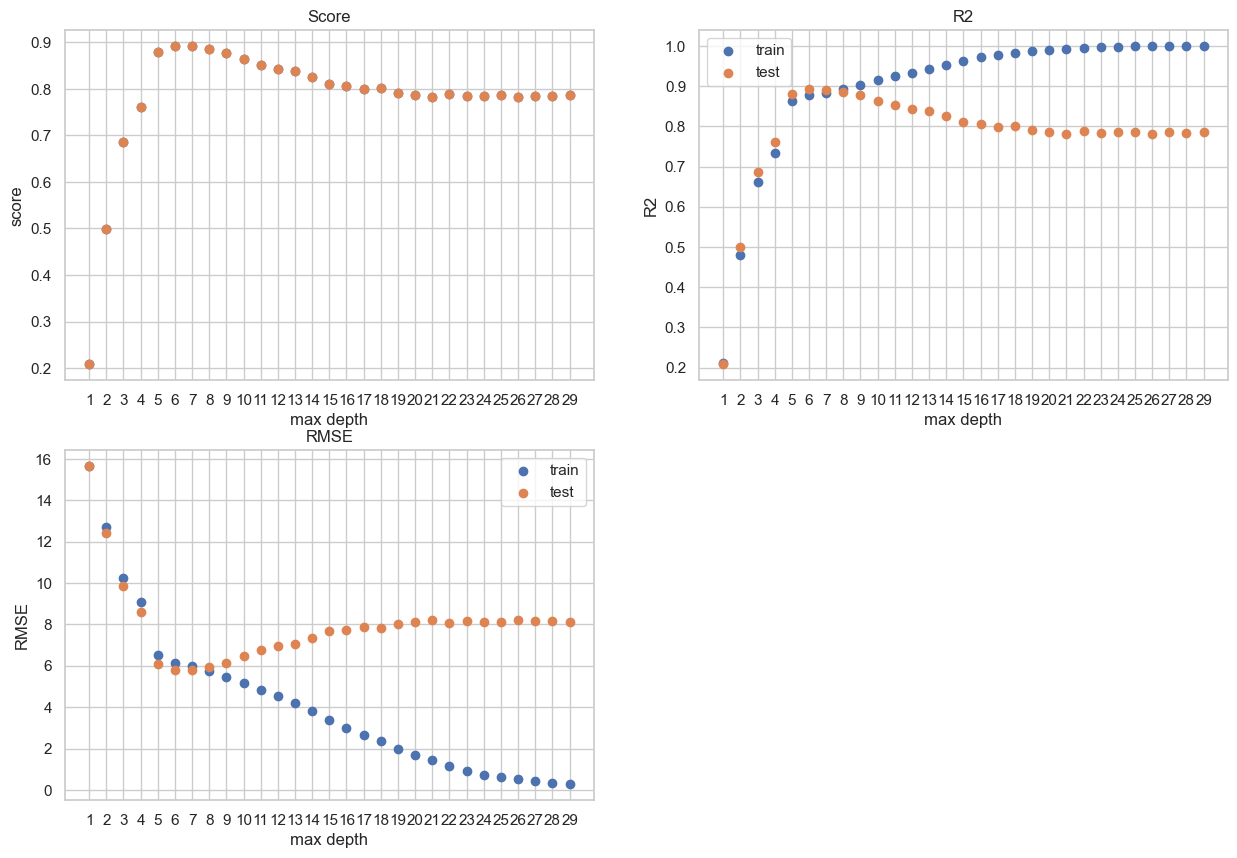

In [282]:
MAX_DEPTH_range = range(1, 30)
scores = []
arbol_r2_train_pred=[]
arbol_r2_test_pred=[]
arbol_rmse_train_pred=[]
arbol_rmse_test_pred=[]

for k in MAX_DEPTH_range:
    arbol_regressor = DecisionTreeRegressor(max_depth=k,random_state=42)
    arbol_regressor.fit(X_train, y_train)
    scores.append(arbol_regressor.score(X_test, y_test))
    
    y_train_pred = arbol_regressor.predict(X_train)
    y_test_pred = arbol_regressor.predict(X_test)
    
    arbol_r2_train = metrics.r2_score(y_train, y_train_pred)
    arbol_r2_train_pred.append(arbol_r2_train)
    arbol_r2_test = metrics.r2_score(y_test, y_test_pred)
    arbol_r2_test_pred.append(arbol_r2_test)
    
    arbol_rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    arbol_rmse_train_pred.append(arbol_rmse_train)
    
    arbol_rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    arbol_rmse_test_pred.append(arbol_rmse_test)
    
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.scatter(MAX_DEPTH_range,scores,marker="o")
ax1.scatter(MAX_DEPTH_range,scores,marker="o")

ax2.scatter(MAX_DEPTH_range,arbol_r2_train_pred,marker="o",label="train")
ax2.scatter(MAX_DEPTH_range,arbol_r2_test_pred,marker="o",label="test")

ax3.scatter(MAX_DEPTH_range,arbol_rmse_train_pred,marker="o",label="train")
ax3.scatter(MAX_DEPTH_range,arbol_rmse_test_pred,marker="o",label="test")

ax1.set_xticks(MAX_DEPTH_range)
ax2.set_xticks(MAX_DEPTH_range)
ax3.set_xticks(MAX_DEPTH_range)

ax2.legend()
ax3.legend()

ax1.set_title('Score')
ax1.set_xlabel('max depth')
ax1.set_ylabel('score')

ax2.set_title('R2')
ax2.set_xlabel('max depth')
ax2.set_ylabel('R2')

ax3.set_title('RMSE')
ax3.set_xlabel('max depth')
ax3.set_ylabel('RMSE')

plt.show()

La profundidad optima del arbol de decision se encuentra en 7, valor que es justificado al comparar con el grafico de R2



In [283]:
# Crear el DataFrame
results_df = pd.DataFrame({
    'max_depth': list(MAX_DEPTH_range),
    'score': scores,
    'r2_train': arbol_r2_train_pred,
    'r2_test': arbol_r2_test_pred,
    'RMSE_train': arbol_rmse_train_pred,
    'RMSE_test': arbol_rmse_test_pred
})

# Verificar la longitud de los arrays
print("Longitud de 'scores':", len(scores))
print("Longitud de 'arbol_r2_train_pred':", len(arbol_r2_train_pred))
print("Longitud de 'arbol_r2_test_pred':", len(arbol_r2_test_pred))
print("Longitud de 'arbol_rmse_train_pred':", len(arbol_rmse_train_pred))
print("Longitud de 'arbol_rmse_test_pred':", len(arbol_rmse_test_pred))

# Mostrar el DataFrame
print(results_df)


Longitud de 'scores': 29
Longitud de 'arbol_r2_train_pred': 29
Longitud de 'arbol_r2_test_pred': 29
Longitud de 'arbol_rmse_train_pred': 29
Longitud de 'arbol_rmse_test_pred': 29
    max_depth     score  r2_train   r2_test  RMSE_train  RMSE_test
0           1  0.208139  0.211327  0.208139   15.660497  15.648686
1           2  0.499251  0.478972  0.499251   12.728808  12.444102
2           3  0.686462  0.662804  0.686462   10.239967   9.846884
3           4  0.761140  0.733460  0.761140    9.104129   8.594593
4           5  0.879328  0.864062  0.879328    6.501715   6.108820
5           6  0.891979  0.878635  0.891979    6.143339   5.779724
6           7  0.891220  0.883956  0.891220    6.007136   5.800005
7           8  0.886343  0.893770  0.886343    5.747532   5.928599
8           9  0.877789  0.903600  0.877789    5.475138   6.147645
9          10  0.864198  0.914456  0.864198    5.157653   6.480460
10         11  0.852326  0.924639  0.852326    4.840940   6.757805
11         12  0.

In [284]:
arbol_optimo = DecisionTreeRegressor(max_depth= 7,random_state=42)
arbol_optimo.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

# Ajuste knn


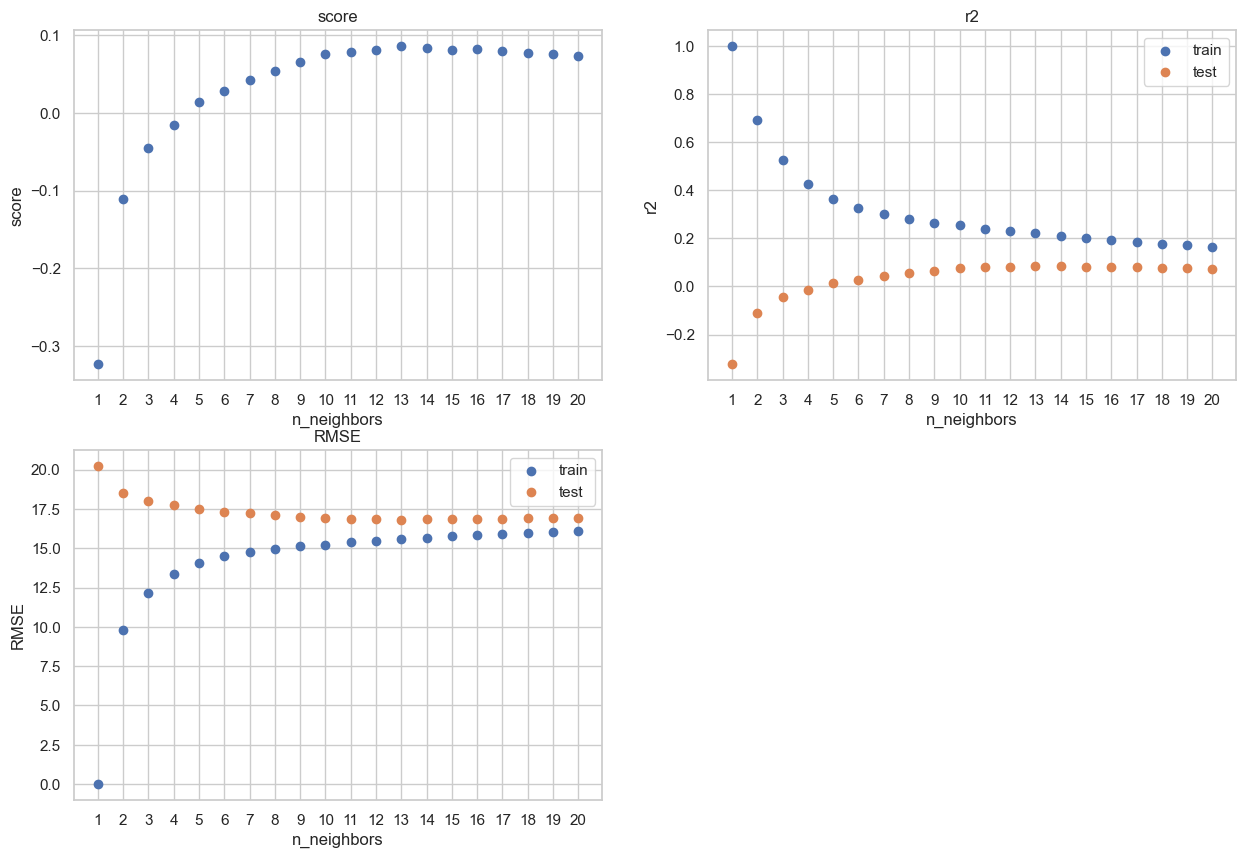

In [296]:
k_range = range(1, 21)
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]

for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(X_train, y_train)
    scores.append(knn_regressor.score(X_test, y_test))
    
    y_train_pred = knn_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = knn_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(k_range,scores,marker="o")
ax2.scatter(k_range,r2_train_pred,marker="o",label="train")
ax2.scatter(k_range,r2_train_test,marker="o",label="test")

ax3.scatter(k_range,rmse_train_pred,marker="o",label="train")
ax3.scatter(k_range,rmse_test_pred,marker="o",label="test")

ax1.set_xticks(k_range)
ax2.set_xticks(k_range)
ax3.set_xticks(k_range)


ax2.legend()
ax3.legend()


ax1.set_title('score')
ax1.set_xlabel('n_neighbors')
ax1.set_ylabel('score')

ax2.set_title('r2')
ax2.set_xlabel('n_neighbors')
ax2.set_ylabel('r2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_neighbors')
ax3.set_ylabel('RMSE')

plt.show()

El numero optimo de vecinos mas cercanos se encuentra en 3, donde encontramos una exactitud de 0.75, aunque el r2 en este caso se ve algo afectado si consideramos Train, aun asi en Test encontramos el punto mas alto en 3

In [297]:
knn_optimo = KNeighborsRegressor(n_neighbors=4)
knn_optimo.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [299]:
# Crear el DataFrame
results_df1 = pd.DataFrame({
    'n_neighbors': list(k_range),
    'score': scores,
    'r2_train': r2_train_pred,
    'r2_test': r2_train_test,
    'RMSE_train': rmse_train_pred,
    'RMSE_test': rmse_test_pred
})

# Mostrar el DataFrame
print(results_df)


    max_depth     score  r2_train   r2_test  RMSE_train  RMSE_test
0           1  0.208139  0.211327  0.208139   15.660497  15.648686
1           2  0.499251  0.478972  0.499251   12.728808  12.444102
2           3  0.686462  0.662804  0.686462   10.239967   9.846884
3           4  0.761140  0.733460  0.761140    9.104129   8.594593
4           5  0.879328  0.864062  0.879328    6.501715   6.108820
5           6  0.891979  0.878635  0.891979    6.143339   5.779724
6           7  0.891220  0.883956  0.891220    6.007136   5.800005
7           8  0.886343  0.893770  0.886343    5.747532   5.928599
8           9  0.877789  0.903600  0.877789    5.475138   6.147645
9          10  0.864198  0.914456  0.864198    5.157653   6.480460
10         11  0.852326  0.924639  0.852326    4.840940   6.757805
11         12  0.842793  0.933150  0.842793    4.559399   6.972523
12         13  0.839215  0.943449  0.839215    4.193498   7.051405
13         14  0.825546  0.953155  0.825546    3.816711   7.34

# Ajuste Random Forest


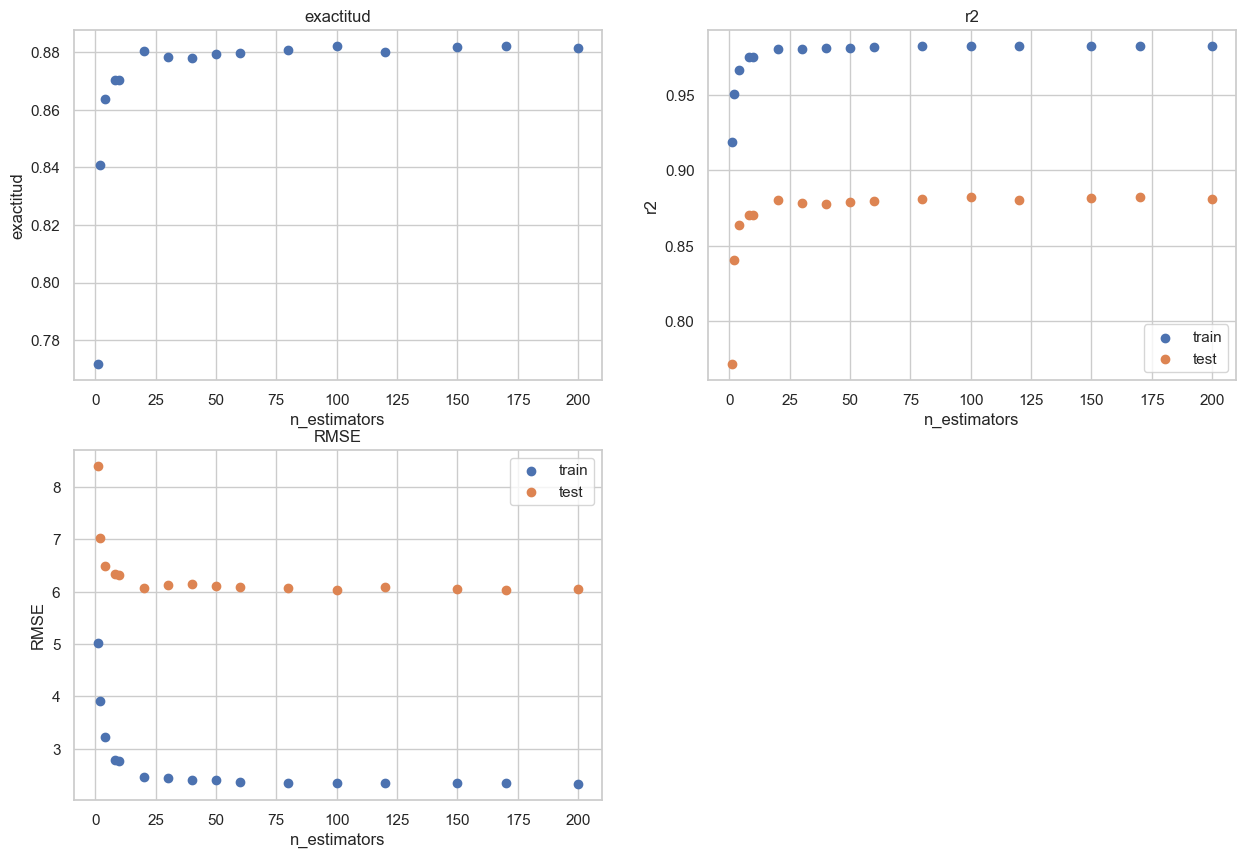

In [300]:
n_estimators = [1, 2, 4, 8, 10, 20, 30, 40, 50, 60,80, 100,120, 150, 170, 200]
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]


for k in n_estimators:
    rf_regressor = RandomForestRegressor(n_estimators=k)
    rf_regressor.fit(X_train, y_train)
    scores.append(rf_regressor.score(X_test, y_test))
    
    y_train_pred = rf_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = rf_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(n_estimators,scores,marker="o")
ax2.scatter(n_estimators,r2_train_pred,marker="o",label="train")
ax2.scatter(n_estimators,r2_train_test,marker="o",label="test")

ax3.scatter(n_estimators,rmse_train_pred,marker="o",label="train")
ax3.scatter(n_estimators,rmse_test_pred,marker="o",label="test")


ax2.legend()
ax3.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('exactitud')

ax2.set_title('r2')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('r2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('RMSE')

plt.show()

Profundidad maxima



In [290]:
randomforest_optimo = RandomForestRegressor(n_estimators = 100)
randomforest_optimo.fit(X_train,y_train)

RandomForestRegressor()

Profundidad maxima



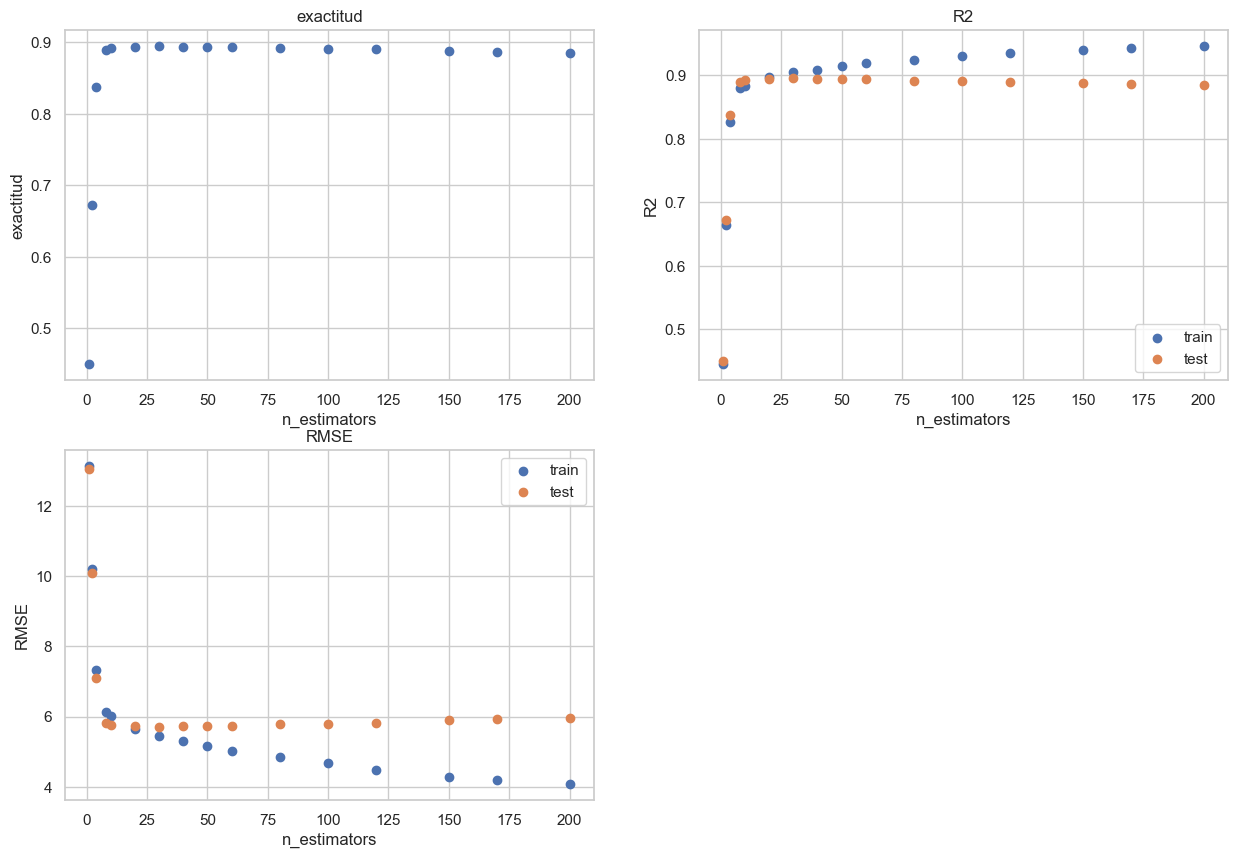

In [291]:
n_estimators = [1, 2, 4, 8, 10, 20, 30, 40, 50, 60,80, 100,120, 150, 170, 200]
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]


for k in n_estimators:
    xgb_regressor = xgboost.XGBRegressor(n_estimators=k)
    xgb_regressor.fit(X_train, y_train)
    scores.append(xgb_regressor.score(X_test, y_test))
    
    y_train_pred = xgb_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = xgb_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(n_estimators,scores,marker="o")
ax2.scatter(n_estimators,r2_train_pred,marker="o",label="train")
ax2.scatter(n_estimators,r2_train_test,marker="o",label="test")

ax3.scatter(n_estimators,rmse_train_pred,marker="o",label="train")
ax3.scatter(n_estimators,rmse_test_pred,marker="o",label="test")

ax2.legend()
ax3.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('exactitud')

ax2.set_title('R2')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('R2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('RMSE')

plt.show()

In [292]:
xgboost_regressor_optimo =xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgboost_regressor_optimo.fit(X_train,y_train)

C:\Users\Chollo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

# Resultados ajustados de los modelos con el subconjunto de datos 1     

Modelo: Regresion Lineal
MAE en train: 13.929813546658556
MAE en test: 13.843063267395973
--------------------------
RMSE en train: 16.509254788074156
RMSE en test: 16.461697690583875
--------------------------
MAPE en train: 378466949840949.56
MAPE en test: 302807191881286.6
--------------------------
R2 en Train: 0.12352245572327081
R2 en test: 0.12372116599206318
--------------------------
R2 ajustado en train: 0.12312913426200855
R2 ajustado en Test: 0.12214625795107115


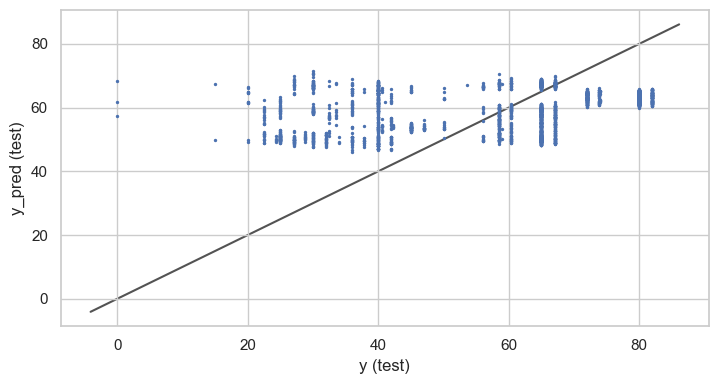

Modelo: Árbol de Decisión optimo
MAE en train: 3.3525347922472495
MAE en test: 3.352114391620523
--------------------------
RMSE en train: 6.00713640852931
RMSE en test: 5.800005204667118
--------------------------
MAPE en train: 303687896460943.5
MAPE en test: 229841970448922.94
--------------------------
R2 en Train: 0.8839564940374718
R2 en test: 0.8912198021115453
--------------------------
R2 ajustado en train: 0.8839044192277596
R2 ajustado en Test: 0.8910242949262677


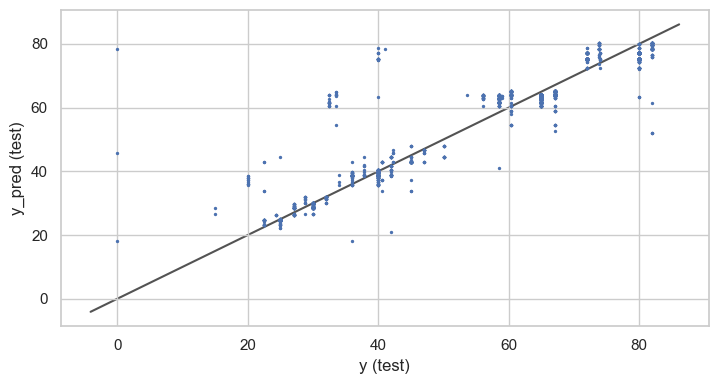

Modelo: Vecinos más cercanos optimo
MAE en train: 9.981341944743452
MAE en test: 13.610007173601147
--------------------------
RMSE en train: 13.368054278833174
RMSE en test: 17.721647377665988
--------------------------
MAPE en train: 252953795001618.1
MAPE en test: 317901150167329.5
--------------------------
R2 en Train: 0.4253250665936785
R2 en test: -0.015549880862147925
--------------------------
R2 ajustado en train: 0.42506717979893505
R2 ajustado en Test: -0.01737509632020373


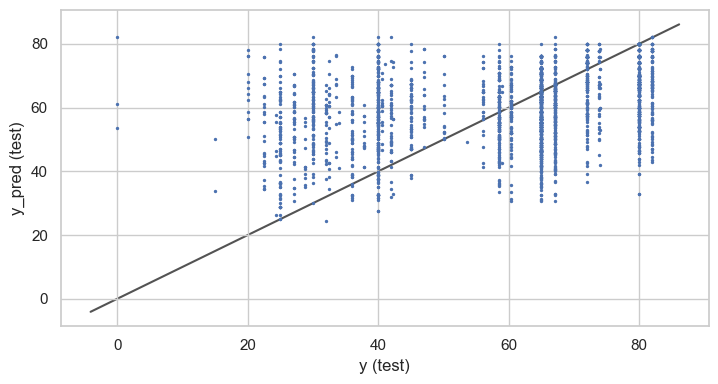

Modelo: Random Forest optimo
MAE en train: 1.159745425188377
MAE en test: 3.0600728120516485
--------------------------
RMSE en train: 2.354232961099514
RMSE en test: 6.059514876487949
--------------------------
MAPE en train: 110633098273517.66
MAPE en test: 249697784504905.6
--------------------------
R2 en Train: 0.9821768391973642
R2 en test: 0.881267724797391
--------------------------
R2 ajustado en train: 0.982168841009964
R2 ajustado en Test: 0.8810543310605063


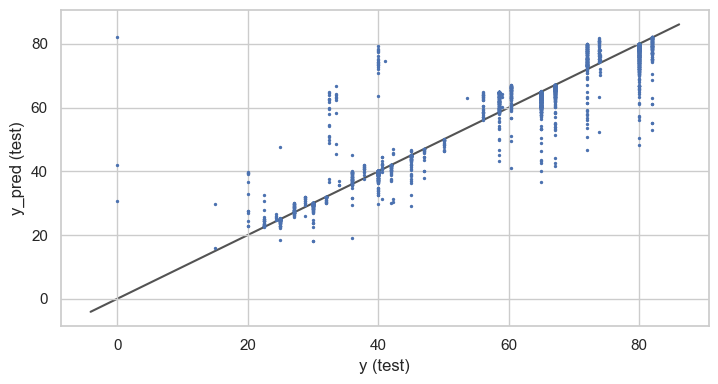

Modelo: XGB optimo
MAE en train: 2.3650927467492906
MAE en test: 3.222121765213341
--------------------------
RMSE en train: 4.25879062852763
RMSE en test: 5.815327828721142
--------------------------
MAPE en train: 131466981824558.31
MAPE en test: 242811243604635.03
--------------------------
R2 en Train: 0.9416745050250417
R2 en test: 0.8906442854642586
--------------------------
R2 ajustado en train: 0.9416483313152163
R2 ajustado en Test: 0.8904477439212396


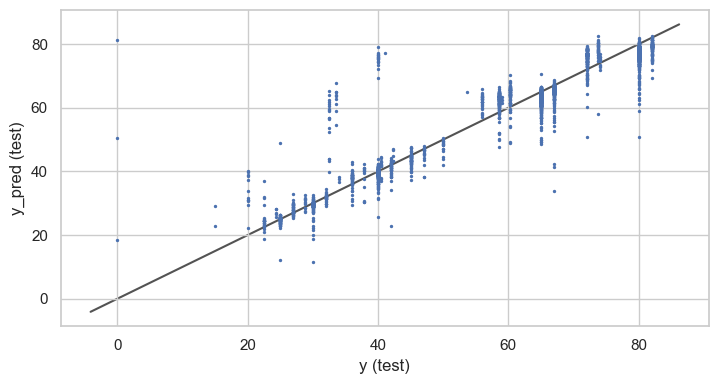

In [293]:
models2 = [ 'Regresion Lineal','Árbol de Decisión optimo', 'Vecinos más cercanos optimo',  'Random Forest optimo', 'XGB optimo']
for i, model in enumerate([linear_regressor, arbol_optimo, knn_optimo, randomforest_optimo,xgboost_regressor_optimo]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models2[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    
    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    MAE_train=mean_absolute_error(y_train,y_train_pred)
    MAE_test=mean_absolute_error(y_test,y_test_pred)
    
    MAPE_train=mean_absolute_percentage_error(y_train,y_train_pred)
    MAPE_test=mean_absolute_percentage_error(y_test,y_test_pred)

    
    print("MAE en train:",MAE_train)
    print("MAE en test:",MAE_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    print("--------------------------")
    print("MAPE en train:",MAPE_train)
    print("MAPE en test:",MAPE_test)
    print("--------------------------")   
    print("R2 en Train:", r2_train)
    print("R2 en test:", r2_test)
    print("--------------------------")
    print("R2 ajustado en train:", adj_r2_train)
    print("R2 ajustado en Test:", adj_r2_test)

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Modelos con subconjunto de datos 2
'N.', 'Edad', 'Deporte_encoded', 'centro_encoded', 'FormaDePago_encoded', 'Valor pagado' 



In [187]:
df.head()

N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  Mes   Año  \
0          82.0  Inscripción Online        2021-06-06         NaN    6  2021   
1          30.0  Inscripción Online        2021-06-10         NaN    6  2021   
2          80.0  Inscripción Online        2021-06-10         NaN    6  2021   
3          65.0  Inscripción Online        2021-06-11         NaN    6  2021   
4          65.0  Inscripción Online        2021-06-11         NaN    6  2021   

   centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  Día  
0              14               16             2                    0    6  
1              20               23             2                    0   10  
2              14               16             2                    0   10  
3              21                9             2                    0   11  
4               3                2             2                    0   11

In [189]:
df2=df[['N.', 'deporte_encoded', 'Precio del curso', 'Valor pagado', 'inscripcion_encoded', 'centro_encoded', 'pago_encoded']]



In [190]:
df2.columns


Index(['N.', 'deporte_encoded', 'Precio del curso', 'Valor pagado',
       'inscripcion_encoded', 'centro_encoded', 'pago_encoded'],
      dtype='object')

In [191]:
X_2 = df2.drop('Valor pagado',axis=1)
y_2 = df2['Valor pagado']
X_2.head()
X_2.describe()
X_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   N.                   13936 non-null  int64
 1   deporte_encoded      13936 non-null  int64
 2   Precio del curso     13936 non-null  int64
 3   inscripcion_encoded  13936 non-null  int64
 4   centro_encoded       13936 non-null  int64
 5   pago_encoded         13936 non-null  int64
dtypes: int64(6)
memory usage: 653.4 KB


In [193]:
X_train,X_test,y_train,y_test = train_test_split(X_2,y_2,train_size=0.8,test_size=0.2,random_state=42)


scale = preprocessing.StandardScaler() scale.fit(X_train) X_train = scale.transform(X_train) X_test = scale.transform(X_test)



# LinearRegression


In [194]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [195]:
y_linear_train_pred= linear_regressor.predict(X_train)
y_linear_test_pred=linear_regressor.predict(X_test)

# Arbol de decision


In [196]:
arbol_regressor = DecisionTreeRegressor(random_state=42)
arbol_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [197]:
y_arbol_pred_train = arbol_regressor.predict(X_train)
y_arbol_pred_test = arbol_regressor.predict(X_test)

# KNN Vecinos mas cercanos

In [198]:
knn_regressor = KNeighborsRegressor()

In [199]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [200]:
y_knn_pred_train = knn_regressor.predict(X_train)
y_knn_pred_test = knn_regressor.predict(X_test)

# XG Boost Regressor

In [201]:
xgboost_regressor = xgboost.XGBRegressor() 

In [202]:
xgboost_regressor.fit(X_train,y_train)


C:\Users\Chollo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [301]:
y_xgb_train_pred= xgboost_regressor.predict(X_train)
y_xgb_test_pred=xgboost_regressor.predict(X_test)

# Random Forest

In [204]:
andomforest_regressor = RandomForestRegressor()

In [205]:
randomforest_regressor.fit(X_train,y_train)


RandomForestRegressor()

In [206]:
y_rf_train_pred= randomforest_regressor.predict(X_train)
y_rf_test_pred=randomforest_regressor.predict(X_test)

# Resultados iniciales de los modelos con subconjunto de datos 2

Modelo: Regresión lineal
R2 ajustado en train: 0.8773872546519741
R2 ajustado en Test: 0.8979124476813416
--------------------------
R2 en Train: 0.8774532523618591
R2 en test: 0.8981322271265917
--------------------------
RMSE en train: 6.173166177201962
RMSE en test: 5.612700477729037
--------------------------
MAE en train: 3.404455995963832
MAE en test: 3.2493636238904586
--------------------------
MAPE en train: 364277244416436.1
MAPE en test: 254023472826014.75


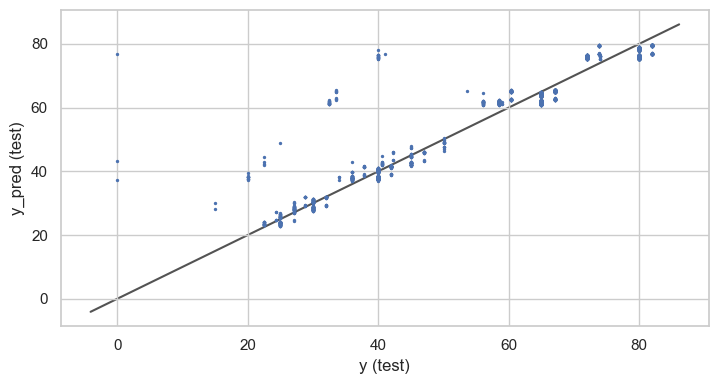

Modelo: Árbol de Decisión
R2 ajustado en train: 1.0
R2 ajustado en Test: 0.7993548768518939
--------------------------
R2 en Train: 1.0
R2 en test: 0.7997868362128155
--------------------------
RMSE en train: 2.8551437332440913e-16
RMSE en test: 7.868641793402708
--------------------------
MAE en train: 1.1472702945534449e-17
MAE en test: 2.777761836441894
--------------------------
MAPE en train: 2.2801049577189476e-19
MAPE en test: 258940825060075.53


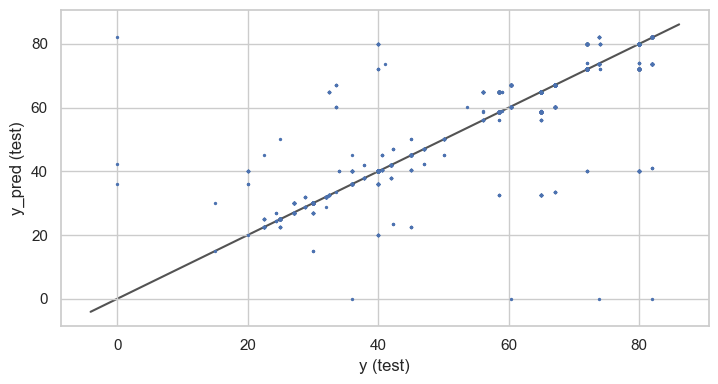

Modelo: Vecinos más cercanos
R2 ajustado en train: 0.8907179415265032
R2 ajustado en Test: 0.8371660208725973
--------------------------
R2 en Train: 0.8907767638419998
R2 en test: 0.8375165784164669
--------------------------
RMSE en train: 5.827933575427755
RMSE en test: 7.088559497756094
--------------------------
MAE en train: 3.494061715105848
MAE en test: 4.542424677187948
--------------------------
MAPE en train: 266838681904445.7
MAPE en test: 254223999051495.3


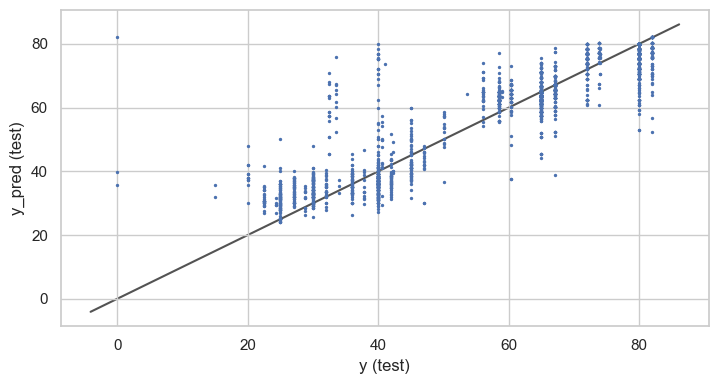

Modelo: Regresión XG Boosting
R2 ajustado en train: 0.9166926219418637
R2 ajustado en Test: 0.8927489622419826
--------------------------
R2 en Train: 0.9167374630891095
R2 en test: 0.8929798579099224
--------------------------
RMSE en train: 5.088407602069687
RMSE en test: 5.7528920214545645
--------------------------
MAE en train: 2.670612329819915
MAE en test: 3.097009808774316
--------------------------
MAPE en train: 203396528237385.4
MAPE en test: 252320763353713.9


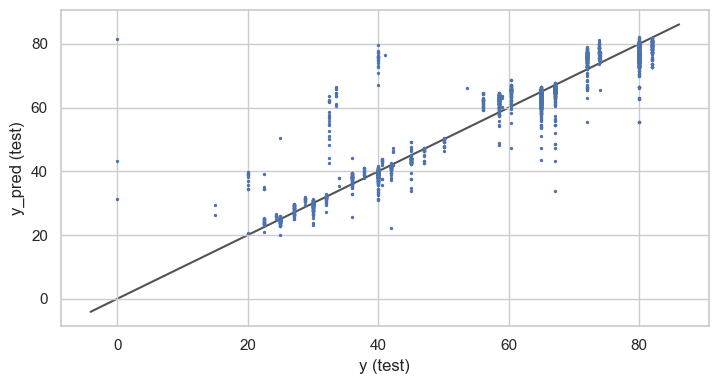

Modelo: Random Forest
R2 ajustado en train: 0.9816853303325173
R2 ajustado en Test: 0.8746338622863011
--------------------------
R2 en Train: 0.9816951884125392
R2 en test: 0.8749037570930045
--------------------------
RMSE en train: 2.385831150858972
RMSE en test: 6.219788173617906
--------------------------
MAE en train: 1.0630683530678176
MAE en test: 2.8698472022955515
--------------------------
MAPE en train: 104895331363978.45
MAPE en test: 254853986086887.94


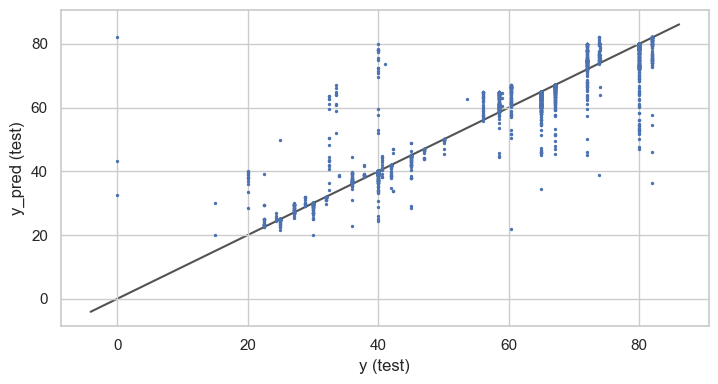

In [ ]:
models = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos', 'Regresión XG Boosting', 'Random Forest']

for i, model in enumerate([linear_regressor, arbol_regressor, knn_regressor, xgboost_regressor, randomforest_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    
    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    MAE_train=mean_absolute_error(y_train,y_train_pred)
    MAE_test=mean_absolute_error(y_test,y_test_pred)
    
    MAPE_train=mean_absolute_percentage_error(y_train,y_train_pred)
    MAPE_test=mean_absolute_percentage_error(y_test,y_test_pred)



    print("R2 ajustado en train:", adj_r2_train)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    print("R2 en Train:", r2_train)
    print("R2 en test:", r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    print("--------------------------")
    print("MAE en train:",MAE_train)
    print("MAE en test:",MAE_test)
    print("--------------------------")
    print("MAPE en train:",MAPE_train)
    print("MAPE en test:",MAPE_test)
    

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Ajuste de los Modelos

Ajuste arbol decision


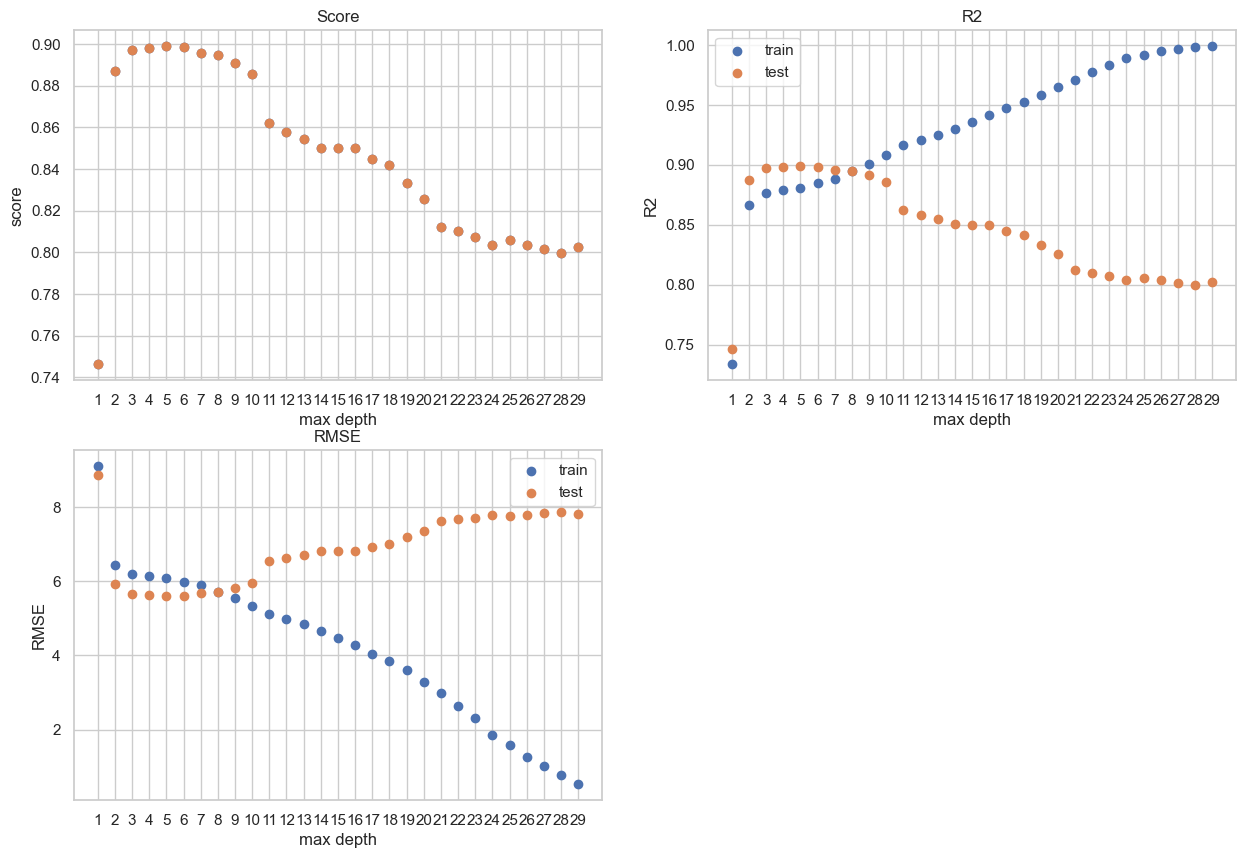

In [ ]:
MAX_DEPTH_range = range(1, 30)
scores = []
arbol_r2_train_pred=[]
arbol_r2_test_pred=[]
arbol_rmse_train_pred=[]
arbol_rmse_test_pred=[]

for k in MAX_DEPTH_range:
    arbol_regressor = DecisionTreeRegressor(max_depth=k,random_state=42)
    arbol_regressor.fit(X_train, y_train)
    scores.append(arbol_regressor.score(X_test, y_test))
    
    y_train_pred = arbol_regressor.predict(X_train)
    y_test_pred = arbol_regressor.predict(X_test)
    
    arbol_r2_train = metrics.r2_score(y_train, y_train_pred)
    arbol_r2_train_pred.append(arbol_r2_train)
    arbol_r2_test = metrics.r2_score(y_test, y_test_pred)
    arbol_r2_test_pred.append(arbol_r2_test)
    
    arbol_rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    arbol_rmse_train_pred.append(arbol_rmse_train)
    
    arbol_rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    arbol_rmse_test_pred.append(arbol_rmse_test)
    
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.scatter(MAX_DEPTH_range,scores,marker="o")
ax1.scatter(MAX_DEPTH_range,scores,marker="o")

ax2.scatter(MAX_DEPTH_range,arbol_r2_train_pred,marker="o",label="train")
ax2.scatter(MAX_DEPTH_range,arbol_r2_test_pred,marker="o",label="test")

ax3.scatter(MAX_DEPTH_range,arbol_rmse_train_pred,marker="o",label="train")
ax3.scatter(MAX_DEPTH_range,arbol_rmse_test_pred,marker="o",label="test")

ax1.set_xticks(MAX_DEPTH_range)
ax2.set_xticks(MAX_DEPTH_range)
ax3.set_xticks(MAX_DEPTH_range)

ax2.legend()
ax3.legend()

ax1.set_title('Score')
ax1.set_xlabel('max depth')
ax1.set_ylabel('score')

ax2.set_title('R2')
ax2.set_xlabel('max depth')
ax2.set_ylabel('R2')

ax3.set_title('RMSE')
ax3.set_xlabel('max depth')
ax3.set_ylabel('RMSE')

plt.show()

La profundidad optima del arbol de decision se encuentra en 7, valor que es justificado al comparar con el grafico de R2



In [302]:
arbol_optimo = DecisionTreeRegressor(max_depth= 7,random_state=42)
arbol_optimo.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

# Ajuste knn


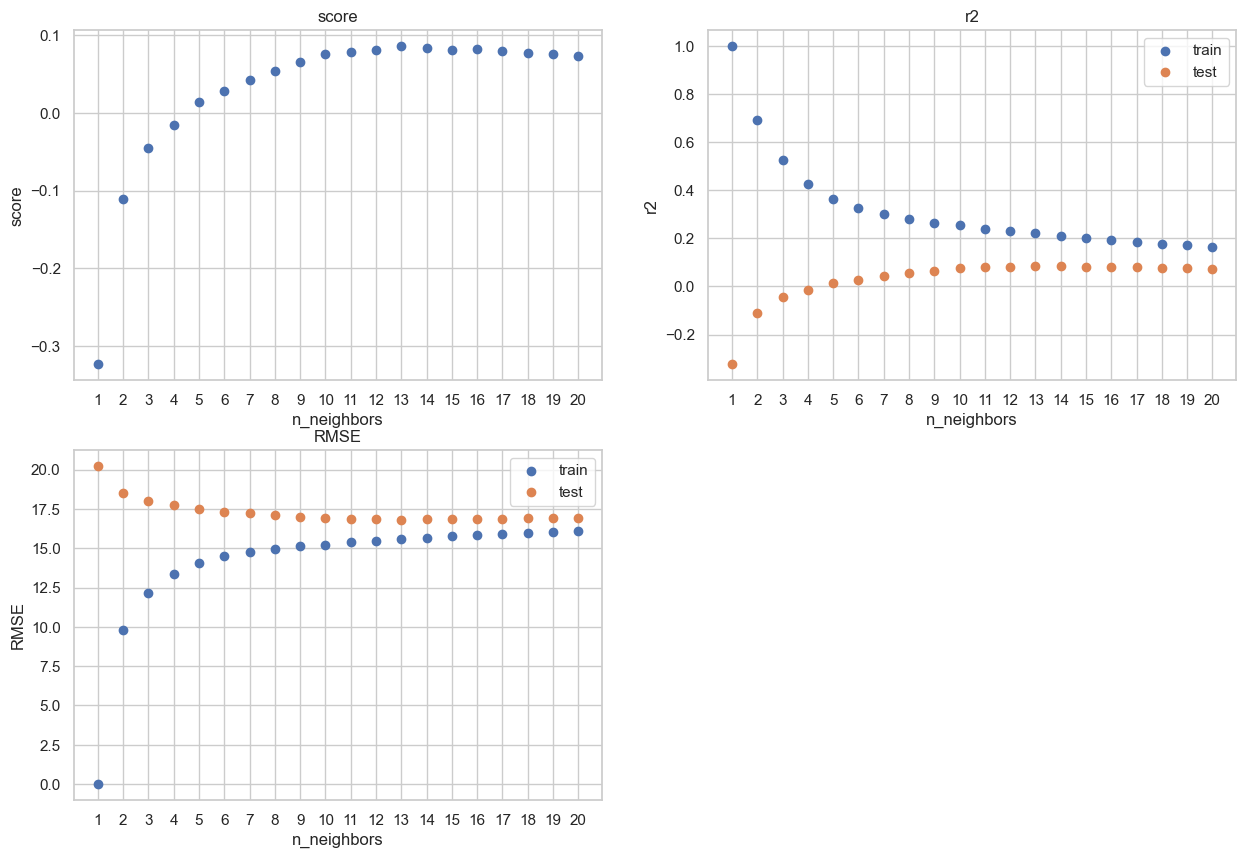

In [303]:
k_range = range(1, 21)
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]

for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(X_train, y_train)
    scores.append(knn_regressor.score(X_test, y_test))
    
    y_train_pred = knn_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = knn_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(k_range,scores,marker="o")
ax2.scatter(k_range,r2_train_pred,marker="o",label="train")
ax2.scatter(k_range,r2_train_test,marker="o",label="test")

ax3.scatter(k_range,rmse_train_pred,marker="o",label="train")
ax3.scatter(k_range,rmse_test_pred,marker="o",label="test")

ax1.set_xticks(k_range)
ax2.set_xticks(k_range)
ax3.set_xticks(k_range)


ax2.legend()
ax3.legend()


ax1.set_title('score')
ax1.set_xlabel('n_neighbors')
ax1.set_ylabel('score')

ax2.set_title('r2')
ax2.set_xlabel('n_neighbors')
ax2.set_ylabel('r2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_neighbors')
ax3.set_ylabel('RMSE')

plt.show()

"Para determinar el k vecino más cercano en términos de R2 en la tabla proporcionada, debemos buscar la fila con el valor más alto de R2 en la columna correspondiente a R2_test. En este caso, el valor más alto de R2_test es 0.832021, que se encuentra en la fila donde n_neighbors es igual a 4. Por lo tanto, el k vecino más cercano en términos de R2 es 4. El punto más alto se refiere al punto en la tabla donde se encuentra el valor máximo de R2_test. En la tabla proporcionada, el valor máximo de R2_test es 0.832021, y se encuentra en la fila donde n_neighbors es igual a 4. Por lo tanto, el punto más alto en términos de R2_test es cuando n_neighbors es igual a 4, con un valor de R2_test de 0.832021."







In [215]:
# Crear el DataFrame con los resultados
results_df = pd.DataFrame({
    'n_neighbors': list(k_range),
    'Score': scores,
    'R2_train': r2_train_pred,
    'R2_test': r2_train_test,
    'RMSE_train': rmse_train_pred,
    'RMSE_test': rmse_test_pred
})

# Mostrar el DataFrame
print(results_df)


    n_neighbors     Score  R2_train   R2_test  RMSE_train  RMSE_test
0             1  0.769121  1.000000  0.769121    0.000000   8.449791
1             2  0.828975  0.947039  0.828975    4.058226   7.272489
2             3  0.839355  0.921495  0.839355    4.940903   7.048350
3             4  0.839651  0.904171  0.839651    5.458917   7.041840
4             5  0.837517  0.890777  0.837517    5.827934   7.088559
5             6  0.833916  0.880047  0.833916    6.107492   7.166662
6             7  0.828400  0.869381  0.828400    6.373232   7.284715
7             8  0.823260  0.859486  0.823260    6.610239   7.392993
8             9  0.817520  0.850993  0.817520    6.807082   7.512099
9            10  0.810092  0.842041  0.810092    7.008572   7.663459
10           11  0.801183  0.833038  0.801183    7.205530   7.841148
11           12  0.792576  0.823095  0.792576    7.416985   8.009084
12           13  0.781736  0.812965  0.781736    7.626382   8.215690
13           14  0.770692  0.80192

"Para determinar el k vecino más cercano en términos de R2 en la tabla proporcionada, debemos buscar la fila con el valor más alto de R2 en la columna correspondiente a R2_test. En este caso, el valor más alto de R2_test es 0.832021, que se encuentra en la fila donde n_neighbors es igual a 4. Por lo tanto, el k vecino más cercano en términos de R2 es 4. El punto más alto se refiere al punto en la tabla donde se encuentra el valor máximo de R2_test. En la tabla proporcionada, el valor máximo de R2_test es 0.832021, y se encuentra en la fila donde n_neighbors es igual a 4. Por lo tanto, el punto más alto en términos de R2_test es cuando n_neighbors es igual a 4, con un valor de R2_test de 0.832021."







In [216]:
knn_optimo = KNeighborsRegressor(n_neighbors=4)
knn_optimo.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

# Ajuste Random Forest

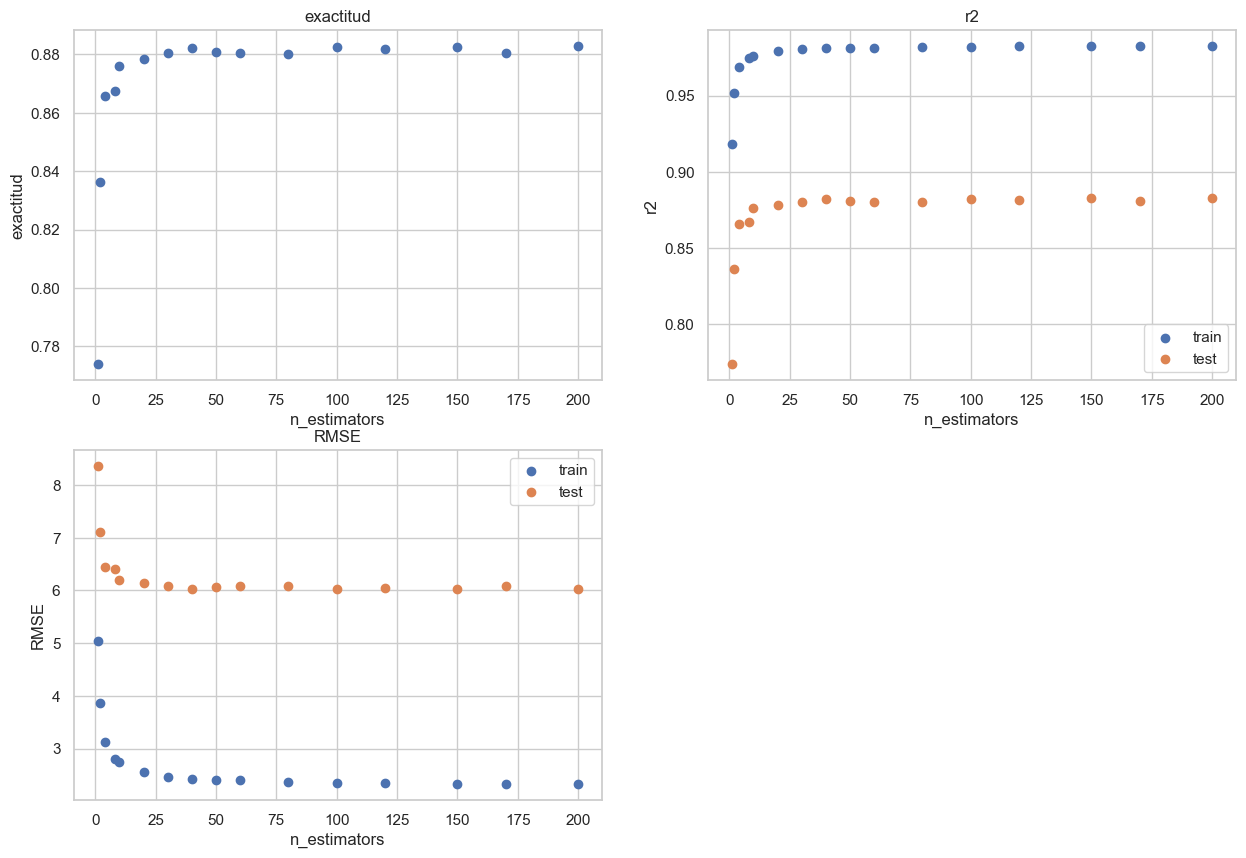

In [304]:
n_estimators = [1, 2, 4, 8, 10, 20, 30, 40, 50, 60,80, 100,120, 150, 170, 200]
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]


for k in n_estimators:
    rf_regressor = RandomForestRegressor(n_estimators=k)
    rf_regressor.fit(X_train, y_train)
    scores.append(rf_regressor.score(X_test, y_test))
    
    y_train_pred = rf_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = rf_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(n_estimators,scores,marker="o")
ax2.scatter(n_estimators,r2_train_pred,marker="o",label="train")
ax2.scatter(n_estimators,r2_train_test,marker="o",label="test")

ax3.scatter(n_estimators,rmse_train_pred,marker="o",label="train")
ax3.scatter(n_estimators,rmse_test_pred,marker="o",label="test")


ax2.legend()
ax3.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('exactitud')

ax2.set_title('r2')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('r2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('RMSE')

plt.show()

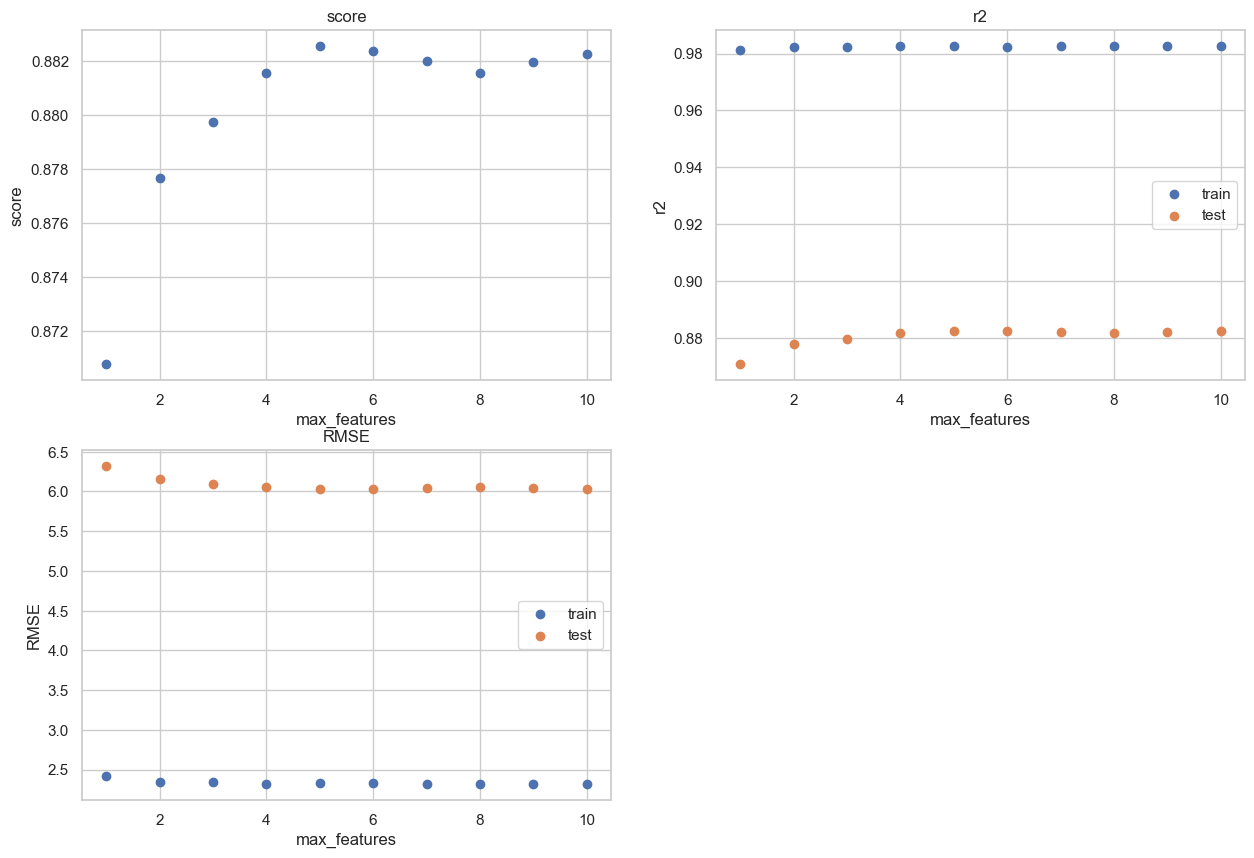

In [305]:
max_features = [1,2,3,4,5,6,7,8,9,10]
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]


for k in max_features:
    rf_regressor = RandomForestRegressor(n_estimators = 300,max_features=k)
    rf_regressor.fit(X_train, y_train)
    scores.append(rf_regressor.score(X_test, y_test))
    
    y_train_pred = rf_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = rf_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(max_features,scores,marker="o")
ax2.scatter(max_features,r2_train_pred,marker="o",label="train")
ax2.scatter(max_features,r2_train_test,marker="o",label="test")

ax3.scatter(max_features,rmse_train_pred,marker="o",label="train")
ax3.scatter(max_features,rmse_test_pred,marker="o",label="test")


ax2.legend()
ax3.legend()


ax1.set_title('score')
ax1.set_xlabel('max_features')
ax1.set_ylabel('score')

ax2.set_title('r2')
ax2.set_xlabel('max_features')
ax2.set_ylabel('r2')


ax3.set_title('RMSE')
ax3.set_xlabel('max_features')
ax3.set_ylabel('RMSE')

plt.show()

Profundidad maxima



In [219]:
randomforest_optimo = RandomForestRegressor(n_estimators = 300)
randomforest_optimo.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300)

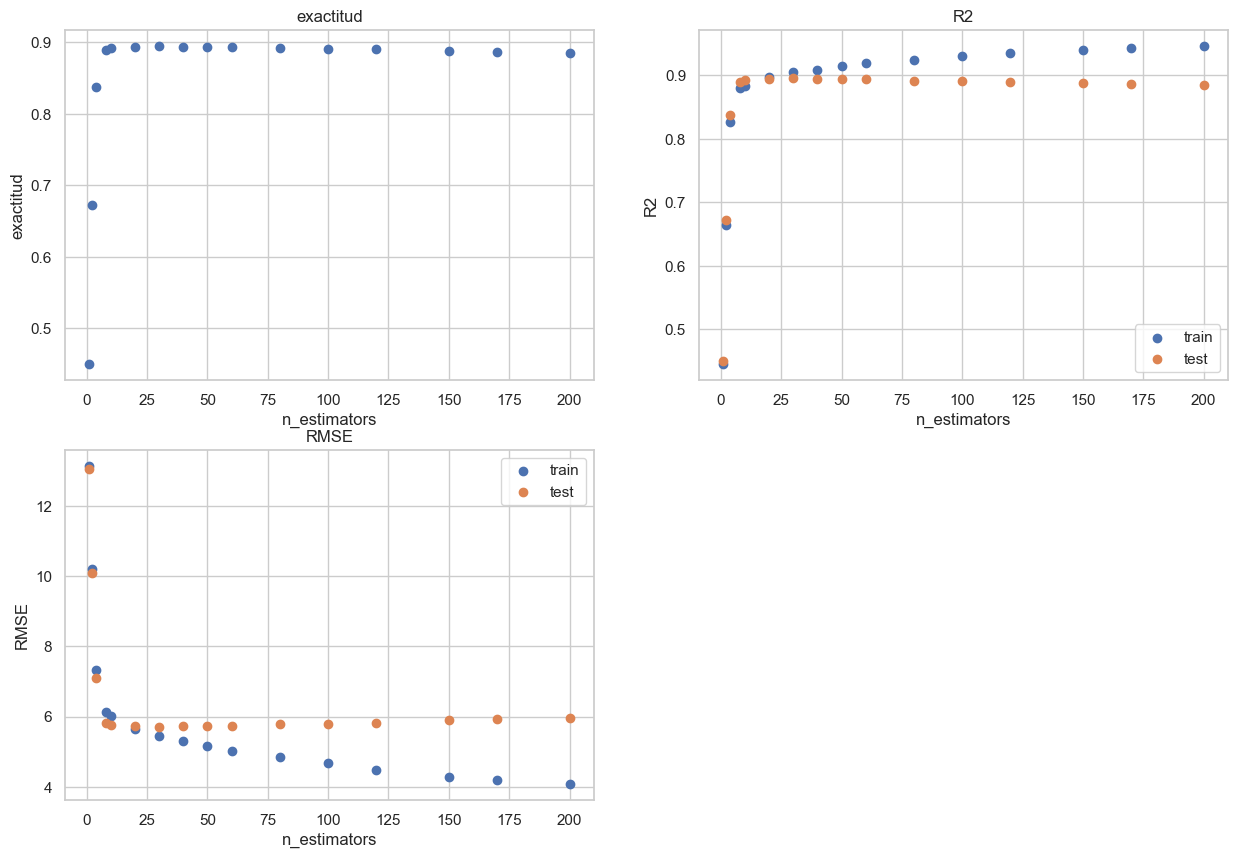

In [307]:
n_estimators = [1, 2, 4, 8, 10, 20, 30, 40, 50, 60,80, 100,120, 150, 170, 200]
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]


for k in n_estimators:
    xgb_regressor = xgboost.XGBRegressor(n_estimators=k)
    xgb_regressor.fit(X_train, y_train)
    scores.append(xgb_regressor.score(X_test, y_test))
    
    y_train_pred = xgb_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = xgb_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(n_estimators,scores,marker="o")
ax2.scatter(n_estimators,r2_train_pred,marker="o",label="train")
ax2.scatter(n_estimators,r2_train_test,marker="o",label="test")

ax3.scatter(n_estimators,rmse_train_pred,marker="o",label="train")
ax3.scatter(n_estimators,rmse_test_pred,marker="o",label="test")

ax2.legend()
ax3.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('exactitud')

ax2.set_title('R2')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('R2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('RMSE')

plt.show()

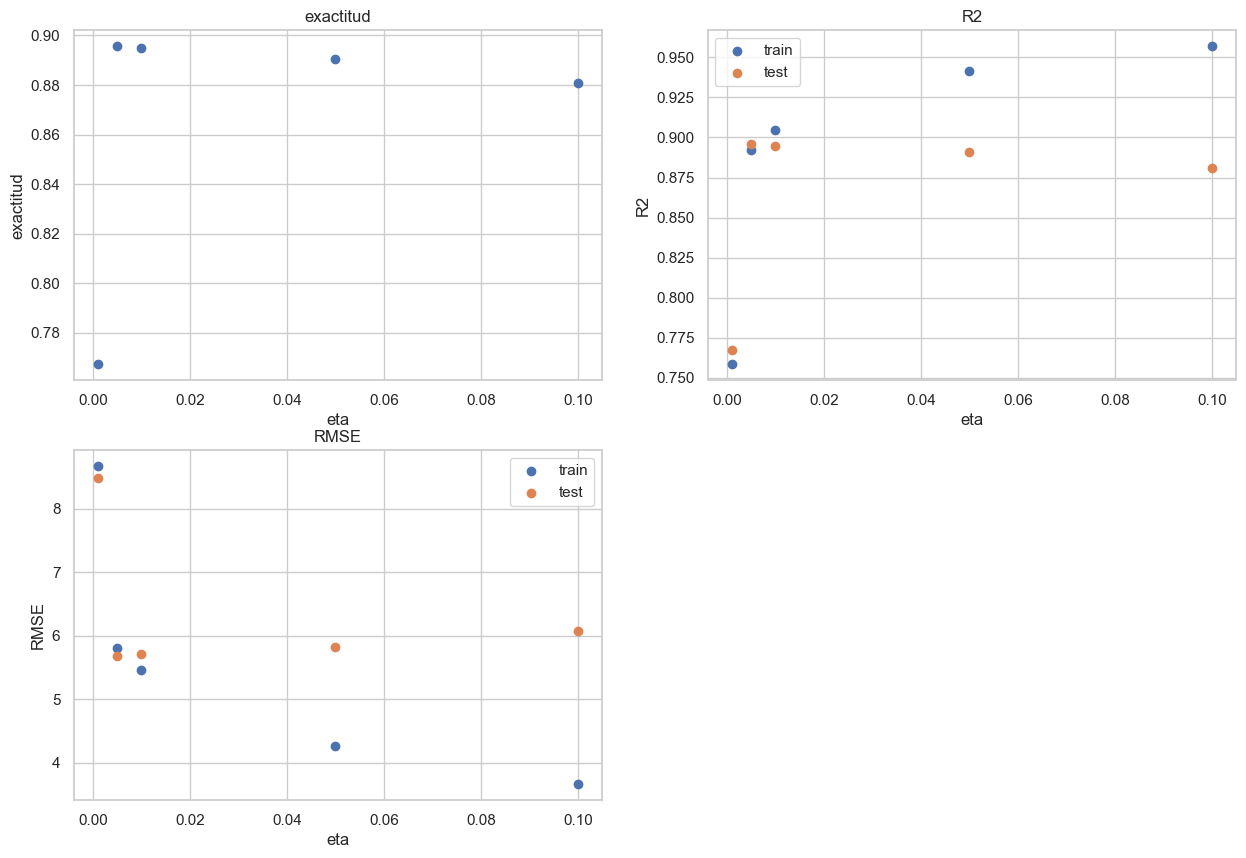

In [308]:
eta = [0.001, 0.005, 0.01, 0.05 ,0.1]
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]


for k in eta:
    xgb_regressor = xgboost.XGBRegressor(n_estimators=1000, eta=k)
    xgb_regressor.fit(X_train, y_train)
    scores.append(xgb_regressor.score(X_test, y_test))
    
    y_train_pred = xgb_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = xgb_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(eta,scores,marker="o")
ax2.scatter(eta,r2_train_pred,marker="o",label="train")
ax2.scatter(eta,r2_train_test,marker="o",label="test")

ax3.scatter(eta,rmse_train_pred,marker="o",label="train")
ax3.scatter(eta,rmse_test_pred,marker="o",label="test")

ax2.legend()
ax3.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('eta')
ax1.set_ylabel('exactitud')

ax2.set_title('R2')
ax2.set_xlabel('eta')
ax2.set_ylabel('R2')


ax3.set_title('RMSE')
ax3.set_xlabel('eta')
ax3.set_ylabel('RMSE')

plt.show()

In [322]:
xgboost_regressor_optimo =xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.1, n_jobs=4)
xgboost_regressor_optimo.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

# Resultados ajustados con subconjunto de datos 2

Modelo: Regresion Lineal
R2 en Train: 0.12352245572327081
R2 ajustado en train: 0.12312913426200855
--------------------------
R2 en test: 0.12372116599206318
R2 ajustado en Test: 0.12214625795107115
--------------------------
RMSE en train: 16.509254788074156
RMSE en test: 16.461697690583875
--------------------------
MAE en train: 13.929813546658556
MAE en test: 13.843063267395973
--------------------------
MAPE en train: 378466949840949.56
MAPE en test: 302807191881286.6


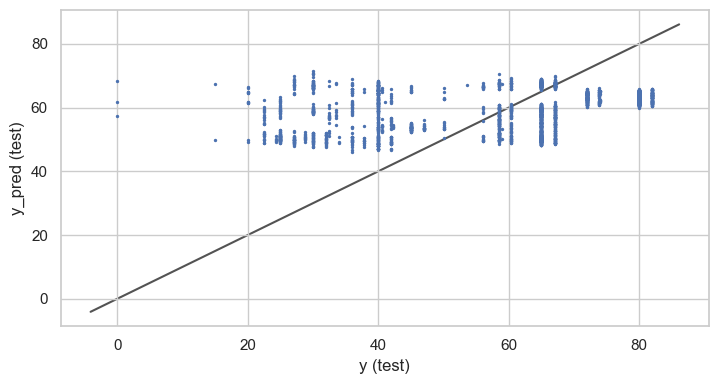

Modelo: Árbol de Decisión optimo
R2 en Train: 0.8839564940374718
R2 ajustado en train: 0.8839044192277596
--------------------------
R2 en test: 0.8912198021115453
R2 ajustado en Test: 0.8910242949262677
--------------------------
RMSE en train: 6.00713640852931
RMSE en test: 5.800005204667118
--------------------------
MAE en train: 3.3525347922472495
MAE en test: 3.352114391620523
--------------------------
MAPE en train: 303687896460943.5
MAPE en test: 229841970448922.94


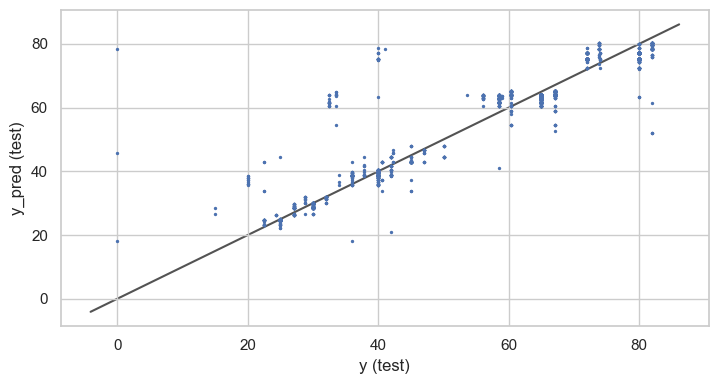

Modelo: Vecinos más cercanos optimo
R2 en Train: 0.4253250665936785
R2 ajustado en train: 0.42506717979893505
--------------------------
R2 en test: -0.015549880862147925
R2 ajustado en Test: -0.01737509632020373
--------------------------
RMSE en train: 13.368054278833174
RMSE en test: 17.721647377665988
--------------------------
MAE en train: 9.981341944743452
MAE en test: 13.610007173601147
--------------------------
MAPE en train: 252953795001618.1
MAPE en test: 317901150167329.5


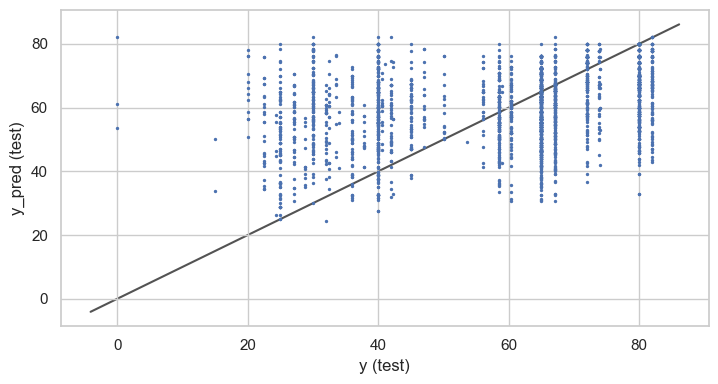

Modelo: Random Forest optimo
R2 en Train: 0.9821768391973642
R2 ajustado en train: 0.982168841009964
--------------------------
R2 en test: 0.881267724797391
R2 ajustado en Test: 0.8810543310605063
--------------------------
RMSE en train: 2.354232961099514
RMSE en test: 6.059514876487949
--------------------------
MAE en train: 1.159745425188377
MAE en test: 3.0600728120516485
--------------------------
MAPE en train: 110633098273517.66
MAPE en test: 249697784504905.6


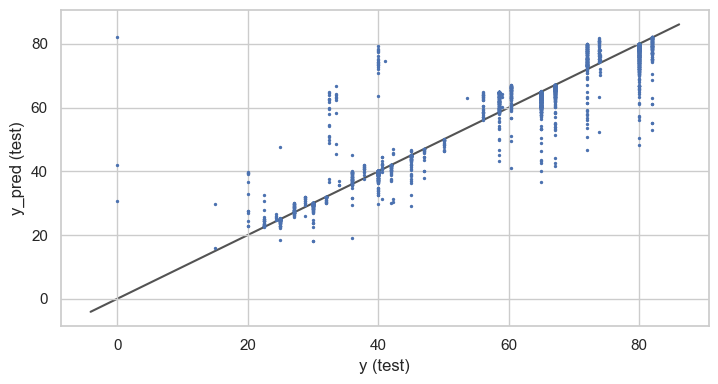

Modelo: XGB optimo
R2 en Train: 0.9416745050250417
R2 ajustado en train: 0.9416483313152163
--------------------------
R2 en test: 0.8906442854642586
R2 ajustado en Test: 0.8904477439212396
--------------------------
RMSE en train: 4.25879062852763
RMSE en test: 5.815327828721142
--------------------------
MAE en train: 2.3650927467492906
MAE en test: 3.222121765213341
--------------------------
MAPE en train: 131466981824558.31
MAPE en test: 242811243604635.03


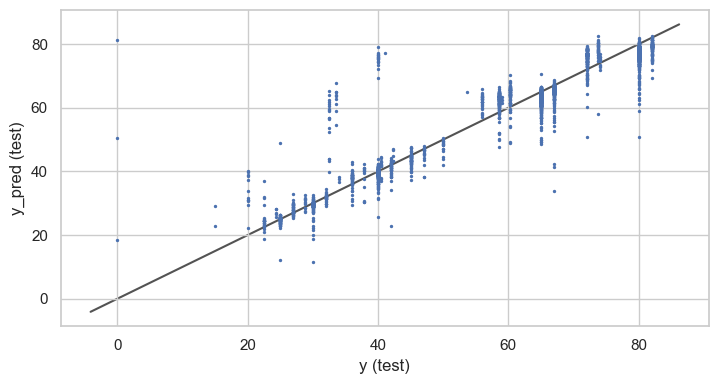

In [310]:
models2 = [ 'Regresion Lineal','Árbol de Decisión optimo', 'Vecinos más cercanos optimo',  'Random Forest optimo', 'XGB optimo']
for i, model in enumerate([linear_regressor, arbol_optimo, knn_optimo, randomforest_optimo,xgboost_regressor_optimo]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models2[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    
    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    MAE_train=mean_absolute_error(y_train,y_train_pred)
    MAE_test=mean_absolute_error(y_test,y_test_pred)
    
    MAPE_train=mean_absolute_percentage_error(y_train,y_train_pred)
    MAPE_test=mean_absolute_percentage_error(y_test,y_test_pred)

    print("R2 en Train:", r2_train)
    print("R2 ajustado en train:", adj_r2_train)
    print("--------------------------")
    print("R2 en test:", r2_test)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    print("--------------------------")
    print("MAE en train:",MAE_train)
    print("MAE en test:",MAE_test)
    print("--------------------------")
    print("MAPE en train:",MAPE_train)
    print("MAPE en test:",MAPE_test)
    

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Modelos con subconjunto de datos 3
Subconjunto de datos 3
subset_3 = df[['N.', 'Fecha de creación']]

In [312]:
df3=df[['N.', 'deporte_encoded', 'Precio del curso',  'Valor pagado', 'inscripcion_encoded', 'centro_encoded', 'pago_encoded', 'Año']]


In [313]:
df.head()

N.                            Deportista  Edad             Deporte  \
0   1  ALISSON MILENA CAJAMARCA LIQUINCHANA    10            NATACION   
1   2            AMARU JOAQUIN CAPRACE LIMA    13               WUSHU   
2   3       LUIS MASSIMILIANO GOVEA REASCOS     7            NATACION   
3   4          Miguel Angel Lozada Valencia    12  GIMNASIA ARTISTICA   
4   5           PRISCILA DANAE ORTEGA TOBAR    11          BALONCESTO   

     Centro Seleccione Forma de Pago    Tipo de Banco  Precio del curso  \
0  01.01.27            Transferencia  Banco Pichincha                82   
1  01.01.39            Transferencia  Banco Pichincha                30   
2  01.01.27            Transferencia  Banco Pichincha                80   
3  01.01.40            Transferencia  Banco Pichincha                65   
4  01.01.05            Transferencia  Banco Pichincha                65   

   Valor pagado Modo de Inscripción Fecha de creación  Porcentaje  Mes   Año  \
0          82.0  Inscripción Online        2021-06-06         NaN    6  2021   
1          30.0  Inscripción Online        2021-06-10         NaN    6  2021   
2          80.0  Inscripción Online        2021-06-10         NaN    6  2021   
3          65.0  Inscripción Online        2021-06-11         NaN    6  2021   
4          65.0  Inscripción Online        2021-06-11         NaN    6  2021   

   centro_encoded  deporte_encoded  pago_encoded  inscripcion_encoded  Día  
0              14               16             2                    0    6  
1              20               23             2                    0   10  
2              14               16             2                    0   10  
3              21                9             2                    0   11  
4               3                2             2                    0   11

In [314]:
df3.columns

Index(['N.', 'deporte_encoded', 'Precio del curso', 'Valor pagado',
       'inscripcion_encoded', 'centro_encoded', 'pago_encoded', 'Año'],
      dtype='object')

In [315]:
X_3 = df3.drop('Valor pagado',axis=1)
y_3 = df3['Valor pagado']
X_3.head()
X_3.describe()
X_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13936 entries, 0 to 13935
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   N.                   13936 non-null  int64
 1   deporte_encoded      13936 non-null  int64
 2   Precio del curso     13936 non-null  int64
 3   inscripcion_encoded  13936 non-null  int64
 4   centro_encoded       13936 non-null  int64
 5   pago_encoded         13936 non-null  int64
 6   Año                  13936 non-null  int32
dtypes: int32(1), int64(6)
memory usage: 707.8 KB


In [316]:
X_train,X_test,y_train,y_test = train_test_split(X_3,y_3,train_size=0.8,test_size=0.2,random_state=42)
print(X_train.dtypes)
print(y_train.dtypes)



N.                     int64
deporte_encoded        int64
Precio del curso       int64
inscripcion_encoded    int64
centro_encoded         int64
pago_encoded           int64
Año                    int32
dtype: object
float64


In [317]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [318]:
y_linear_train_pred= linear_regressor.predict(X_train)
y_linear_test_pred=linear_regressor.predict(X_test)

In [319]:
arbol_regressor = DecisionTreeRegressor(random_state=42)
arbol_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [320]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train,y_train)


KNeighborsRegressor()

In [321]:

y_knn_pred_train = knn_regressor.predict(X_train)
y_knn_pred_test = knn_regressor.predict(X_test)

In [322]:
xgboost_regressor = xgboost.XGBRegressor() 
xgboost_regressor.fit(X_train,y_train)


C:\Users\Chollo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [323]:
y_xgb_train_pred= xgboost_regressor.predict(X_train)
y_xgb_test_pred=xgboost_regressor.predict(X_test)

In [324]:
randomforest_regressor = RandomForestRegressor()
randomforest_regressor.fit(X_train,y_train)


RandomForestRegressor()

In [325]:
y_rf_train_pred= randomforest_regressor.predict(X_train)
y_rf_test_pred=randomforest_regressor.predict(X_test)

Modelo: Regresión lineal
R2 en Train: 0.8774604358001177
R2 ajustado en train: 0.8773834360739597
--------------------------
R2 en test: 0.8982011593228068
R2 ajustado en Test: 0.8979448313067131
--------------------------
RMSE en train: 6.172985245399143
RMSE en test: 5.610801146697641
--------------------------
MAE en train: 3.403226213498234
MAE en test: 3.2463978989596196
--------------------------
MAPE en train: 364303238431709.0
MAPE en test: 253930961419573.75


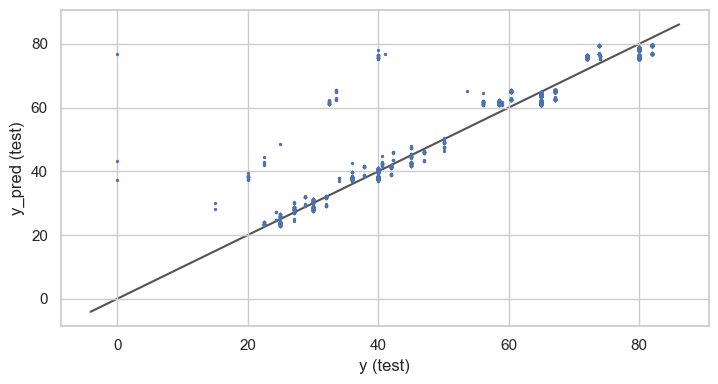

Modelo: Árbol de Decisión
R2 en Train: 1.0
R2 ajustado en train: 1.0
--------------------------
R2 en test: 0.8020060738459096
R2 ajustado en Test: 0.8015075279886871
--------------------------
RMSE en train: 2.8551437332440913e-16
RMSE en test: 7.824910787854174
--------------------------
MAE en train: 1.1472702945534449e-17
MAE en test: 2.7606527977044477
--------------------------
MAPE en train: 2.2801049577189476e-19
MAPE en test: 258940825060075.53


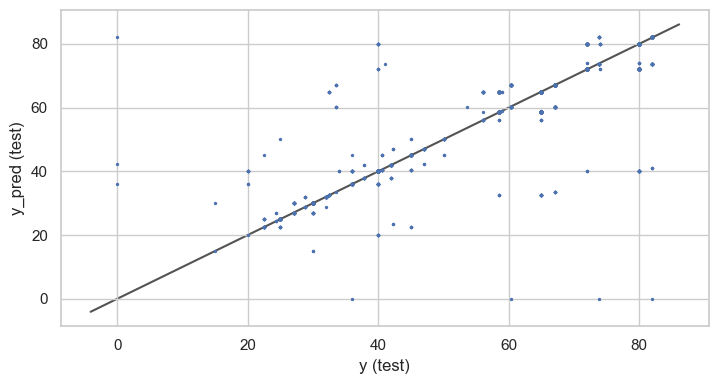

Modelo: Vecinos más cercanos
R2 en Train: 0.8907767638419998
R2 ajustado en train: 0.8907081316469274
--------------------------
R2 en test: 0.8375165784164669
R2 ajustado en Test: 0.8371074474988105
--------------------------
RMSE en train: 5.827933575427755
RMSE en test: 7.088559497756094
--------------------------
MAE en train: 3.494061715105848
MAE en test: 4.542424677187948
--------------------------
MAPE en train: 266838681904445.7
MAPE en test: 254223999051495.3


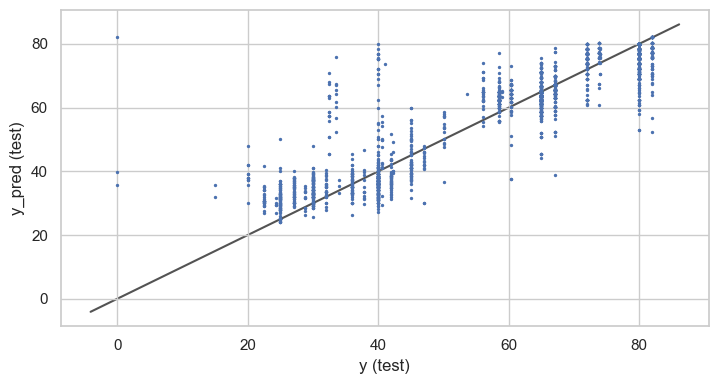

Modelo: Regresión XG Boosting
R2 en Train: 0.9154845252621773
R2 ajustado en train: 0.915431418590439
--------------------------
R2 en test: 0.8929670189133794
R2 ajustado en Test: 0.8926975114070461
--------------------------
RMSE en train: 5.12654992180078
RMSE en test: 5.753237092691696
--------------------------
MAE en train: 2.6927752935591243
MAE en test: 3.099680334799943
--------------------------
MAPE en train: 203482539696283.78
MAPE en test: 254648114932684.62


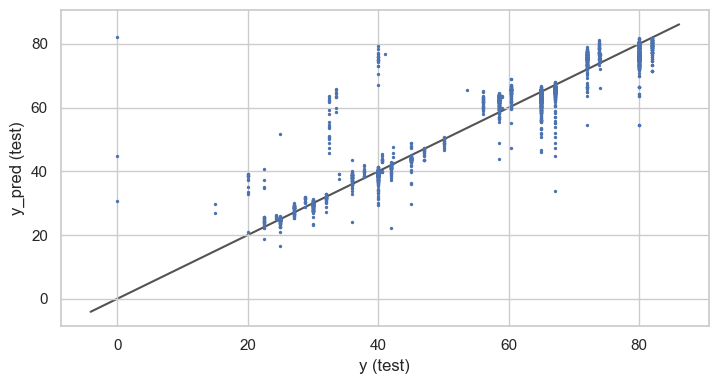

Modelo: Random Forest
R2 en Train: 0.9819967505150187
R2 ajustado en train: 0.9819854378806924
--------------------------
R2 en test: 0.875047220807532
R2 ajustado en Test: 0.874732591507407
--------------------------
RMSE en train: 2.3660968813848338
RMSE en test: 6.216220640839207
--------------------------
MAE en train: 1.0628143164693244
MAE en test: 2.855956599713055
--------------------------
MAPE en train: 96169304098890.28
MAPE en test: 252755644653618.8


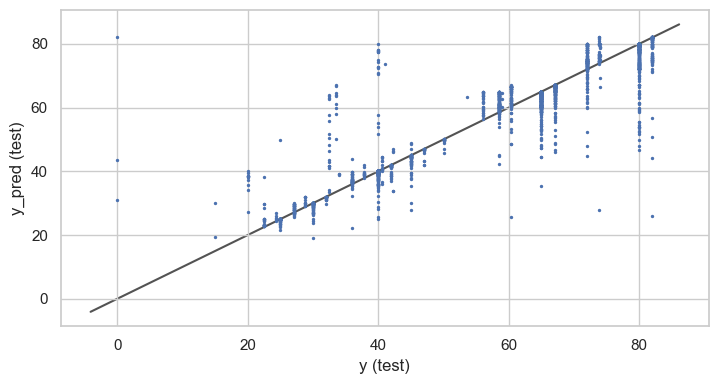

In [326]:
models = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos', 'Regresión XG Boosting', 'Random Forest']

for i, model in enumerate([linear_regressor, arbol_regressor, knn_regressor, xgboost_regressor, randomforest_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    
    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    MAE_train=mean_absolute_error(y_train,y_train_pred)
    MAE_test=mean_absolute_error(y_test,y_test_pred)
    
    MAPE_train=mean_absolute_percentage_error(y_train,y_train_pred)
    MAPE_test=mean_absolute_percentage_error(y_test,y_test_pred)



    print("R2 en Train:", r2_train)
    print("R2 ajustado en train:", adj_r2_train)
    print("--------------------------")
    print("R2 en test:", r2_test)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    print("--------------------------")
    print("MAE en train:",MAE_train)
    print("MAE en test:",MAE_test)
    print("--------------------------")
    print("MAPE en train:",MAPE_train)
    print("MAPE en test:",MAPE_test)
    

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Ajuste de los Modelos


Ajuste arbol decision


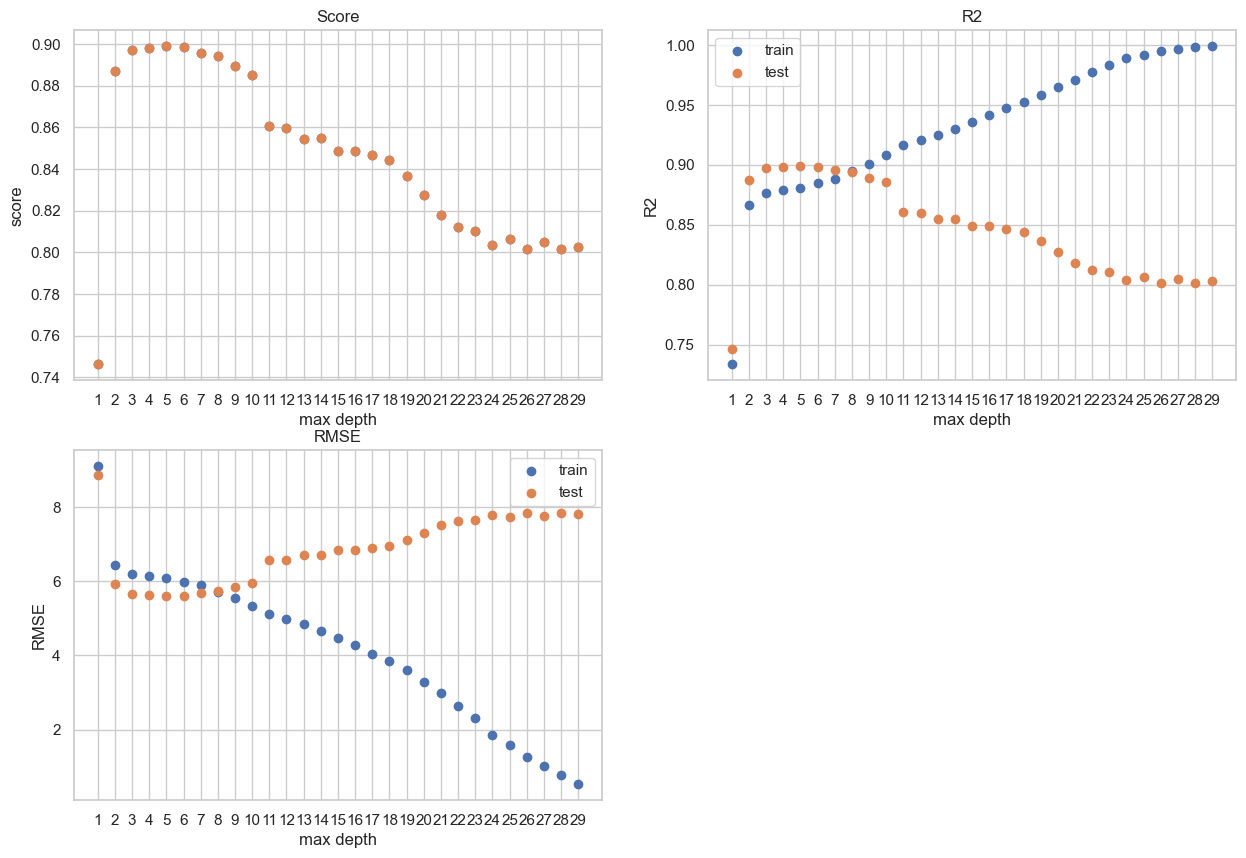

In [327]:
MAX_DEPTH_range = range(1, 30)
scores = []
arbol_r2_train_pred=[]
arbol_r2_test_pred=[]
arbol_rmse_train_pred=[]
arbol_rmse_test_pred=[]

for k in MAX_DEPTH_range:
    arbol_regressor = DecisionTreeRegressor(max_depth=k,random_state=42)
    arbol_regressor.fit(X_train, y_train)
    scores.append(arbol_regressor.score(X_test, y_test))
    
    y_train_pred = arbol_regressor.predict(X_train)
    y_test_pred = arbol_regressor.predict(X_test)
    
    arbol_r2_train = metrics.r2_score(y_train, y_train_pred)
    arbol_r2_train_pred.append(arbol_r2_train)
    arbol_r2_test = metrics.r2_score(y_test, y_test_pred)
    arbol_r2_test_pred.append(arbol_r2_test)
    
    arbol_rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    arbol_rmse_train_pred.append(arbol_rmse_train)
    
    arbol_rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    arbol_rmse_test_pred.append(arbol_rmse_test)
    
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.scatter(MAX_DEPTH_range,scores,marker="o")
ax1.scatter(MAX_DEPTH_range,scores,marker="o")

ax2.scatter(MAX_DEPTH_range,arbol_r2_train_pred,marker="o",label="train")
ax2.scatter(MAX_DEPTH_range,arbol_r2_test_pred,marker="o",label="test")

ax3.scatter(MAX_DEPTH_range,arbol_rmse_train_pred,marker="o",label="train")
ax3.scatter(MAX_DEPTH_range,arbol_rmse_test_pred,marker="o",label="test")

ax1.set_xticks(MAX_DEPTH_range)
ax2.set_xticks(MAX_DEPTH_range)
ax3.set_xticks(MAX_DEPTH_range)

ax2.legend()
ax3.legend()

ax1.set_title('Score')
ax1.set_xlabel('max depth')
ax1.set_ylabel('score')

ax2.set_title('R2')
ax2.set_xlabel('max depth')
ax2.set_ylabel('R2')

ax3.set_title('RMSE')
ax3.set_xlabel('max depth')
ax3.set_ylabel('RMSE')

plt.show()

La profundidad optima del arbol de decision se encuentra en 9, valor que es justificado al comparar con el grafico de R2

In [332]:
arbol_optimo = DecisionTreeRegressor(max_depth= 9,random_state=42)
arbol_optimo.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

Ajuste knn


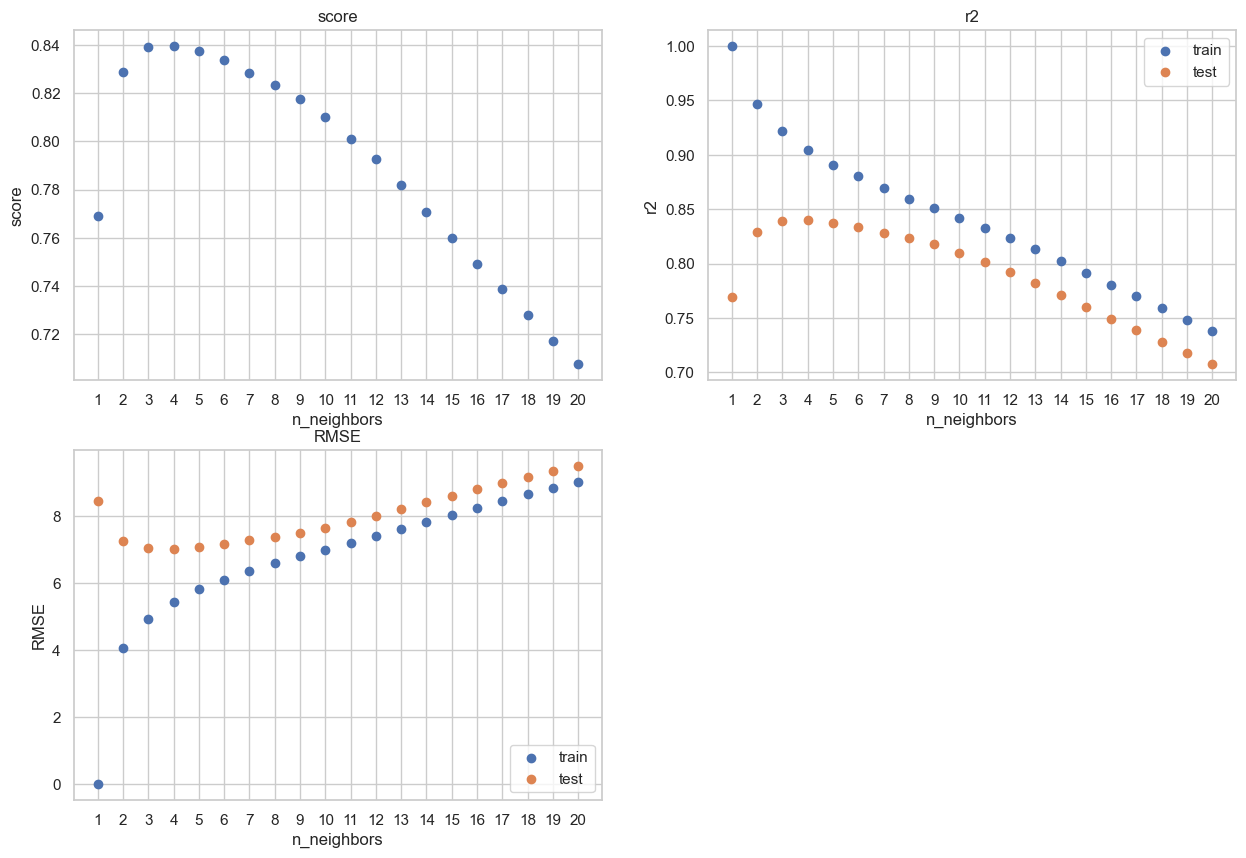

In [331]:
k_range = range(1, 21)
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]

for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(X_train, y_train)
    scores.append(knn_regressor.score(X_test, y_test))
    
    y_train_pred = knn_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = knn_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(k_range,scores,marker="o")
ax2.scatter(k_range,r2_train_pred,marker="o",label="train")
ax2.scatter(k_range,r2_train_test,marker="o",label="test")

ax3.scatter(k_range,rmse_train_pred,marker="o",label="train")
ax3.scatter(k_range,rmse_test_pred,marker="o",label="test")

ax1.set_xticks(k_range)
ax2.set_xticks(k_range)
ax3.set_xticks(k_range)


ax2.legend()
ax3.legend()


ax1.set_title('score')
ax1.set_xlabel('n_neighbors')
ax1.set_ylabel('score')

ax2.set_title('r2')
ax2.set_xlabel('n_neighbors')
ax2.set_ylabel('r2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_neighbors')
ax3.set_ylabel('RMSE')

plt.show()

El número óptimo de vecinos más cercanos probablemente esté entre 4 y 6 para train y test. Esto depende de la métrica que priorices, pero el equilibrio entre r2, score, y RMSE sugiere que este rango es ideal.

In [333]:
knn_optimo = KNeighborsRegressor(n_neighbors=5)
knn_optimo.fit(X_train,y_train)

KNeighborsRegressor()

Ajuste Random Forest


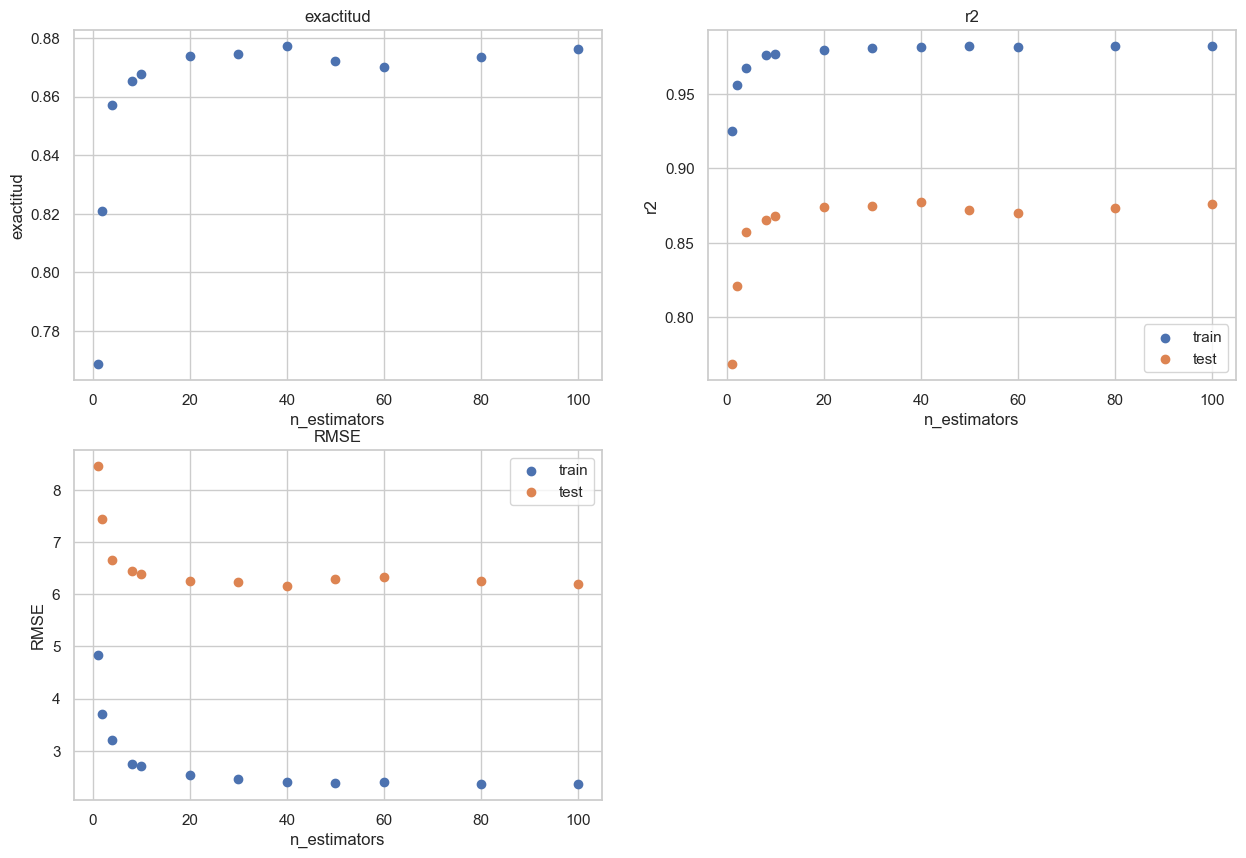

In [338]:
n_estimators = [1, 2, 4, 8, 10, 20, 30, 40, 50, 60,80, 100]
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]


for k in n_estimators:
    rf_regressor = RandomForestRegressor(n_estimators=k)
    rf_regressor.fit(X_train, y_train)
    scores.append(rf_regressor.score(X_test, y_test))
    
    y_train_pred = rf_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = rf_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(n_estimators,scores,marker="o")
ax2.scatter(n_estimators,r2_train_pred,marker="o",label="train")
ax2.scatter(n_estimators,r2_train_test,marker="o",label="test")

ax3.scatter(n_estimators,rmse_train_pred,marker="o",label="train")
ax3.scatter(n_estimators,rmse_test_pred,marker="o",label="test")

ax2.legend()
ax3.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('exactitud')

ax2.set_title('r2')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('r2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('RMSE')

plt.show()

In [339]:
randomforest_optimo = RandomForestRegressor(n_estimators = 300)
randomforest_optimo.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300)

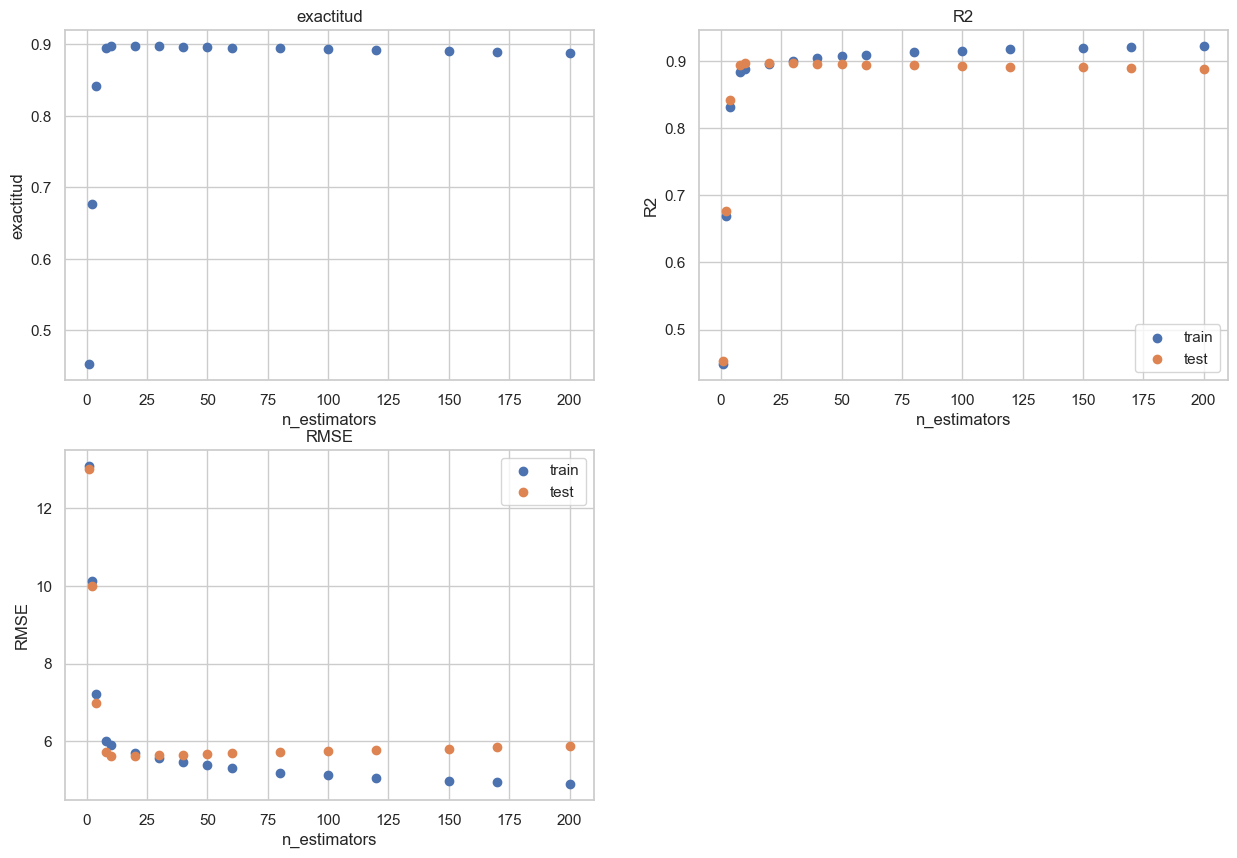

In [340]:
n_estimators = [1, 2, 4, 8, 10, 20, 30, 40, 50, 60,80, 100,120, 150, 170, 200]
scores = []
r2_train_pred=[]
r2_train_test=[]
rmse_train_pred=[]
rmse_test_pred=[]


for k in n_estimators:
    xgb_regressor = xgboost.XGBRegressor(n_estimators=k)
    xgb_regressor.fit(X_train, y_train)
    scores.append(xgb_regressor.score(X_test, y_test))
    
    y_train_pred = xgb_regressor.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_train_pred.append(r2_train)
    
    y_test_pred = xgb_regressor.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    r2_train_test.append(r2_test)
    
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_train_pred.append(rmse_train)
    
    rmse_test =np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_test_pred.append(rmse_test)
    

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax1.scatter(n_estimators,scores,marker="o")
ax2.scatter(n_estimators,r2_train_pred,marker="o",label="train")
ax2.scatter(n_estimators,r2_train_test,marker="o",label="test")

ax3.scatter(n_estimators,rmse_train_pred,marker="o",label="train")
ax3.scatter(n_estimators,rmse_test_pred,marker="o",label="test")

ax2.legend()
ax3.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('exactitud')

ax2.set_title('R2')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('R2')


ax3.set_title('RMSE')
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('RMSE')

plt.show()

In [341]:
xgboost_regressor_optimo =xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.1, n_jobs=4)
xgboost_regressor_optimo.fit(X_train,y_train)

C:\Users\Chollo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

Resultados ajustados de modelo con subconjunto de datos 3


Modelo: Regresion lineal
R2 en Train: 0.8774604358001177
R2 ajustado en train: 0.8773834360739597
--------------------------
R2 en test: 0.8982011593228068
R2 ajustado en Test: 0.8979448313067131
--------------------------
RMSE en train: 6.172985245399143
RMSE en test: 5.610801146697641
--------------------------
MAE en train: 3.403226213498234
MAE en test: 3.2463978989596196
--------------------------
MAPE en train: 364303238431709.0
MAPE en test: 253930961419573.75


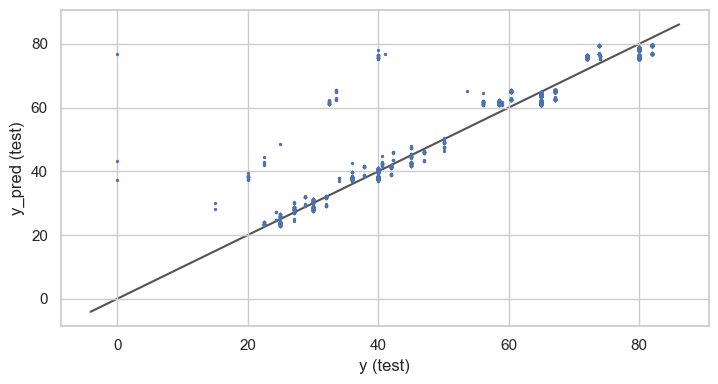

Modelo: Árbol de Decisión optimo
R2 en Train: 0.9009040498648824
R2 ajustado en train: 0.9008417813145282
--------------------------
R2 en test: 0.8893273552175013
R2 ajustado en Test: 0.8890486830903511
--------------------------
RMSE en train: 5.55117637524937
RMSE en test: 5.850238954220863
--------------------------
MAE en train: 2.9008798048232713
MAE en test: 3.062419756528139
--------------------------
MAPE en train: 124917671306223.72
MAPE en test: 259503935080423.16


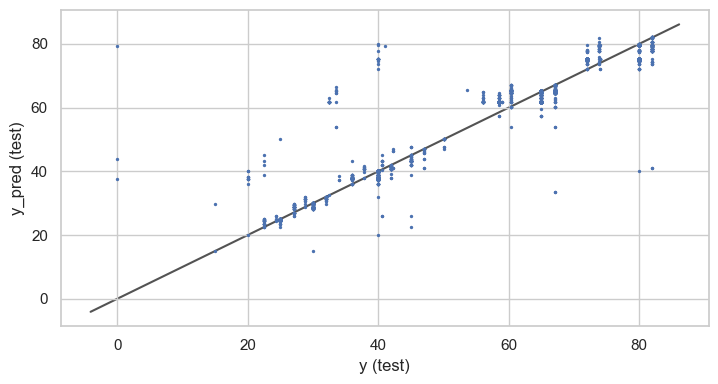

Modelo: Vecinos más cercanos optimo
R2 en Train: 0.8907767638419998
R2 ajustado en train: 0.8907081316469274
--------------------------
R2 en test: 0.8375165784164669
R2 ajustado en Test: 0.8371074474988105
--------------------------
RMSE en train: 5.827933575427755
RMSE en test: 7.088559497756094
--------------------------
MAE en train: 3.494061715105848
MAE en test: 4.542424677187948
--------------------------
MAPE en train: 266838681904445.7
MAPE en test: 254223999051495.3


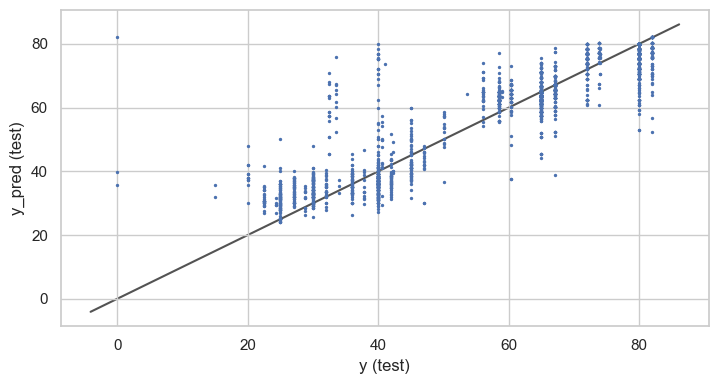

Modelo: Random Forest optimo
R2 en Train: 0.982401263016265
R2 ajustado en train: 0.9823902045639412
--------------------------
R2 en test: 0.8744326597087446
R2 ajustado en Test: 0.8741164829526156
--------------------------
RMSE en train: 2.3393641141872177
RMSE en test: 6.231488654895363
--------------------------
MAE en train: 1.0644767671331106
MAE en test: 2.861566116690583
--------------------------
MAPE en train: 99878135008381.98
MAPE en test: 253847622181632.28


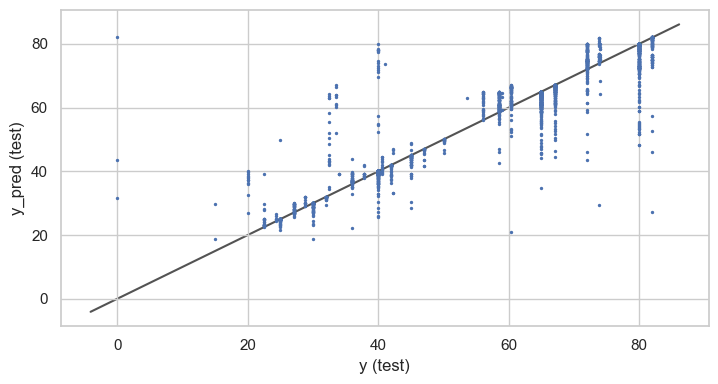

Modelo: XGB optimo
R2 en Train: 0.9265037672635055
R2 ajustado en train: 0.9264575847115166
--------------------------
R2 en test: 0.8864350127230232
R2 ajustado en Test: 0.8861490577190884
--------------------------
RMSE en train: 4.780679315337327
RMSE en test: 5.926191610082758
--------------------------
MAE en train: 2.3147741517817964
MAE en test: 3.0476458738318817
--------------------------
MAPE en train: 184274122407124.75
MAPE en test: 255267098594616.97


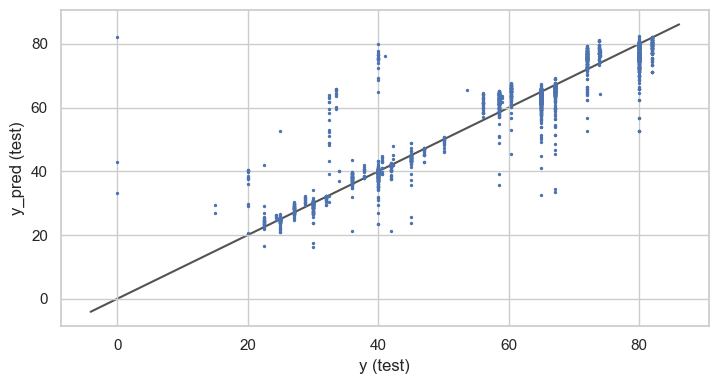

In [344]:
models2 = [ 'Regresion lineal','Árbol de Decisión optimo', 'Vecinos más cercanos optimo',  'Random Forest optimo', 'XGB optimo']
for i, model in enumerate([linear_regressor, arbol_optimo, knn_optimo, randomforest_optimo,xgboost_regressor_optimo]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models2[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
    adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    
    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    MAE_train=mean_absolute_error(y_train,y_train_pred)
    MAE_test=mean_absolute_error(y_test,y_test_pred)
    
    MAPE_train=mean_absolute_percentage_error(y_train,y_train_pred)
    MAPE_test=mean_absolute_percentage_error(y_test,y_test_pred)

    print("R2 en Train:", r2_train)
    print("R2 ajustado en train:", adj_r2_train)
    print("--------------------------")
    print("R2 en test:", r2_test)
    print("R2 ajustado en Test:", adj_r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    print("--------------------------")
    print("MAE en train:",MAE_train)
    print("MAE en test:",MAE_test)
    print("--------------------------")
    print("MAPE en train:",MAPE_train)
    print("MAPE en test:",MAPE_test)
    

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()